### Imports & File Reading

In [8]:
from collections import Counter
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import textstat
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') 

[nltk_data] Downloading package punkt to C:\Users\Zeyd
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Zeyd
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Zeyd
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
Dolly = pd.read_csv("Dolly_15k.csv")
#Source:https://www.kaggle.com/datasets/yousefsaeedian/databricksdatabricks-Dolly-15k

PnR = pd.read_csv("Prompt and Responses.csv")
#Source:https://www.kaggle.com/datasets/arunsensei/prompts-and-responses?select=Prompt+and+Responses.csv

Essays = pd.read_csv("1000 Essays.csv")
#Source:https://www.kaggle.com/datasets/darraghdog/hello-claude-1000-Essays-from-anthropic

DAIGT = pd.read_csv("DAIGT_external_dataset.csv")
#Source:https://www.kaggle.com/datasets/alejopaullier/DAIGT-external-dataset

### EDA

#### EDA  Dolly_15k

In [134]:
# Display the first few rows
print(Dolly.head()) 

                                         instruction  \
0         When did Virgin Australia start operating?   
1           Which is a species of fish? Tope or Rope   
2     Why can camels survive for long without water?   
3  Alice's parents have three daughters: Amy, Jes...   
4                    When was Tomoaki Komorida born?   

                                             context  \
0  Virgin Australia, the trading name of Virgin A...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  Komorida was born in Kumamoto Prefecture on Ju...   

                                            response        category  
0  Virgin Australia commenced services on 31 Augu...       closed_qa  
1                                               Tope  classification  
2  Camels use the fat in their humps to keep them...         open_qa  
3            The name of the third daughte

In [135]:
print(Dolly.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15011 entries, 0 to 15010
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  15011 non-null  object
 1   context      4466 non-null   object
 2   response     15011 non-null  object
 3   category     15011 non-null  object
dtypes: object(4)
memory usage: 469.2+ KB
None


In [136]:
# Summary statistics
print(Dolly.describe(include='all'))

                                              instruction  \
count                                               15011   
unique                                              14779   
top     Extract all of the names of people mentioned i...   
freq                                                   15   

                                                  context response category  
count                                                4466    15011    15011  
unique                                               4119    14940        8  
top     A large language model (LLM) is a language mod...      yes  open_qa  
freq                                                   12       16     3742  


In [137]:
print(Dolly.isnull().sum())

instruction        0
context        10545
response           0
category           0
dtype: int64


In [138]:
# Basic analysis
# Count of responses per category
category_counts = Dolly['category'].value_counts()
print(category_counts)

category
open_qa                   3742
general_qa                2191
classification            2136
closed_qa                 1773
brainstorming             1766
information_extraction    1506
summarization             1188
creative_writing           709
Name: count, dtype: int64


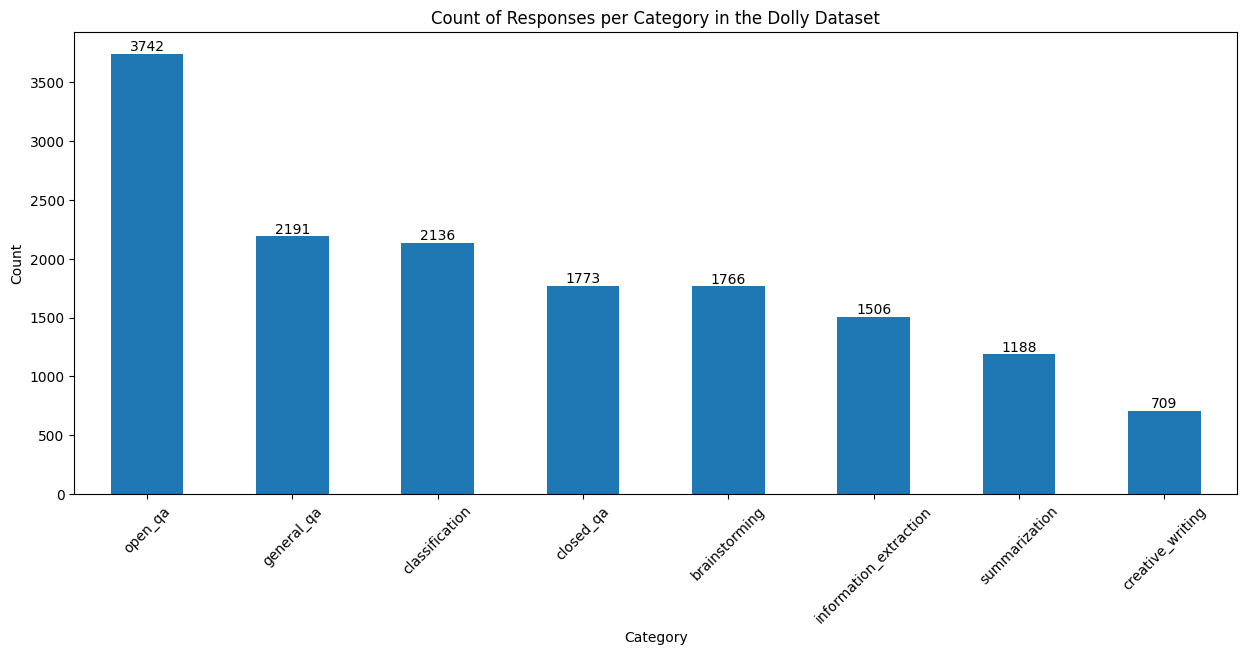

In [139]:
# Plotting the count of responses per category
plt.figure(figsize=(15, 6))
ax = category_counts.plot(kind='bar')
plt.title('Count of Responses per Category in the Dolly Dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)


# Adding text labels on the bars
for i in ax.containers:
    ax.bar_label(i)

plt.show()

#### EDA Prompt & Responses 

In [140]:
# Display the first few rows
print(PnR.head())

                                               Input  \
0  Explore how Friedrich Nietzsche's 'Thus Spoke ...   
1  Analyze the idea of the 'noble lie' in Plato's...   
2  Examine the role of reason and emotion in deci...   
3  Discuss Jacques Rousseau's concept of the 'soc...   
4  Investigate the existentialist themes in Alber...   

                                              Output  \
0  In 'Thus Spoke Zarathustra,' Nietzsche challen...   
1  Plato's 'Republic' explores the idea of the 'n...   
2  Dostoevsky's 'Crime and Punishment' delves int...   
3  Rousseau's 'social contract' theory proposes t...   
4  Camus' 'The Stranger' explores existentialist ...   

                                topic  
0  Friedrich Nietzsche & Jean-Jacques  
1  Friedrich Nietzsche & Jean-Jacques  
2  Friedrich Nietzsche & Jean-Jacques  
3  Friedrich Nietzsche & Jean-Jacques  
4  Friedrich Nietzsche & Jean-Jacques  


In [141]:
print(PnR.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49598 entries, 0 to 49597
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Input   49598 non-null  object
 1   Output  49598 non-null  object
 2   topic   49598 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB
None


In [142]:
print(PnR.describe(include='all'))

                             Input  \
count                        49598   
unique                       41628   
top     What's your favorite food?   
freq                           196   

                                                   Output  \
count                                               49598   
unique                                              49429   
top     I don't have personal preferences or hobbies i...   
freq                                                    5   

                                            topic  
count                                       49598  
unique                                          7  
top     John Stuart Mill, Albert Camus & Ayn Rand  
freq                                         8164  


In [143]:
print(PnR.isnull().sum())

Input     0
Output    0
topic     0
dtype: int64


In [144]:
# Count of responses per topic
topic_counts = PnR['topic'].value_counts()
print(topic_counts)

topic
John Stuart Mill, Albert Camus & Ayn Rand    8164
General_Recommandations                      8038
Karl Marx, Simone de Beauvoir                7689
General_Conversation2                        7631
Friedrich Nietzsche & Jean-Jacques           6898
General_Conversation                         6756
Interests and morals                         4422
Name: count, dtype: int64


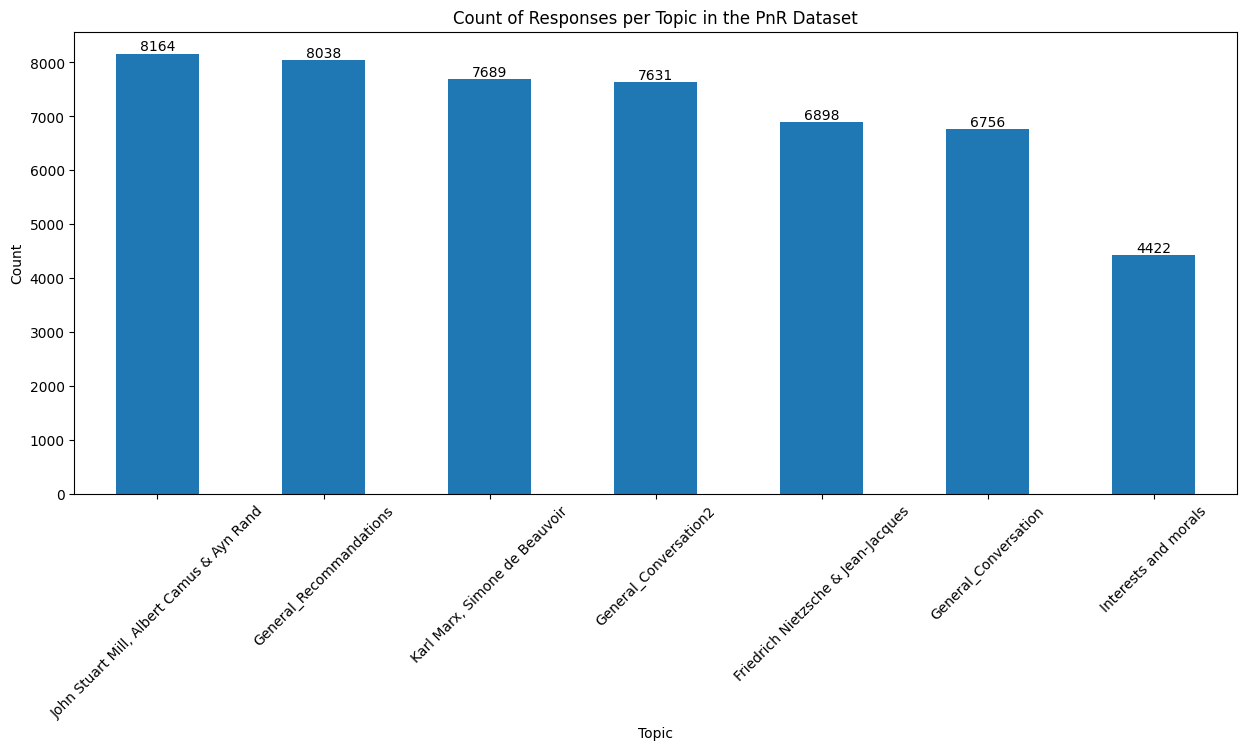

In [145]:
# Plotting the count of responses per topic
plt.figure(figsize=(15, 6))
ax = topic_counts.plot(kind='bar')
plt.title('Count of Responses per Topic in the PnR Dataset')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding text labels on the bars
for i in ax.containers:
    ax.bar_label(i)

plt.show()

#### EDA 1000 Essays

In [146]:
print(Essays.head())

   prompt_id                                        essay_title  \
0         14  Some schools offer distance learning as an opt...   
1         11  In the article “Driverless Cars are Coming,” t...   
2          8  You have read the article 'Unmasking the Face ...   
3          6  In "The Challenge of Exploring Venus," the aut...   
4         11  In the article “Driverless Cars are Coming,” t...   

                                          essay_text  
0  While distance learning offers certain benefit...  
1  The Development of Driverless Cars\n\nWhile dr...  
2  While the mysterious formation known as the "F...  
3  Studying Venus Remains a Worthy Pursuit\n\nWhi...  
4  Driverless Cars: An Argument in Favor\n\nThe d...  


In [147]:
print(Essays.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   prompt_id    1000 non-null   int64 
 1   essay_title  1000 non-null   object
 2   essay_text   1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB
None


In [148]:
print(Essays.describe(include='all'))

          prompt_id                                        essay_title  \
count   1000.000000                                               1000   
unique          NaN                                                 15   
top             NaN  Your principal has decided that all students m...   
freq            NaN                                                 78   
mean       8.138000                                                NaN   
std        4.324773                                                NaN   
min        1.000000                                                NaN   
25%        4.000000                                                NaN   
50%        8.000000                                                NaN   
75%       12.000000                                                NaN   
max       15.000000                                                NaN   

                                               essay_text  
count                                              

In [149]:
print(Essays.isnull().sum())

prompt_id      0
essay_title    0
essay_text     0
dtype: int64


In [150]:
essay_counts = Essays['prompt_id'].value_counts()
print(essay_counts)

prompt_id
5     78
15    77
12    74
4     73
8     70
7     70
11    69
1     69
14    66
6     64
13    64
10    64
3     60
9     53
2     49
Name: count, dtype: int64


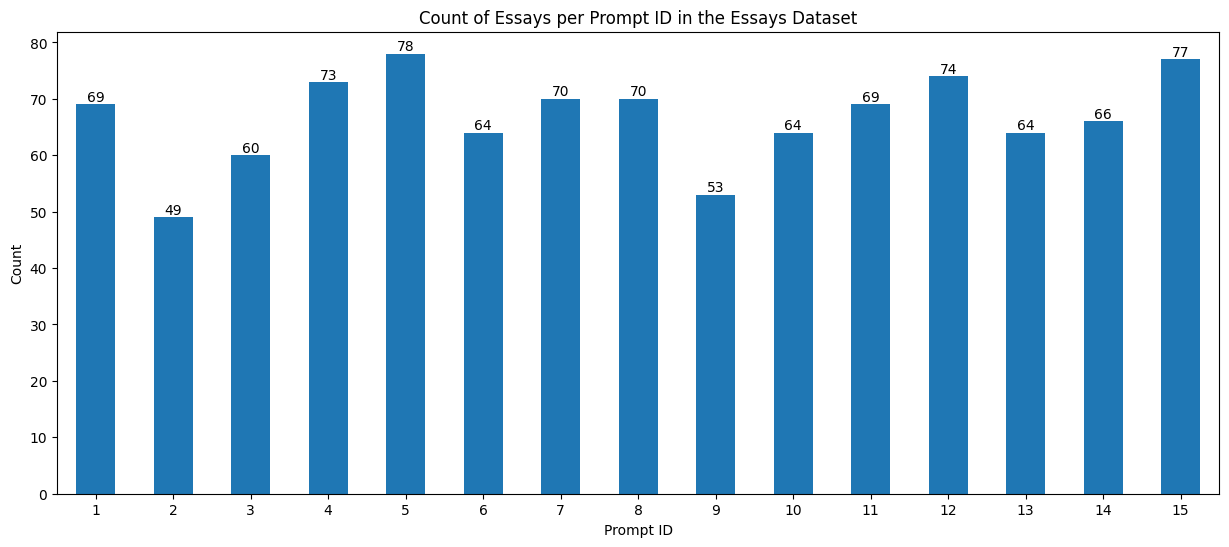

In [151]:
# Convert index to numeric type and sort by index
essay_counts.index = essay_counts.index.astype(int)
essay_counts = essay_counts.sort_index()

# Plotting the count of Essays per prompt in sorted order
plt.figure(figsize=(15, 6))
ax = essay_counts.plot(kind='bar')
plt.title('Count of Essays per Prompt ID in the Essays Dataset')
plt.xlabel('Prompt ID')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adding text labels on the bars
for i in ax.containers:
    ax.bar_label(i)

plt.show()

#### EDA DAIGT_external_dataset

In [152]:
# Display the first few rows
print(DAIGT.head())

             id                                               text  \
0  6060D28C05B6  Some schools in United States ofter classes fr...   
1  60623DB5DE7A  Four-day work week, a remarkable idea to conse...   
2  607A39D981DE  Students and their families should consider an...   
3  60ACDFA1609E  Agree you will never grow if something beyond ...   
4  60AE13D3F07B  I think our character traits are formed by inf...   

                                        instructions  \
0  \nTask: Write a persuasive essay on whether or...   
1  \nTask: Research the advantages and disadvanta...   
2  \nTask: \n\n1. Talk to your parents before tak...   
3  \nTask: Write an essay discussing the benefits...   
4  \nTask: Research and discuss how character tra...   

                                         source_text  
0  \nWhen considering the pros and cons of attend...  
1  \nOne of the primary arguments for implementin...  
2  \nBefore making any decisions about getting in...  
3  \nRalph Waldo Emers

In [153]:
print(DAIGT.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421 entries, 0 to 2420
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            2421 non-null   object
 1   text          2421 non-null   object
 2   instructions  2421 non-null   object
 3   source_text   2421 non-null   object
dtypes: object(4)
memory usage: 75.8+ KB
None


In [154]:
print(DAIGT.describe(include='all'))

                  id                                               text  \
count           2421                                               2421   
unique          2421                                               2421   
top     6060D28C05B6  Some schools in United States ofter classes fr...   
freq               1                                                  1   

                                             instructions  \
count                                                2421   
unique                                               2420   
top     \nTask: Write an essay discussing the pros and...   
freq                                                    2   

                                              source_text  
count                                                2421  
unique                                               2421  
top     \nWhen considering the pros and cons of attend...  
freq                                                    1  


In [155]:
print(DAIGT.isnull().sum())

id              0
text            0
instructions    0
source_text     0
dtype: int64


### Comparative Analysis of LLMs

#### Length, Readability, Sentiment & TTR

In [3]:
def clean_data(df, text_column):
    df = df.dropna(subset=[text_column])
    df[text_column] = df[text_column].astype(str)
    return df

In [4]:
Essays = clean_data(Essays, 'essay_text')
DAIGT = clean_data(DAIGT, 'source_text')
Dolly = clean_data(Dolly, 'response')
PnR = clean_data(PnR, 'Output')

In [5]:
# Feature Extraction Function
def extract_features(df, text_column):
    df['length'] = df[text_column].apply(len)
    df['readability'] = df[text_column].apply(textstat.flesch_kincaid_grade)
    df['sentiment'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    return df

In [6]:
# Extract features
Essays = extract_features(Essays, 'essay_text')
DAIGT = extract_features(DAIGT, 'source_text')
Dolly = extract_features(Dolly, 'response')
PnR = extract_features(PnR, 'Output')

In [7]:
def calculate_ttr(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return len(set(words)) / len(words)

# Function to add lexical diversity (TTR) to the DataFrame
def add_lexical_diversity(df, text_column):
    df['ttr'] = df[text_column].apply(calculate_ttr)
    return df

# Adding lexical diversity
Essays = add_lexical_diversity(Essays, 'essay_text')
DAIGT = add_lexical_diversity(DAIGT, 'source_text')
Dolly = add_lexical_diversity(Dolly, 'response')
PnR = add_lexical_diversity(PnR, 'Output')

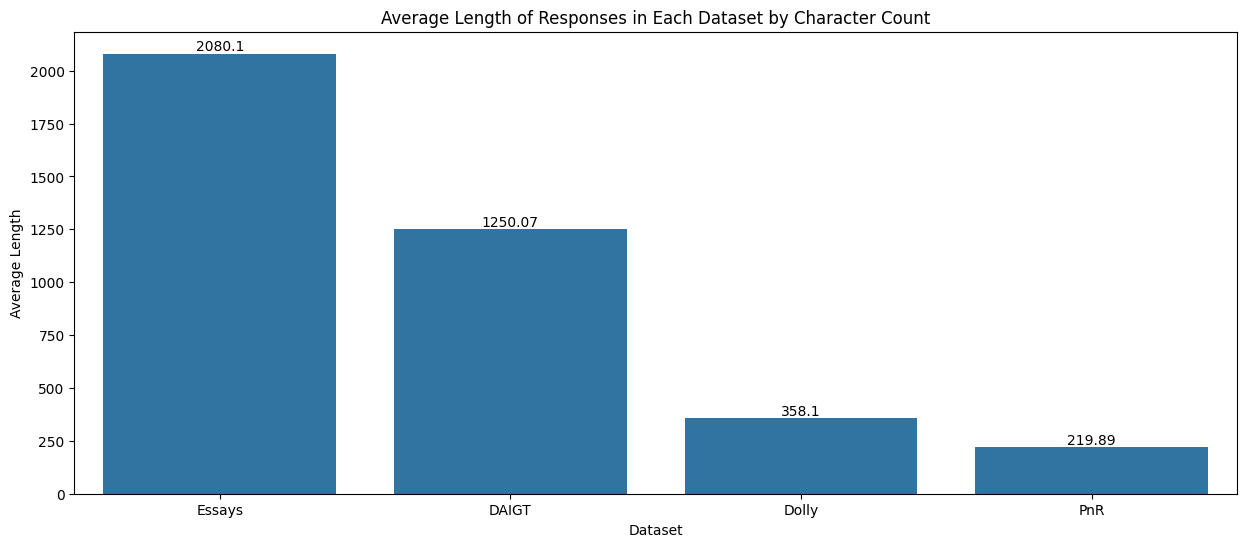

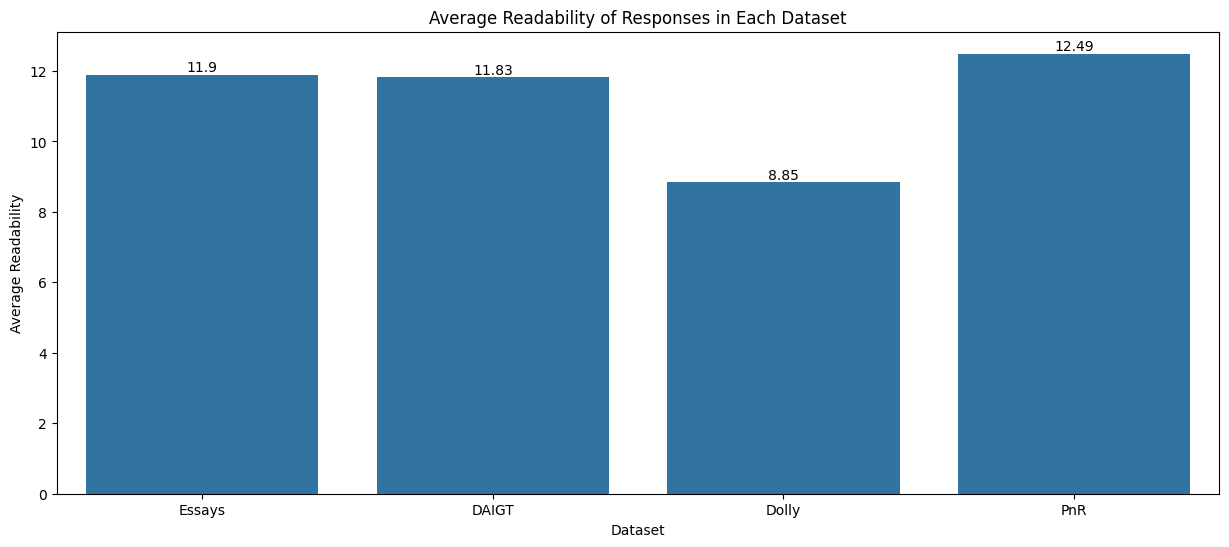

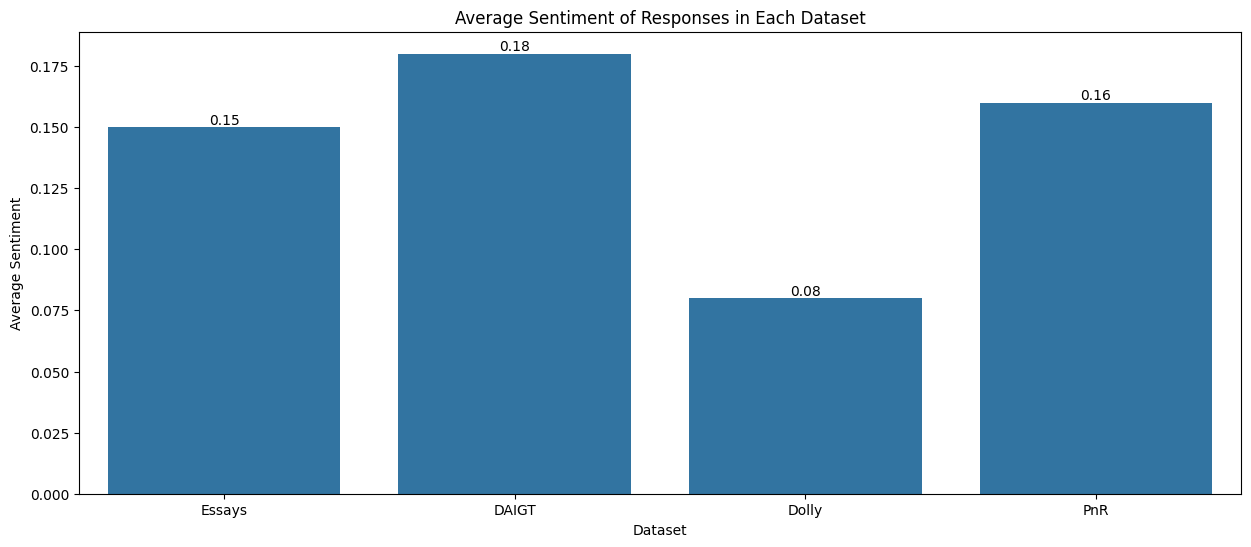

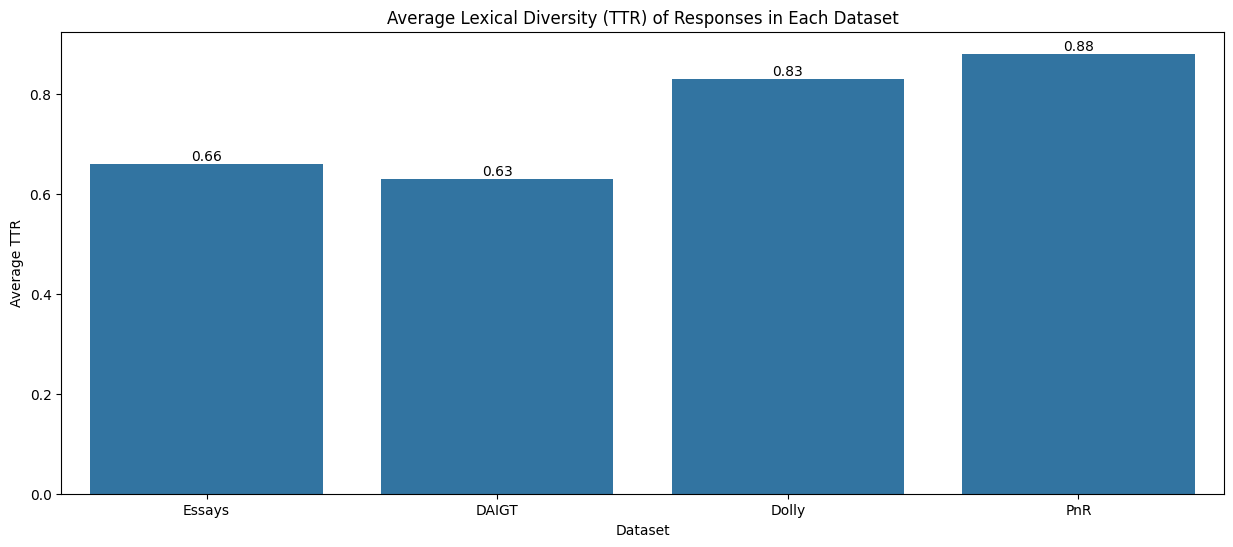

In [8]:
# Function to summarize and visualize the data
def summarize_and_visualize(*dataframes):
    summary = []
    for df, name in dataframes:
        avg_length = df['length'].mean()
        avg_readability = df['readability'].mean()
        avg_sentiment = df['sentiment'].mean()
        avg_ttr = df['ttr'].mean()
        summary.append([name, avg_length, avg_readability, avg_sentiment, avg_ttr])

    summary_df = pd.DataFrame(summary, columns=['Dataset', 'Average Length', 'Average Readability', 'Average Sentiment', 'Average TTR'])

    # Round the summary_df to 2 decimal places
    summary_df = summary_df.round(2)

# Plotting the separate graphs
    fig, ax = plt.subplots(figsize=(15, 6))
    ax = sns.barplot(x='Dataset', y='Average Length', data=summary_df)
    ax.set_title('Average Length of Responses in Each Dataset by Character Count')
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

    fig, ax = plt.subplots(figsize=(15, 6))
    ax = sns.barplot(x='Dataset', y='Average Readability', data=summary_df)
    ax.set_title('Average Readability of Responses in Each Dataset')
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

    fig, ax = plt.subplots(figsize=(15, 6))
    ax = sns.barplot(x='Dataset', y='Average Sentiment', data=summary_df)
    ax.set_title('Average Sentiment of Responses in Each Dataset')
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

    fig, ax = plt.subplots(figsize=(15, 6))
    ax = sns.barplot(x='Dataset', y='Average TTR', data=summary_df)
    ax.set_title('Average Lexical Diversity (TTR) of Responses in Each Dataset')
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()
    
    return summary_df

# Summarize and visualize
summary_df = summarize_and_visualize(
    (Essays, 'Essays'),
    (DAIGT, 'DAIGT'),
    (Dolly, 'Dolly'),
    (PnR, 'PnR')
)

### Quality Assessment

#### BLEU & ROUGE

In [9]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
 
# Function to calculate BLEU and ROUGE scores
def calculate_scores(reference_texts, generated_texts):
    bleu_scores = []
    rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    for ref, gen in zip(reference_texts, generated_texts):
        # Tokenize the texts for BLEU score calculation
        ref_tokens = [nltk.word_tokenize(ref)]
        gen_tokens = nltk.word_tokenize(gen)

        # Calculate BLEU score
        bleu_score = sentence_bleu(ref_tokens, gen_tokens)
        bleu_scores.append(bleu_score)

        # Calculate ROUGE scores
        rouge_score = scorer.score(ref, gen)
        rouge_scores['rouge1'].append(rouge_score['rouge1'].fmeasure)
        rouge_scores['rouge2'].append(rouge_score['rouge2'].fmeasure)
        rouge_scores['rougeL'].append(rouge_score['rougeL'].fmeasure)

    return bleu_scores, rouge_scores

# Mapping of original topic names to abbreviated forms
topic_mapping = {
    "Friedrich Nietzsche & Jean-Jacques": "FN & JJ",
    "General_Conversation": "Gen_Conv",
    "General_Conversation2": "Gen_Conv2",
    "General_Recommandations": "Gen_Recom",
    "Interests and morals": "Int_Morals",
    "John Stuart Mill, Albert Camus & Ayn Rand": "Mill, Camus & Rand",
    "Karl Marx, Simone de Beauvoir": "Marx & de Beauvoir"
}

# Processing for Essays Dataset
reference_texts_Essays = Essays['essay_title']  # Assuming 'essay_title' column contains the reference texts
generated_texts_Essays = Essays['essay_text']  # Assuming 'essay_text' column contains the generated texts
topics_Essays = Essays['prompt_id']  # Assuming 'prompt_id' column contains the topics

bleu_scores_Essays, rouge_scores_Essays = calculate_scores(reference_texts_Essays, generated_texts_Essays)
Essays['BLEU'] = pd.to_numeric(bleu_scores_Essays).round(2)
Essays['ROUGE-1'] = pd.to_numeric(rouge_scores_Essays['rouge1']).round(2)
Essays['ROUGE-2'] = pd.to_numeric(rouge_scores_Essays['rouge2']).round(2)
Essays['ROUGE-L'] = pd.to_numeric(rouge_scores_Essays['rougeL']).round(2)

average_scores_Essays = Essays.groupby('prompt_id').mean(numeric_only=True)[['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']].round(2)

# Processing for Dolly Dataset
reference_texts_Dolly = Dolly['instruction']  # Assuming 'instruction' column contains the reference texts
generated_texts_Dolly = Dolly['response']  # Assuming 'response' column contains the generated texts
topics_Dolly = Dolly['category']  # Assuming 'category' column contains the topics

bleu_scores_Dolly, rouge_scores_Dolly = calculate_scores(reference_texts_Dolly, generated_texts_Dolly)
Dolly['BLEU'] = pd.to_numeric(bleu_scores_Dolly).round(2)
Dolly['ROUGE-1'] = pd.to_numeric(rouge_scores_Dolly['rouge1']).round(2)
Dolly['ROUGE-2'] = pd.to_numeric(rouge_scores_Dolly['rouge2']).round(2)
Dolly['ROUGE-L'] = pd.to_numeric(rouge_scores_Dolly['rougeL']).round(2)

average_scores_Dolly = Dolly.groupby('category').mean(numeric_only=True)[['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']].round(2)

# Processing for Prompts & Responses Dataset
reference_texts_prompts = PnR['Input']  # Assuming 'Input' column contains the reference texts
generated_texts_prompts = PnR['Output']  # Assuming 'Output' column contains the generated texts
topics_prompts = PnR['topic']  # Assuming 'topic' column contains the topics

# Apply topic name mapping
PnR['short_topic'] = PnR['topic'].map(topic_mapping).fillna(PnR['topic'])

bleu_scores_prompts, rouge_scores_prompts = calculate_scores(reference_texts_prompts, generated_texts_prompts)
PnR['BLEU'] = pd.to_numeric(bleu_scores_prompts).round(2)
PnR['ROUGE-1'] = pd.to_numeric(rouge_scores_prompts['rouge1']).round(2)
PnR['ROUGE-2'] = pd.to_numeric(rouge_scores_prompts['rouge2']).round(2)
PnR['ROUGE-L'] = pd.to_numeric(rouge_scores_prompts['rougeL']).round(2)

average_scores_prompts = PnR.groupby('short_topic').mean(numeric_only=True)[['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']].round(2)

c:\Users\Zeyd Ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\Zeyd Ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\Zeyd Ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlap

<Figure size 1000x600 with 0 Axes>

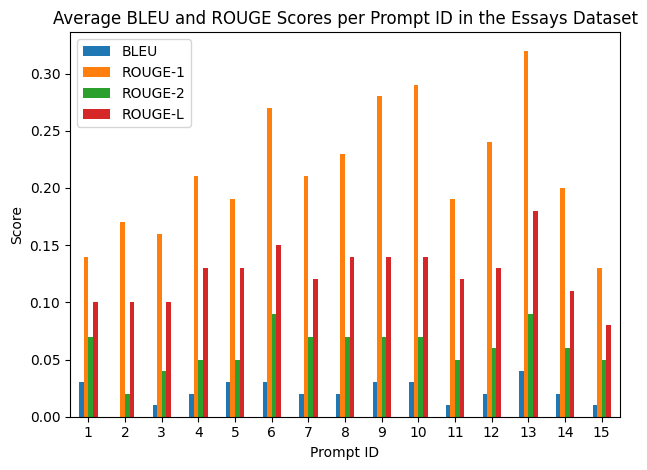

<Figure size 1000x600 with 0 Axes>

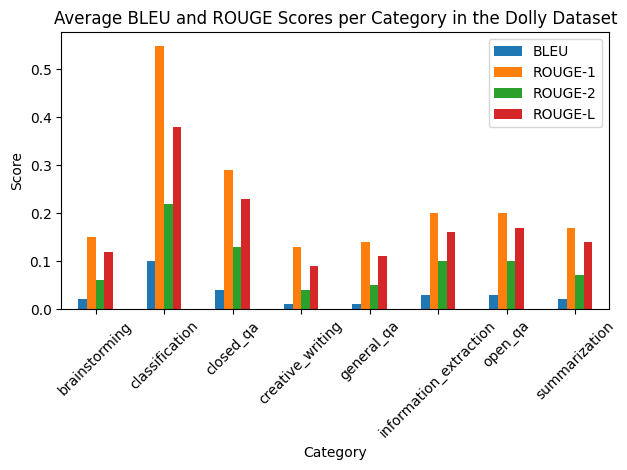

<Figure size 1000x600 with 0 Axes>

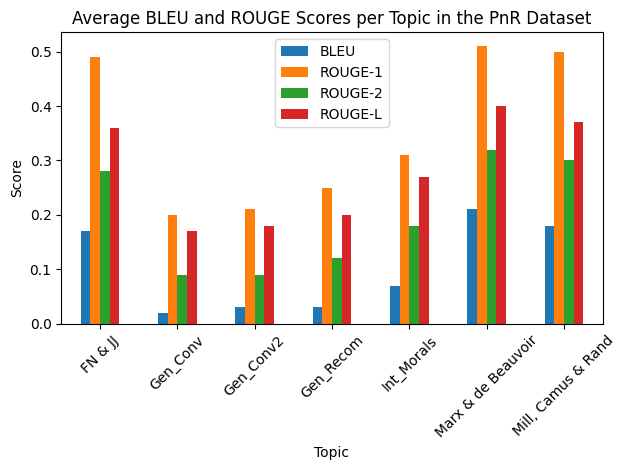

In [10]:
# Visualize the results
# Plot for Essays Dataset
plt.figure(figsize=(10, 6))
average_scores_Essays.plot(kind='bar')
plt.title('Average BLEU and ROUGE Scores per Prompt ID in the Essays Dataset')
plt.xlabel('Prompt ID')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot for Dolly Dataset
plt.figure(figsize=(10, 6))
average_scores_Dolly.plot(kind='bar')
plt.title('Average BLEU and ROUGE Scores per Category in the Dolly Dataset')
plt.xlabel('Category')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Prompts & Responses Dataset
plt.figure(figsize=(10, 6))
average_scores_prompts.plot(kind='bar')
plt.title('Average BLEU and ROUGE Scores per Topic in the PnR Dataset')
plt.xlabel('Topic')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
print(average_scores_Essays)

           BLEU  ROUGE-1  ROUGE-2  ROUGE-L
prompt_id                                 
1          0.03     0.14     0.07     0.10
2          0.00     0.17     0.02     0.10
3          0.01     0.16     0.04     0.10
4          0.02     0.21     0.05     0.13
5          0.03     0.19     0.05     0.13
6          0.03     0.27     0.09     0.15
7          0.02     0.21     0.07     0.12
8          0.02     0.23     0.07     0.14
9          0.03     0.28     0.07     0.14
10         0.03     0.29     0.07     0.14
11         0.01     0.19     0.05     0.12
12         0.02     0.24     0.06     0.13
13         0.04     0.32     0.09     0.18
14         0.02     0.20     0.06     0.11
15         0.01     0.13     0.05     0.08


In [12]:
print(average_scores_Dolly) 

                        BLEU  ROUGE-1  ROUGE-2  ROUGE-L
category                                               
brainstorming           0.02     0.15     0.06     0.12
classification          0.10     0.55     0.22     0.38
closed_qa               0.04     0.29     0.13     0.23
creative_writing        0.01     0.13     0.04     0.09
general_qa              0.01     0.14     0.05     0.11
information_extraction  0.03     0.20     0.10     0.16
open_qa                 0.03     0.20     0.10     0.17
summarization           0.02     0.17     0.07     0.14


In [13]:
print(average_scores_prompts)

                    BLEU  ROUGE-1  ROUGE-2  ROUGE-L
short_topic                                        
FN & JJ             0.17     0.49     0.28     0.36
Gen_Conv            0.02     0.20     0.09     0.17
Gen_Conv2           0.03     0.21     0.09     0.18
Gen_Recom           0.03     0.25     0.12     0.20
Int_Morals          0.07     0.31     0.18     0.27
Marx & de Beauvoir  0.21     0.51     0.32     0.40
Mill, Camus & Rand  0.18     0.50     0.30     0.37


### Prompt Analysis

#### Prompt Categories

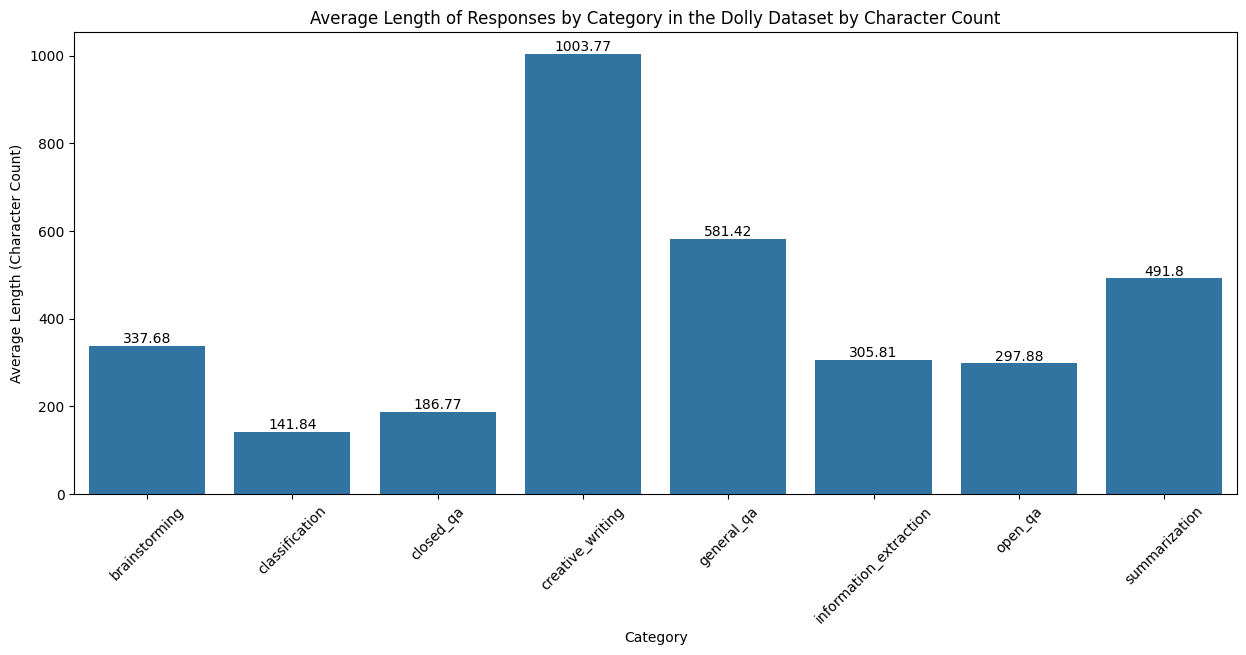

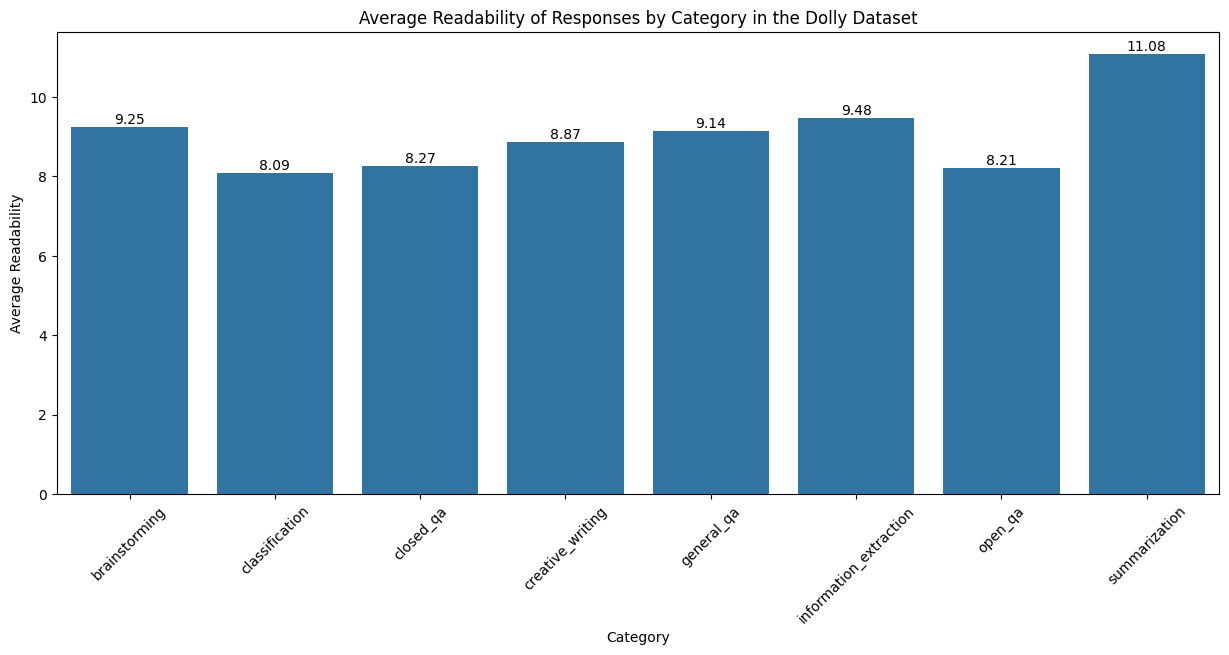

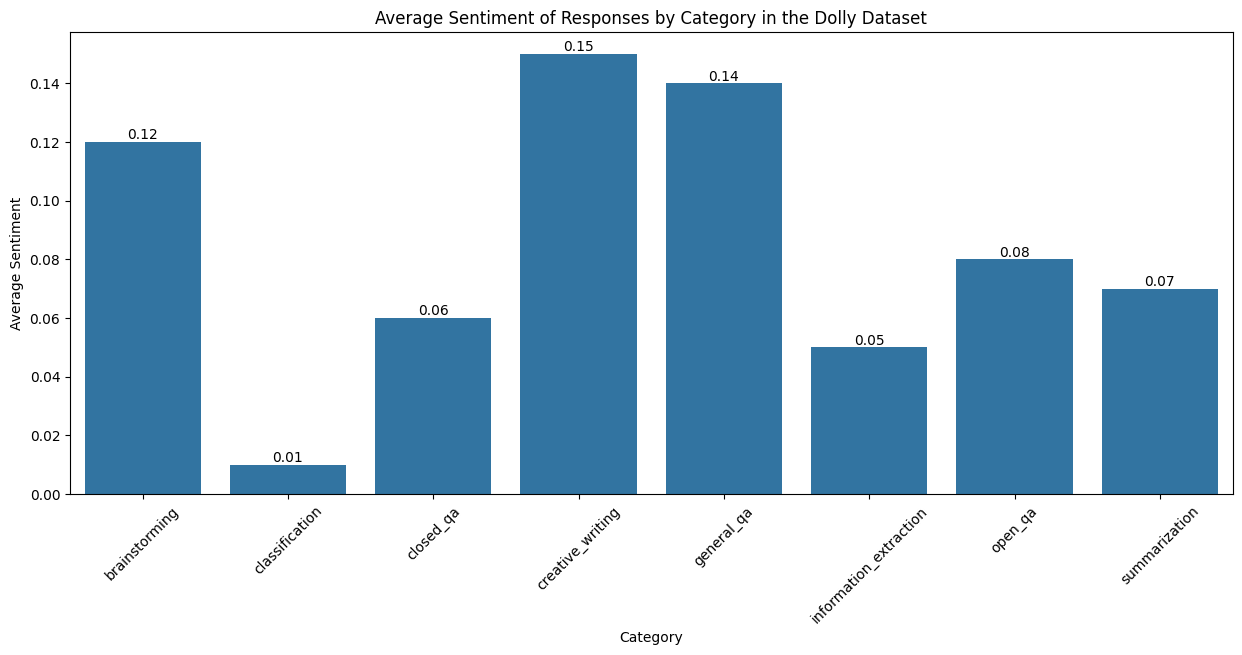

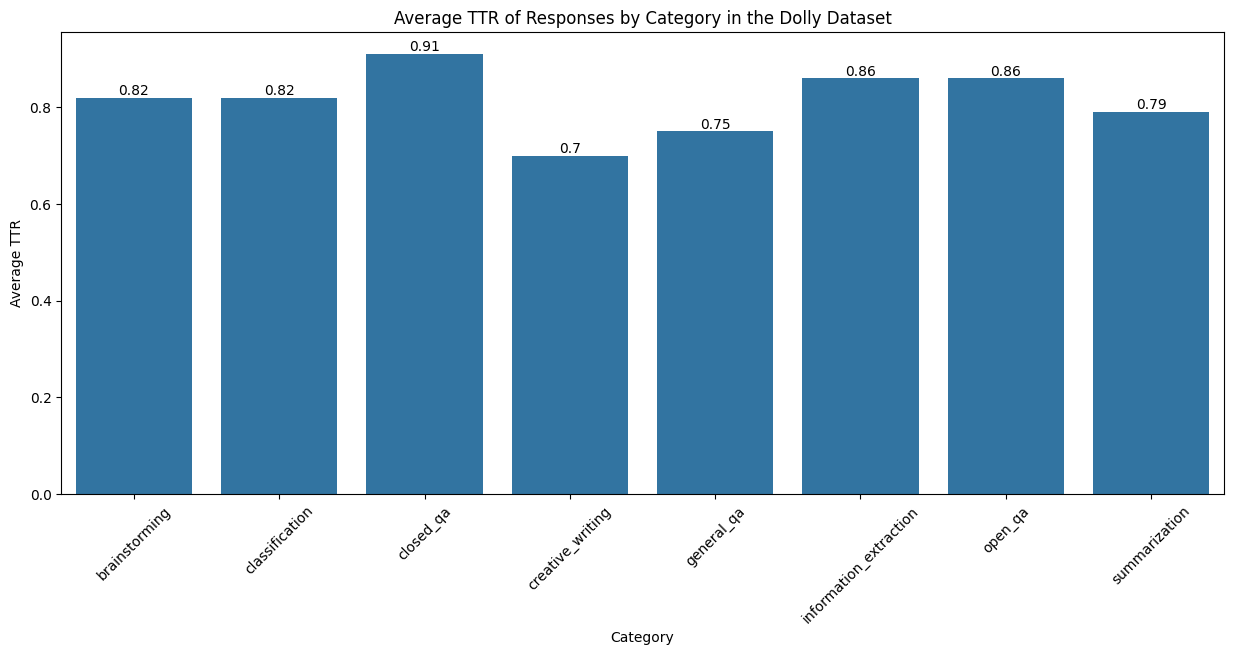

In [14]:
# Ensure columns are numeric
def convert_columns_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df 

# Convert relevant columns to numeric
Dolly = convert_columns_to_numeric(Dolly, ['length', 'readability', 'sentiment'])
PnR = convert_columns_to_numeric(PnR, ['length', 'readability', 'sentiment'])
Essays = convert_columns_to_numeric(Essays, ['length', 'readability', 'sentiment'])
DAIGT = convert_columns_to_numeric(DAIGT, ['length', 'readability', 'sentiment'])

# Function to calculate TTR
def calculate_ttr(text):
    tokens = text.split()
    unique_tokens = set(tokens)
    return len(unique_tokens) / len(tokens) if tokens else 0

# Prompt Categories Analysis
def analyze_prompt_categories(df, text_column, category_column):
    df[category_column] = df[category_column].astype(str)
    df['TTR'] = df[text_column].apply(calculate_ttr)
    category_summary = df.groupby(category_column).agg({
        text_column: 'count',
        'length': 'mean',
        'readability': 'mean',
        'sentiment': 'mean',
        'TTR': 'mean'
    }).reset_index()
    category_summary = category_summary.round(2)
    return category_summary

Dolly_category_summary = analyze_prompt_categories(Dolly, 'response', 'category')
PnR_summary = analyze_prompt_categories(PnR, 'Output', 'topic')
Essays_summary = analyze_prompt_categories(Essays, 'essay_text', 'prompt_id')

# Convert prompt_id to numeric and sort by prompt_id
Essays_summary['prompt_id'] = pd.to_numeric(Essays_summary['prompt_id'])
Essays_summary = Essays_summary.sort_values('prompt_id')

# Visualization for Average Length
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Dolly_category_summary, x='category', y='length')
plt.title('Average Length of Responses by Category in the Dolly Dataset by Character Count')
plt.xlabel('Category')
plt.ylabel('Average Length (Character Count)')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average Readability
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Dolly_category_summary, x='category', y='readability')
plt.title('Average Readability of Responses by Category in the Dolly Dataset')
plt.xlabel('Category')
plt.ylabel('Average Readability')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average Sentiment
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Dolly_category_summary, x='category', y='sentiment')
plt.title('Average Sentiment of Responses by Category in the Dolly Dataset')
plt.xlabel('Category')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average TTR
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Dolly_category_summary, x='category', y='TTR')
plt.title('Average TTR of Responses by Category in the Dolly Dataset')
plt.xlabel('Category')
plt.ylabel('Average TTR')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

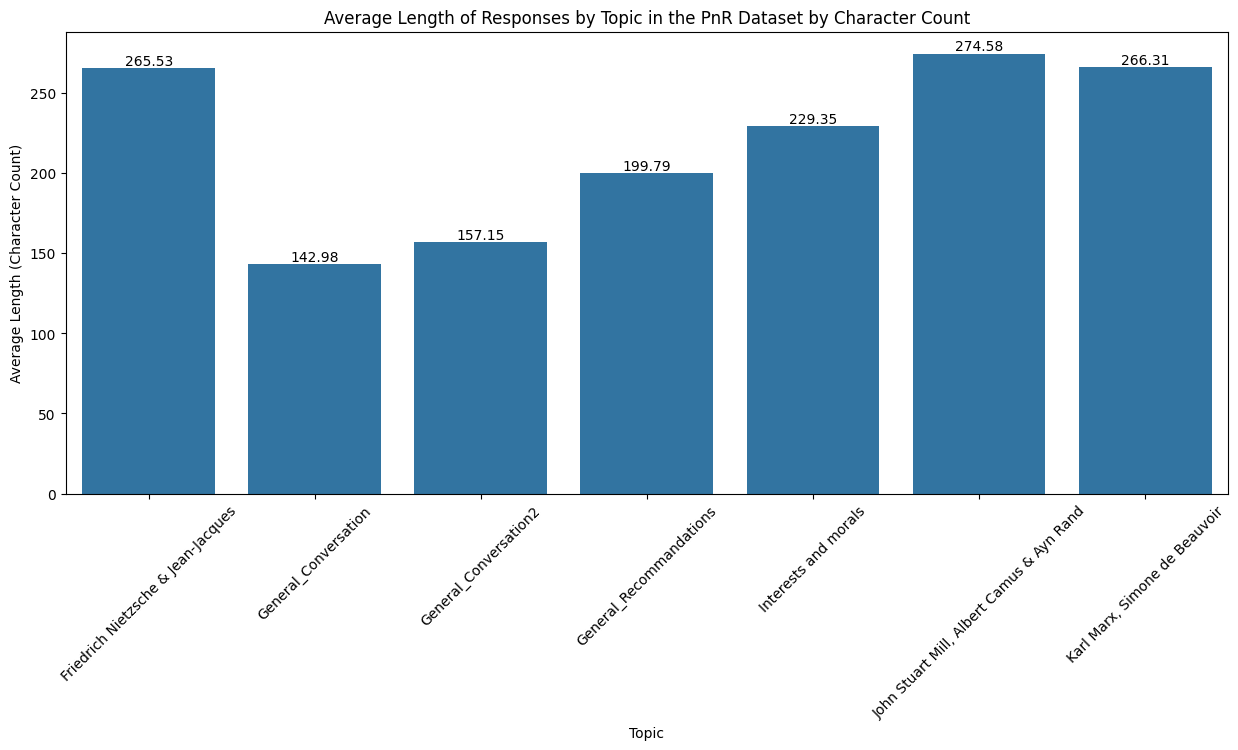

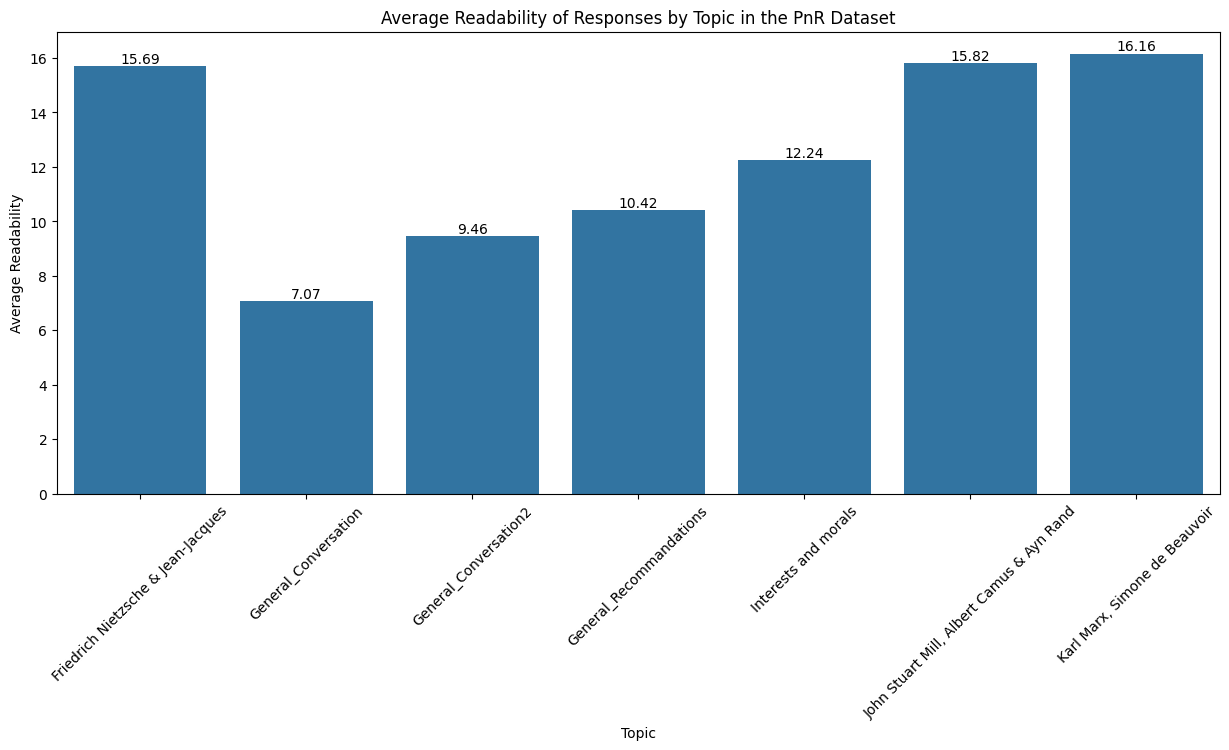

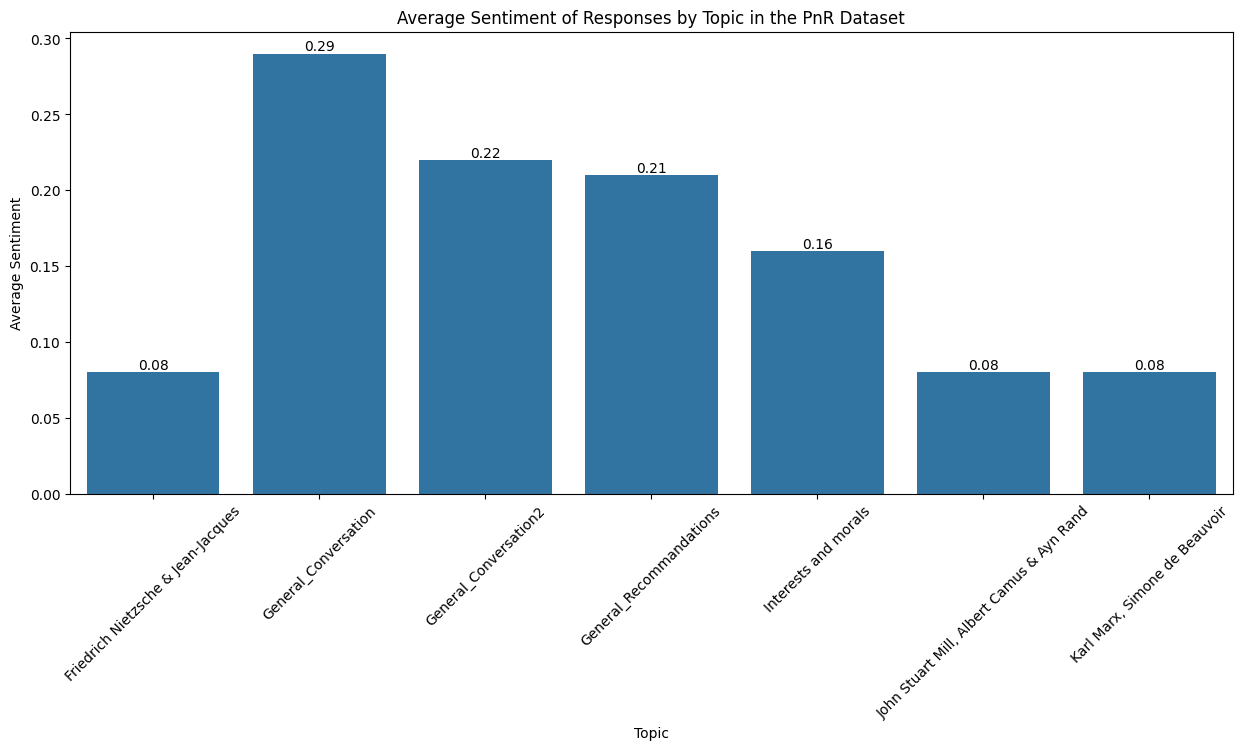

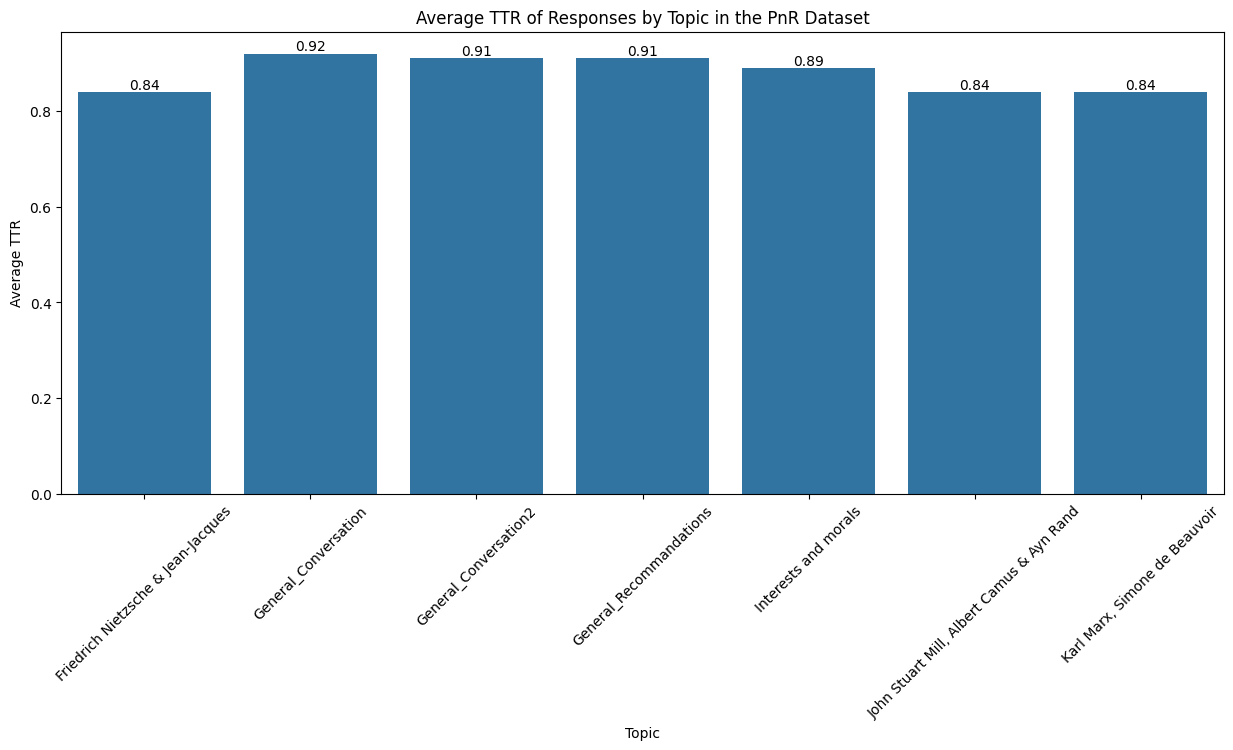

In [15]:
# Visualization for Average Length
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=PnR_summary, x='topic', y='length')
plt.title('Average Length of Responses by Topic in the PnR Dataset by Character Count')
plt.xlabel('Topic')
plt.ylabel('Average Length (Character Count)')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average Readability
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=PnR_summary, x='topic', y='readability')
plt.title('Average Readability of Responses by Topic in the PnR Dataset')
plt.xlabel('Topic')
plt.ylabel('Average Readability')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average Sentiment
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=PnR_summary, x='topic', y='sentiment')
plt.title('Average Sentiment of Responses by Topic in the PnR Dataset')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average TTR
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=PnR_summary, x='topic', y='TTR')
plt.title('Average TTR of Responses by Topic in the PnR Dataset')
plt.xlabel('Topic')
plt.ylabel('Average TTR')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()


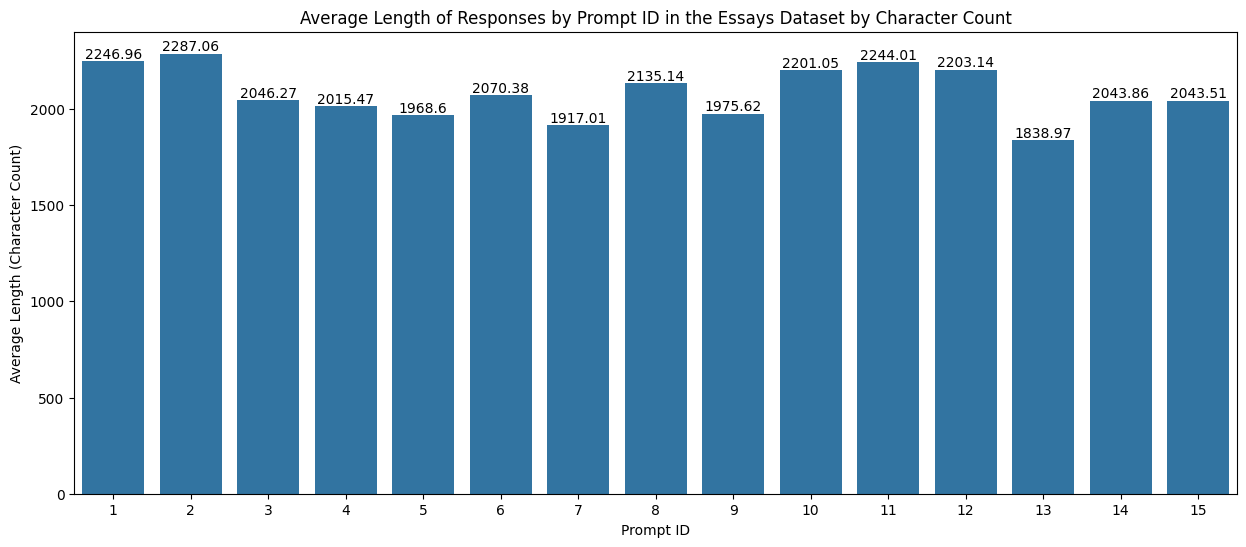

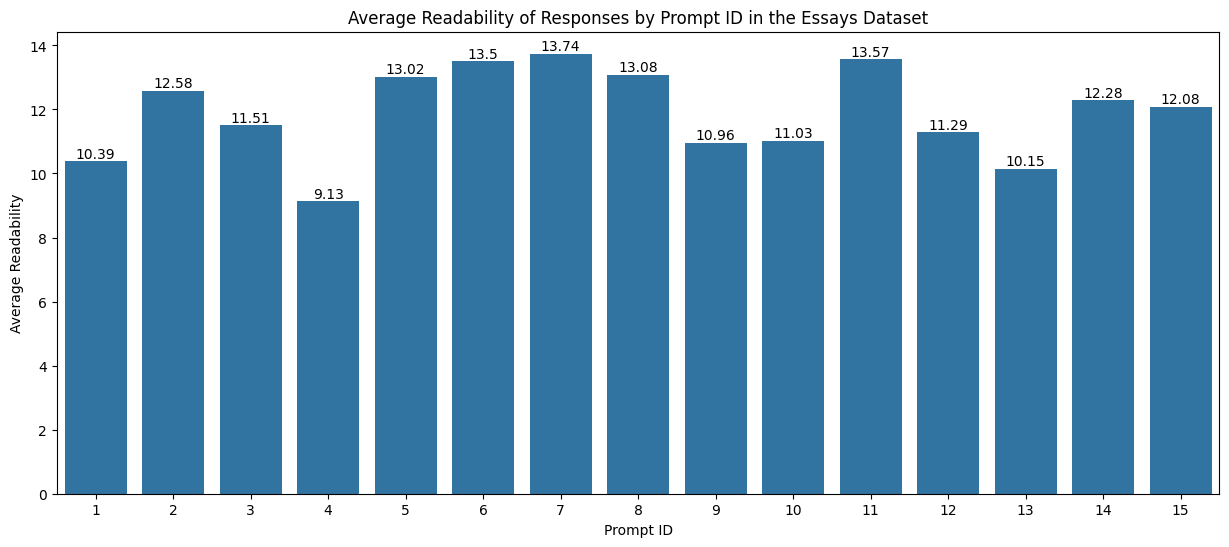

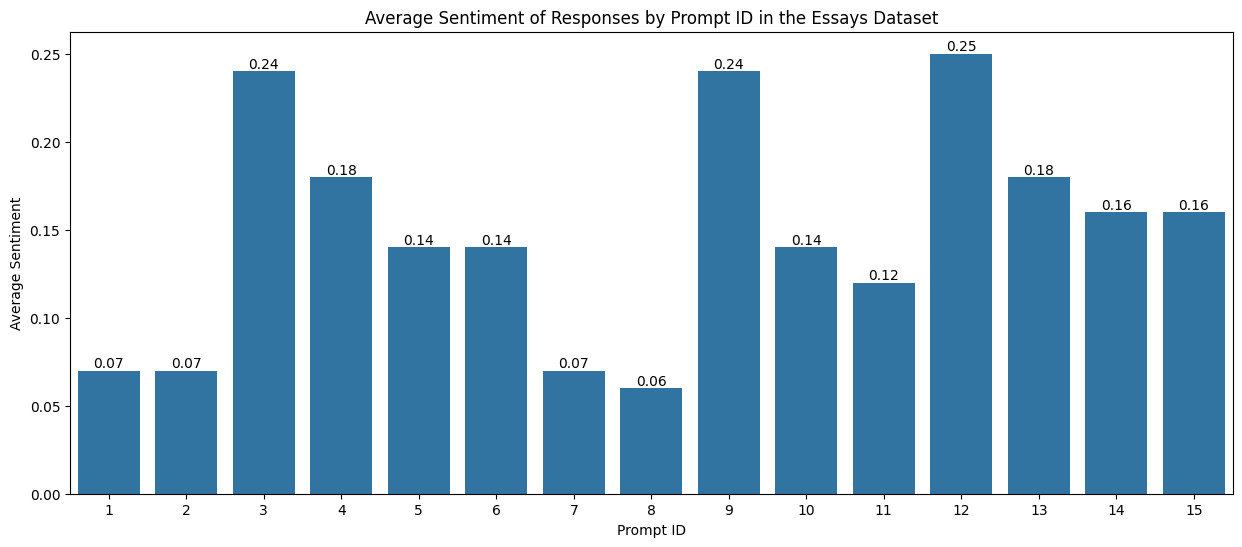

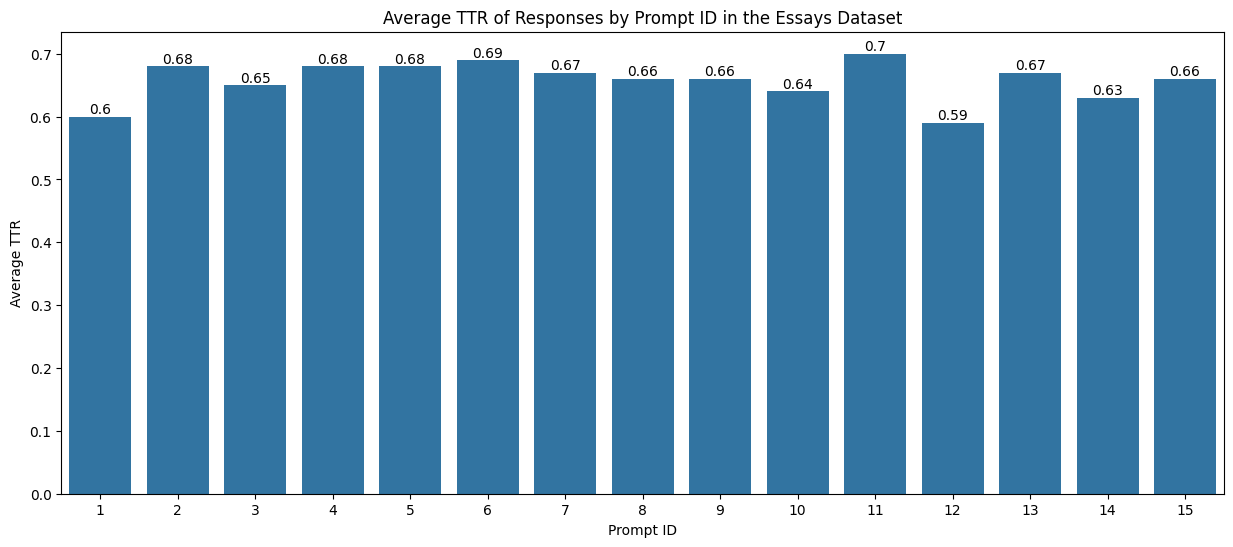

In [16]:
# Visualization for Average Length
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Essays_summary, x='prompt_id', y='length')
plt.title('Average Length of Responses by Prompt ID in the Essays Dataset by Character Count')
plt.xlabel('Prompt ID')
plt.ylabel('Average Length (Character Count)')
plt.xticks()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average Readability
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Essays_summary, x='prompt_id', y='readability')
plt.title('Average Readability of Responses by Prompt ID in the Essays Dataset')
plt.xlabel('Prompt ID')
plt.ylabel('Average Readability')
plt.xticks()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average Sentiment
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Essays_summary, x='prompt_id', y='sentiment')
plt.title('Average Sentiment of Responses by Prompt ID in the Essays Dataset')
plt.xlabel('Prompt ID')
plt.ylabel('Average Sentiment')
plt.xticks()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average TTR
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Essays_summary, x='prompt_id', y='TTR')
plt.title('Average TTR of Responses by Prompt ID in the Essays Dataset')
plt.xlabel('Prompt ID')
plt.ylabel('Average TTR')
plt.xticks()
for container in ax.containers:
    ax.bar_label(container)
plt.show()


#### Prompt Complexity

In [68]:
# Function to add prompt length to the dataset
def add_prompt_length(df, prompt_column):
    df['prompt_length'] = df[prompt_column].apply(len)
    return df

# Add prompt length to the datasets
Essays = add_prompt_length(Essays, 'essay_title')
DAIGT = add_prompt_length(DAIGT, 'instructions')
Dolly = add_prompt_length(Dolly, 'instruction')
PnR = add_prompt_length(PnR, 'Input')


In [69]:
# Define a function to calculate Type-Token Ratio (TTR)
def calculate_ttr(text):
    tokens = text.split()
    types = set(tokens)
    ttr = len(types) / len(tokens) if len(tokens) > 0 else 0
    return ttr

# Add TTR to the Essays dataset
Essays['TTR'] = Essays['essay_text'].apply(calculate_ttr)

# Define a function to assess prompt complexity (e.g., by length of prompt)
def analyze_prompt_complexity(df, response_column):
    df['prompt_length'] = pd.to_numeric(df['prompt_length'], errors='coerce')
    complexity_summary = df.groupby('prompt_length').agg({
        response_column: 'count',
        'length': 'mean',
        'readability': 'mean',
        'sentiment': 'mean',
        'ttr': 'mean'
    }).reset_index()

    # Rename columns for clarity
    complexity_summary.columns = ['prompt_length', 'response_count', 'avg_length', 'avg_readability', 'avg_sentiment', 'avg_TTR']

    return complexity_summary

# Analyze prompt complexity for each dataset
Essays_complexity_summary = analyze_prompt_complexity(Essays, 'essay_text')
DAIGT_complexity_summary = analyze_prompt_complexity(DAIGT, 'source_text')
Dolly_complexity_summary = analyze_prompt_complexity(Dolly, 'response')
PnR_complexity_summary = analyze_prompt_complexity(PnR, 'Output')

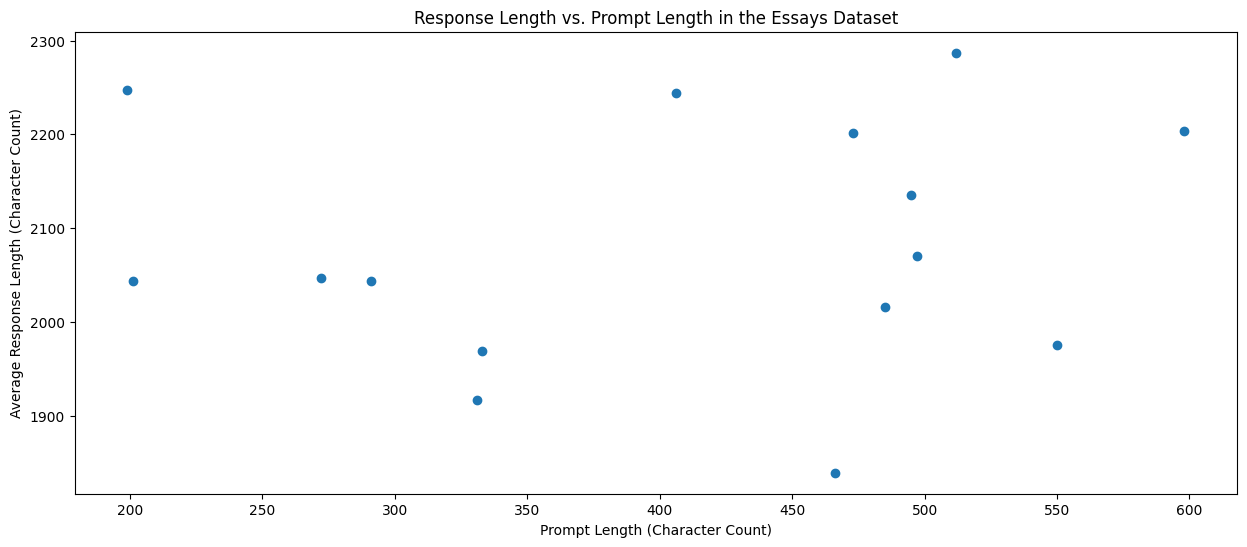

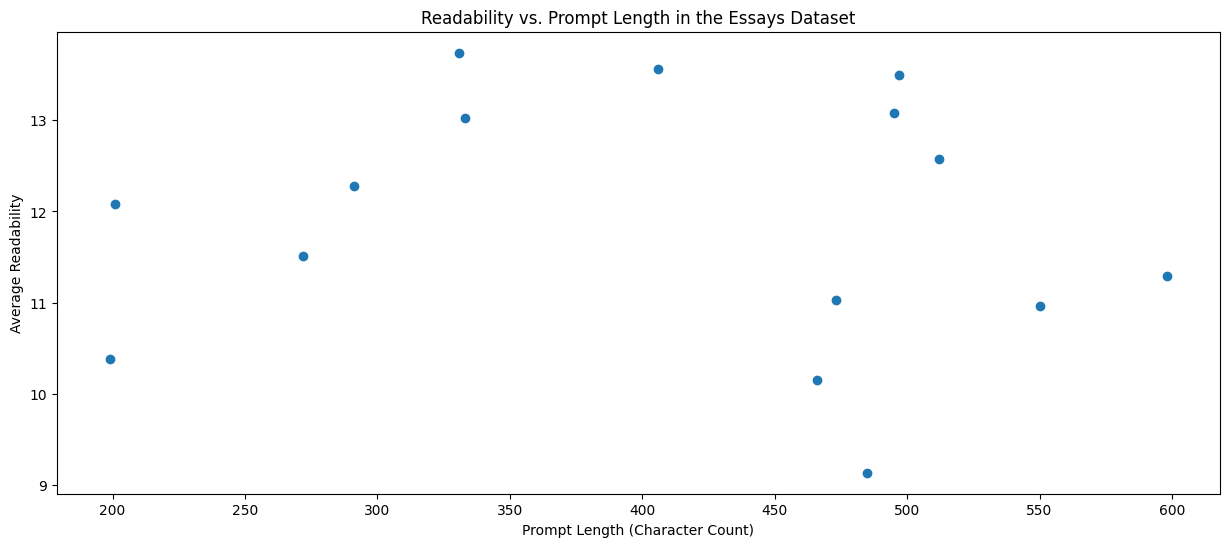

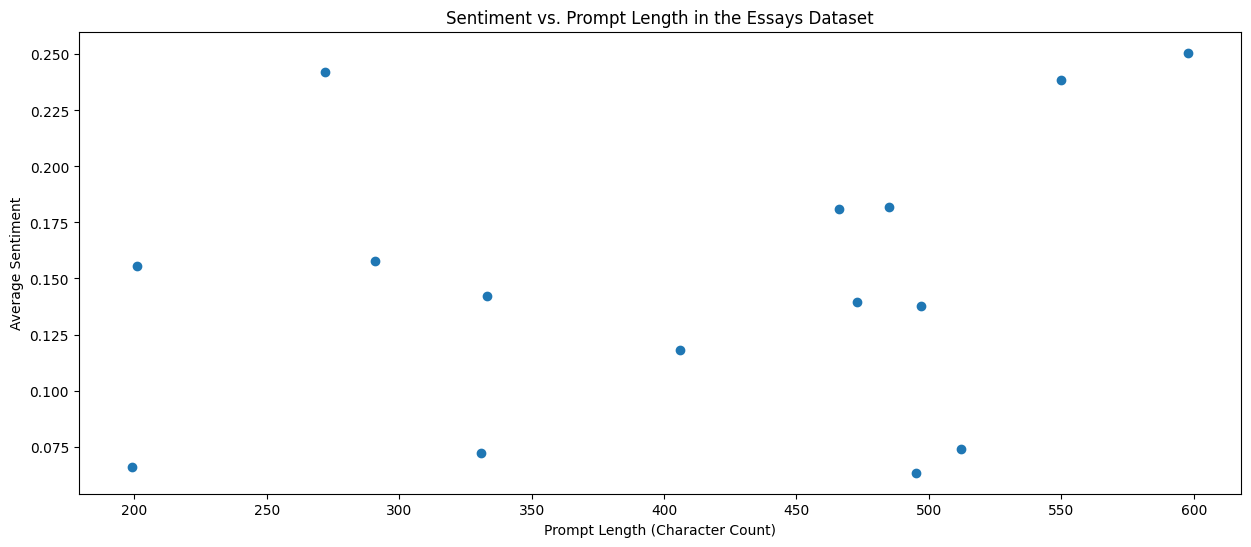

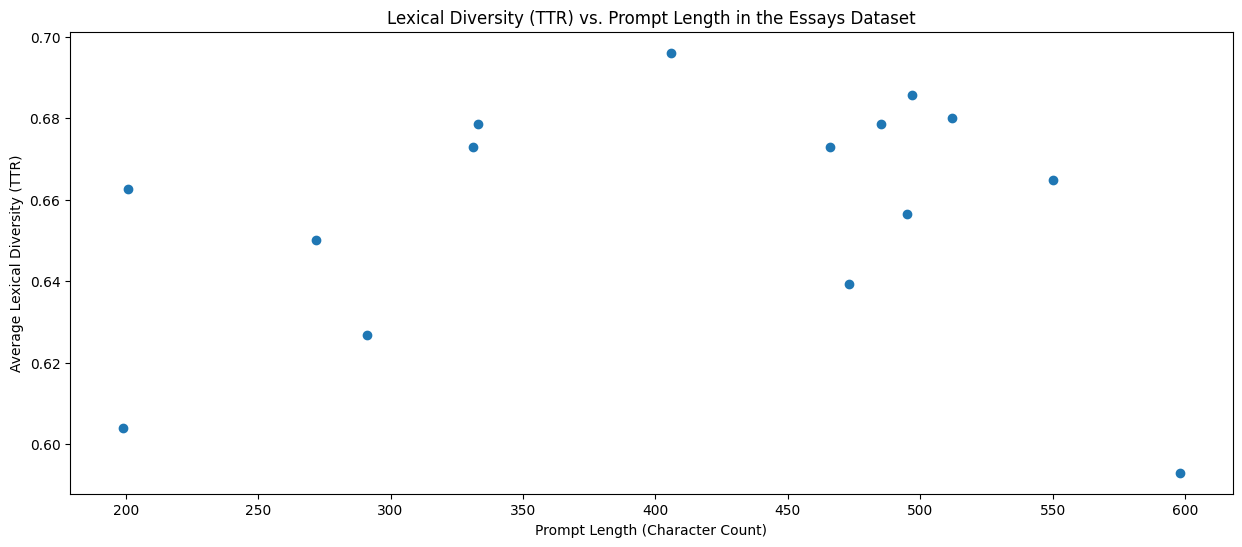

In [70]:
# Plotting each graph separately
plt.figure(figsize=(15, 6))
plt.scatter(Essays_complexity_summary['prompt_length'], Essays_complexity_summary['avg_length'])
plt.title('Response Length vs. Prompt Length in the Essays Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Response Length (Character Count)')
plt.show()

plt.figure(figsize=(15, 6))
plt.scatter(Essays_complexity_summary['prompt_length'], Essays_complexity_summary['avg_readability'])
plt.title('Readability vs. Prompt Length in the Essays Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Readability')
plt.show()

plt.figure(figsize=(15, 6))
plt.scatter(Essays_complexity_summary['prompt_length'], Essays_complexity_summary['avg_sentiment'])
plt.title('Sentiment vs. Prompt Length in the Essays Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Sentiment')
plt.show()

# Plot for Lexical Diversity (TTR) vs. Prompt Length
plt.figure(figsize=(15, 6))
plt.scatter(Essays_complexity_summary['prompt_length'], Essays_complexity_summary['avg_TTR'])
plt.title('Lexical Diversity (TTR) vs. Prompt Length in the Essays Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Lexical Diversity (TTR)')
plt.show()

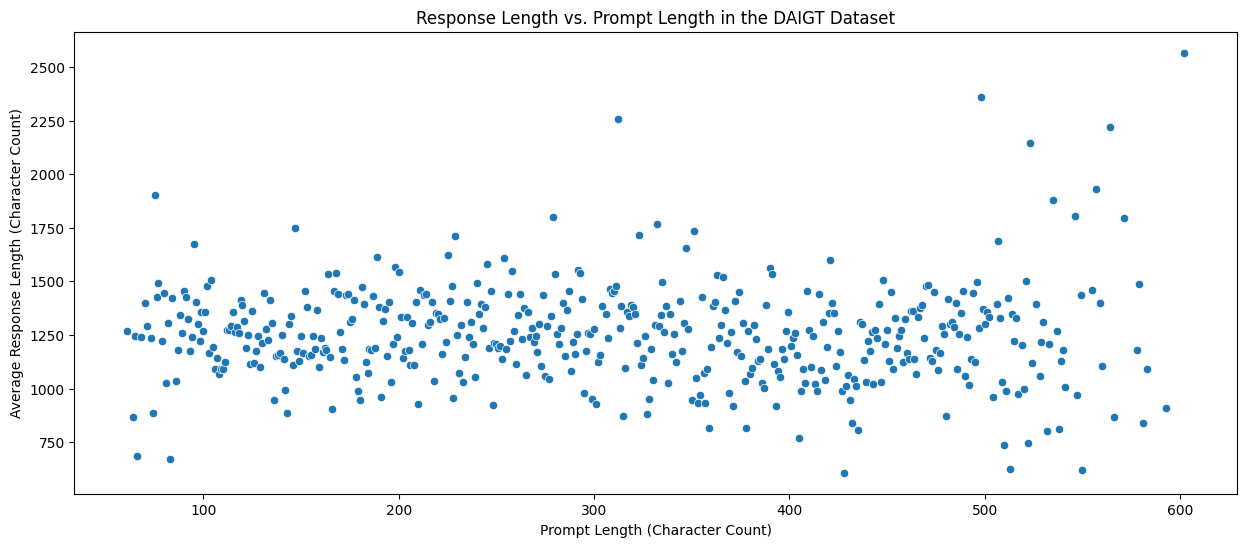

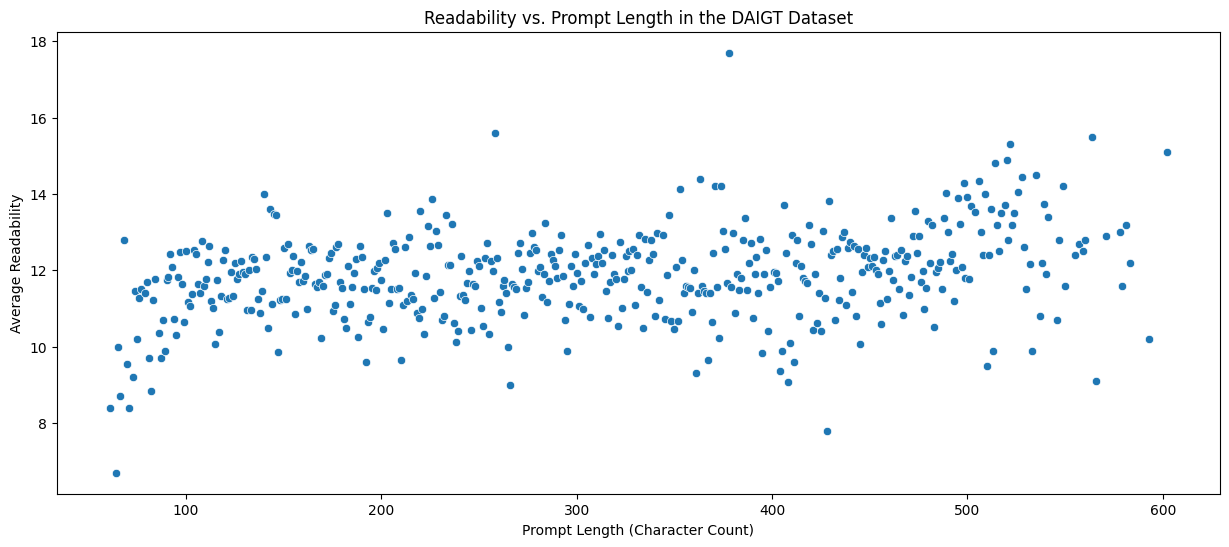

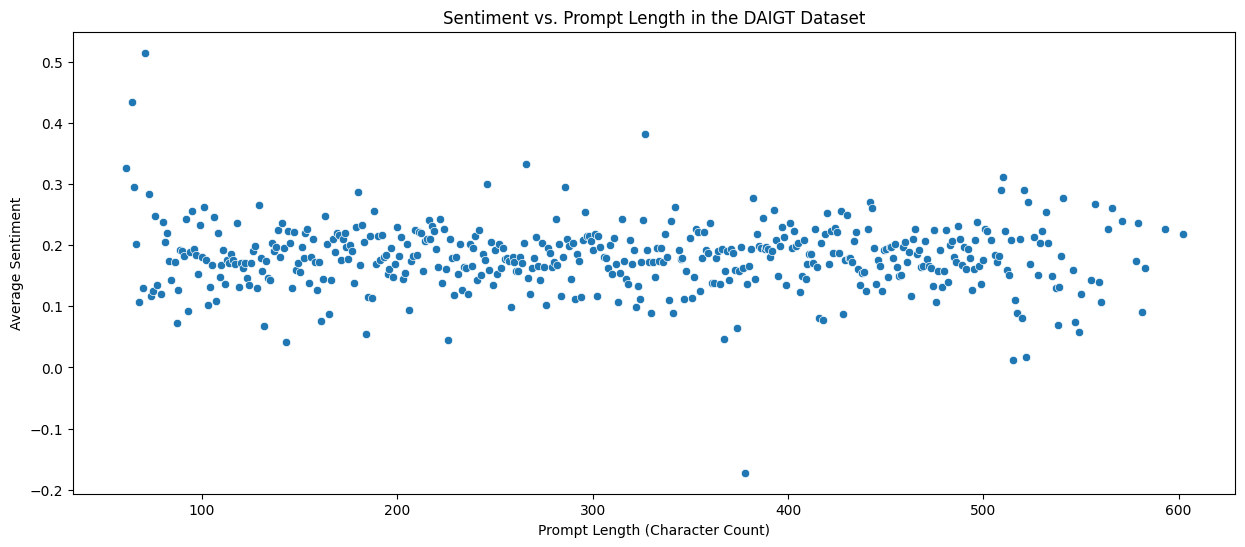

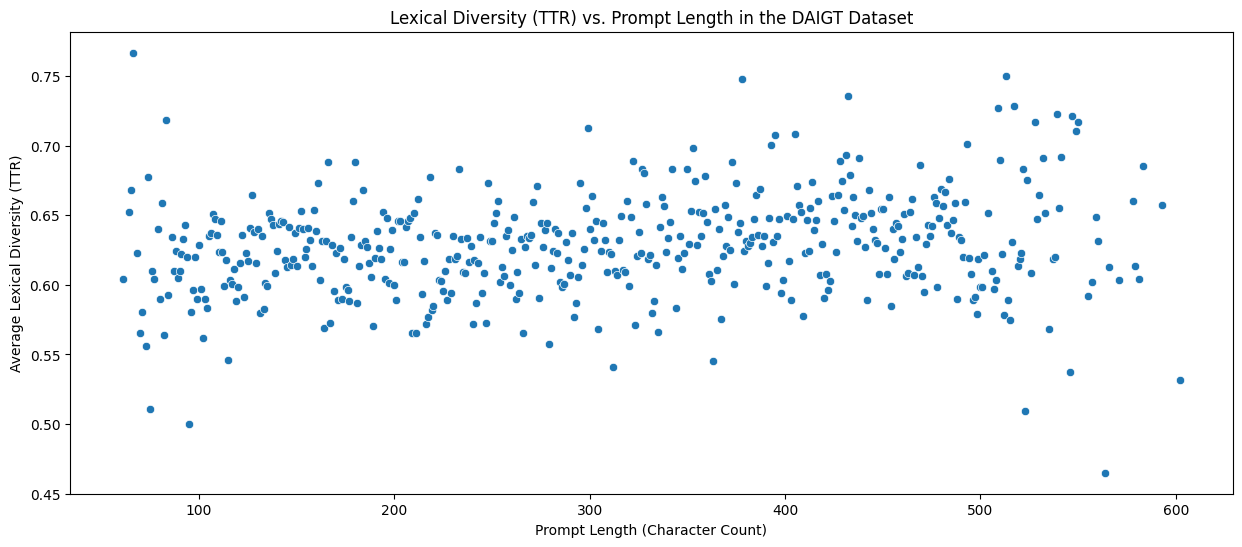

In [71]:
# Plotting each graph separately
plt.figure(figsize=(15, 6))
sns.scatterplot(data=DAIGT_complexity_summary, x='prompt_length', y='avg_length')
plt.title('Response Length vs. Prompt Length in the DAIGT Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Response Length (Character Count)')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=DAIGT_complexity_summary, x='prompt_length', y='avg_readability')
plt.title('Readability vs. Prompt Length in the DAIGT Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Readability')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=DAIGT_complexity_summary, x='prompt_length', y='avg_sentiment')
plt.title('Sentiment vs. Prompt Length in the DAIGT Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Sentiment')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=DAIGT_complexity_summary, x='prompt_length', y='avg_TTR')
plt.title('Lexical Diversity (TTR) vs. Prompt Length in the DAIGT Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Lexical Diversity (TTR)')
plt.show()

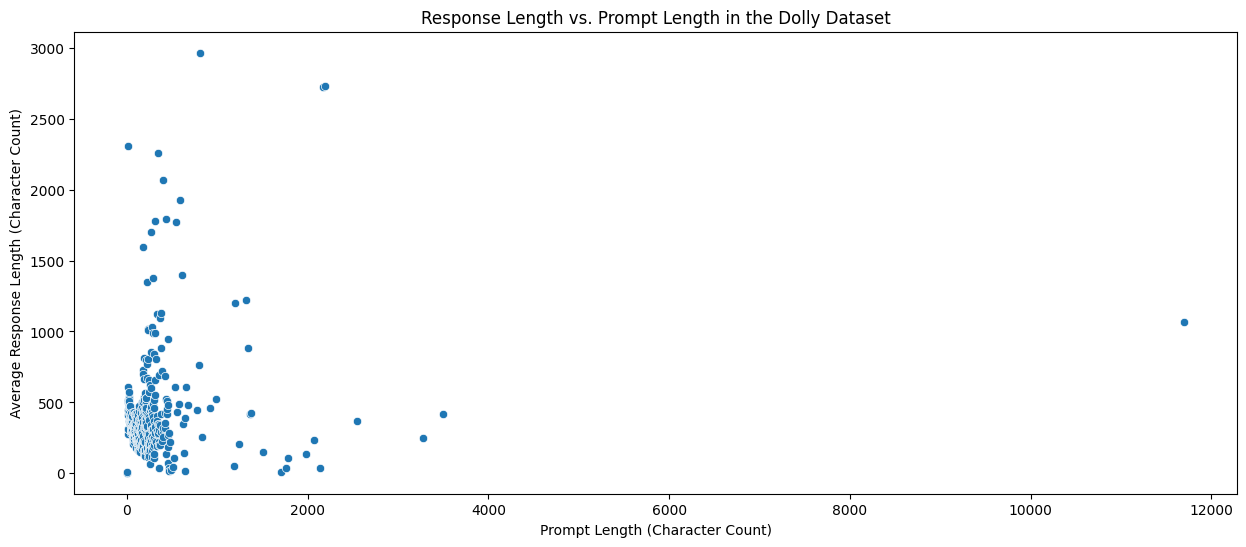

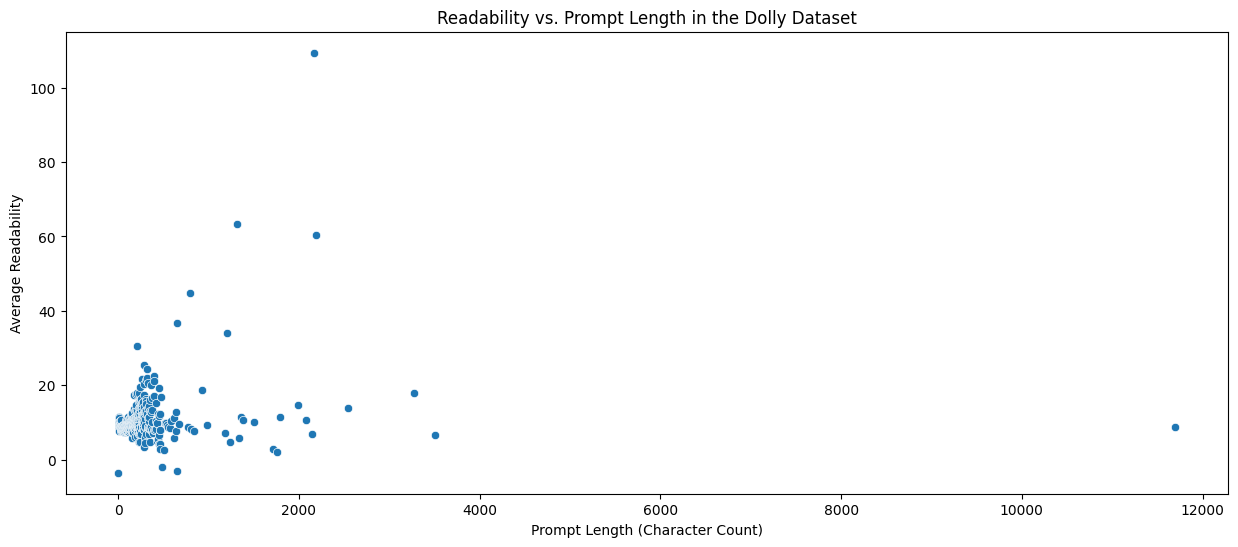

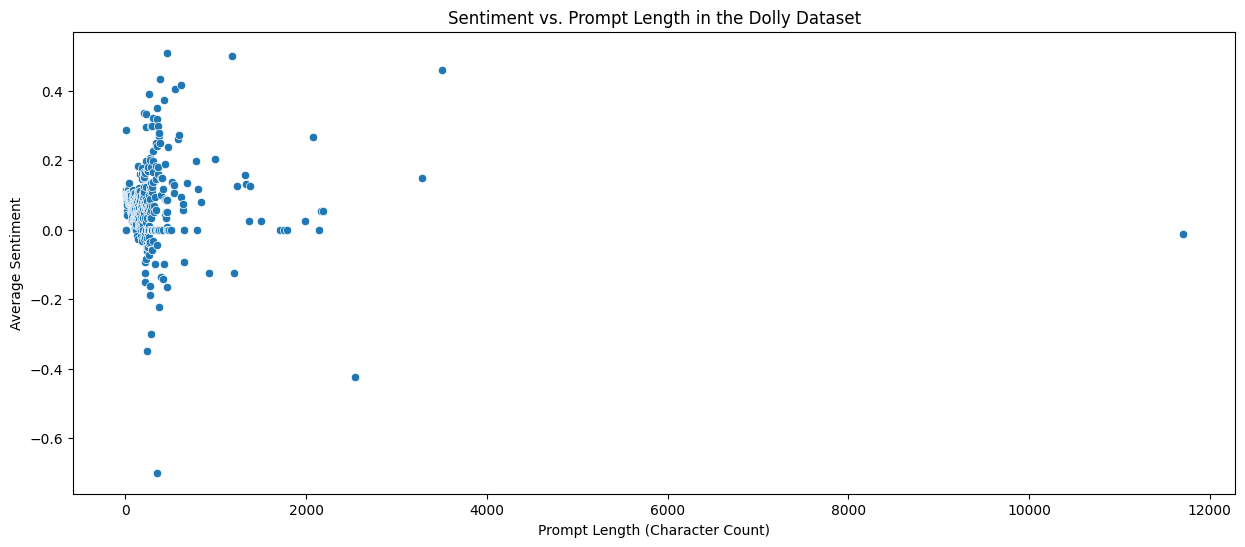

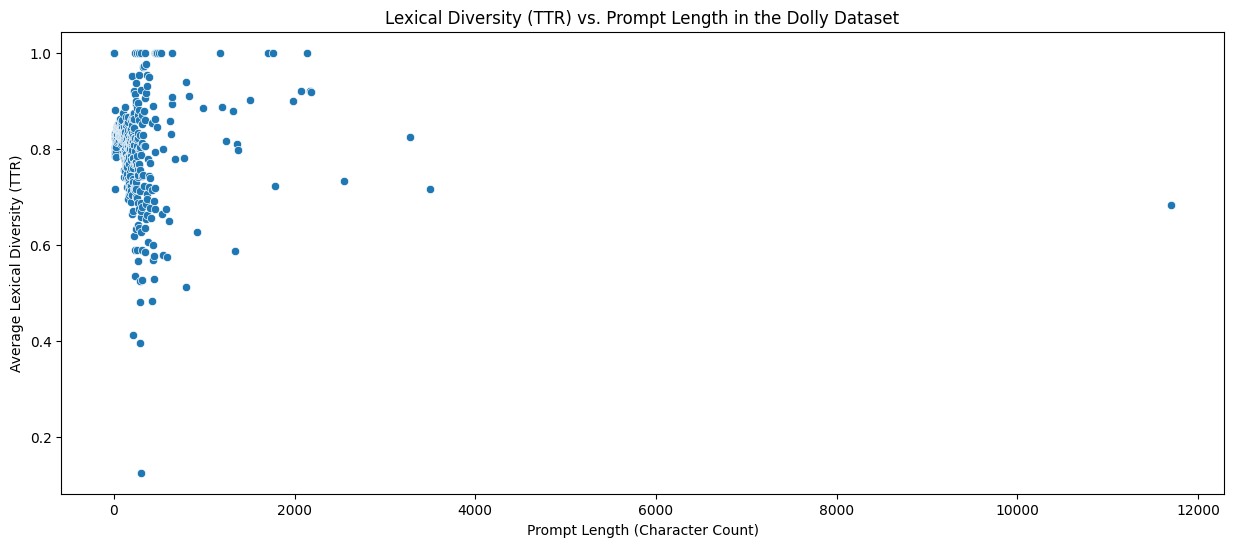

In [72]:
# Plotting each graph separately
plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_summary, x='prompt_length', y='avg_length')
plt.title('Response Length vs. Prompt Length in the Dolly Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Response Length (Character Count)')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_summary, x='prompt_length', y='avg_readability')
plt.title('Readability vs. Prompt Length in the Dolly Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Readability')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_summary, x='prompt_length', y='avg_sentiment')
plt.title('Sentiment vs. Prompt Length in the Dolly Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Sentiment')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_summary, x='prompt_length', y='avg_TTR')
plt.title('Lexical Diversity (TTR) vs. Prompt Length in the Dolly Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Lexical Diversity (TTR)')
plt.show()

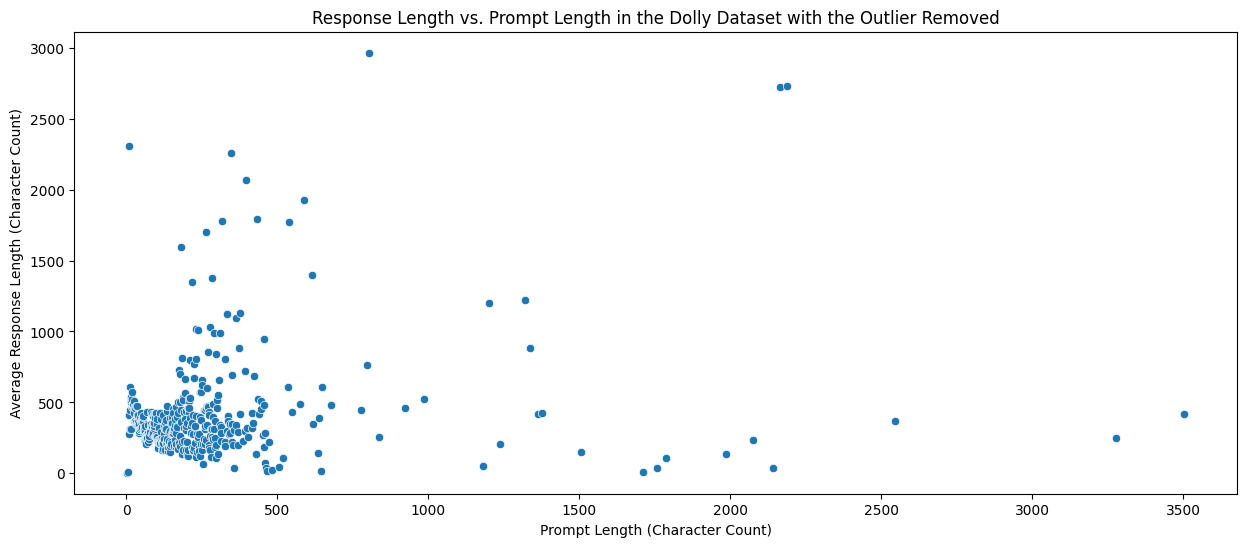

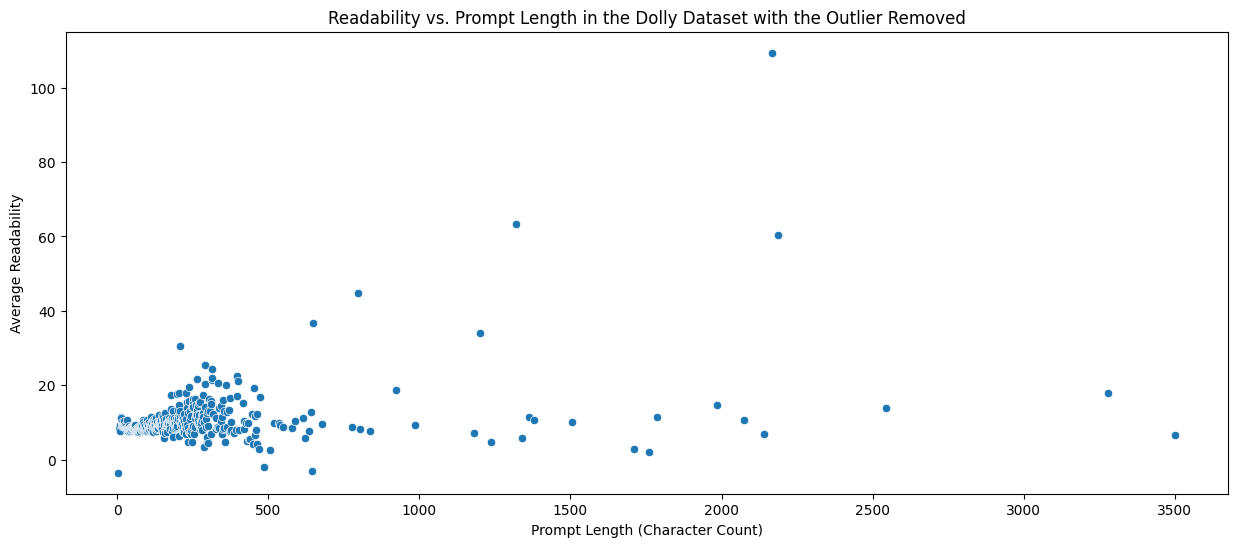

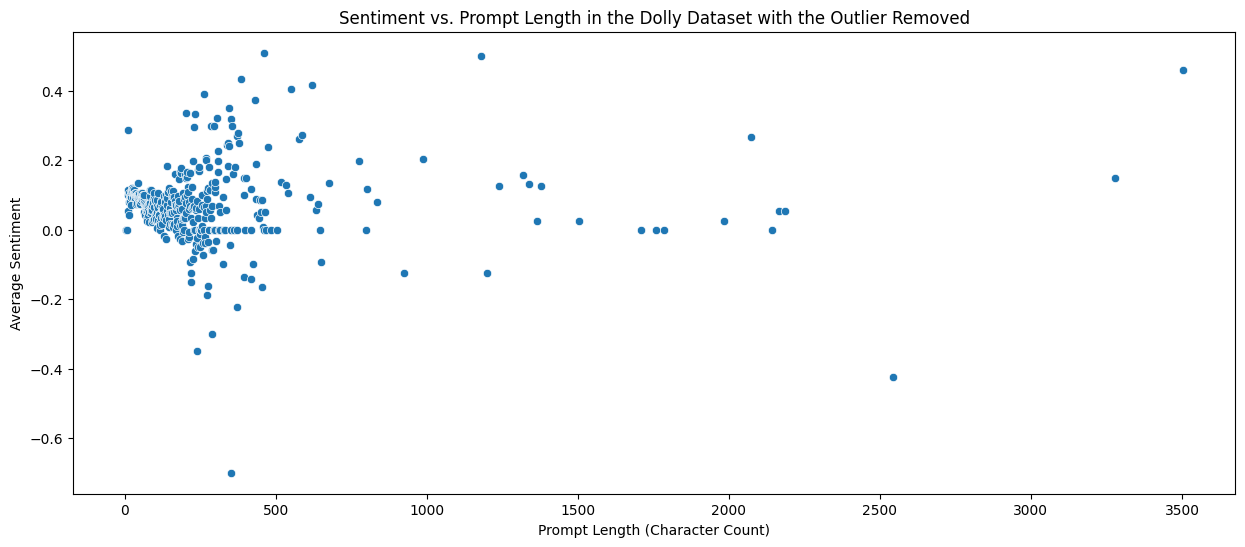

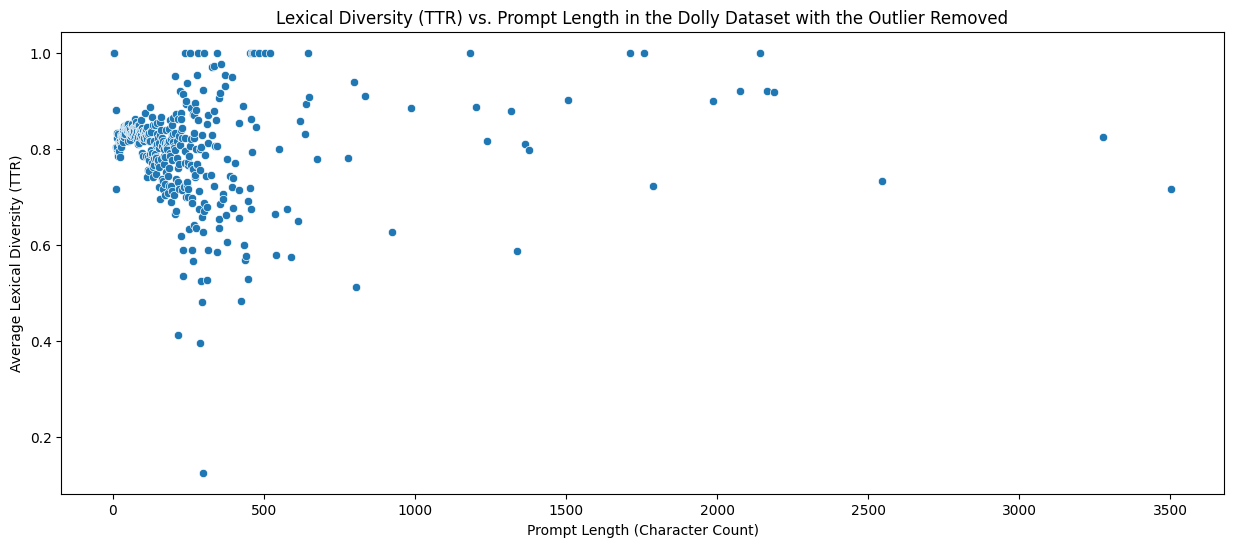

In [74]:
# Filter out the outlier
Dolly_complexity_filtered = Dolly_complexity_summary[Dolly_complexity_summary['prompt_length'] < 10000]

# Plotting without the outlier
plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_filtered, x='prompt_length', y='avg_length')
plt.title('Response Length vs. Prompt Length in the Dolly Dataset with the Outlier Removed')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Response Length (Character Count)')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_filtered, x='prompt_length', y='avg_readability')
plt.title('Readability vs. Prompt Length in the Dolly Dataset with the Outlier Removed')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Readability')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_filtered, x='prompt_length', y='avg_sentiment')
plt.title('Sentiment vs. Prompt Length in the Dolly Dataset with the Outlier Removed')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Sentiment')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_filtered, x='prompt_length', y='avg_TTR')
plt.title('Lexical Diversity (TTR) vs. Prompt Length in the Dolly Dataset with the Outlier Removed')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Lexical Diversity (TTR)')
plt.show()

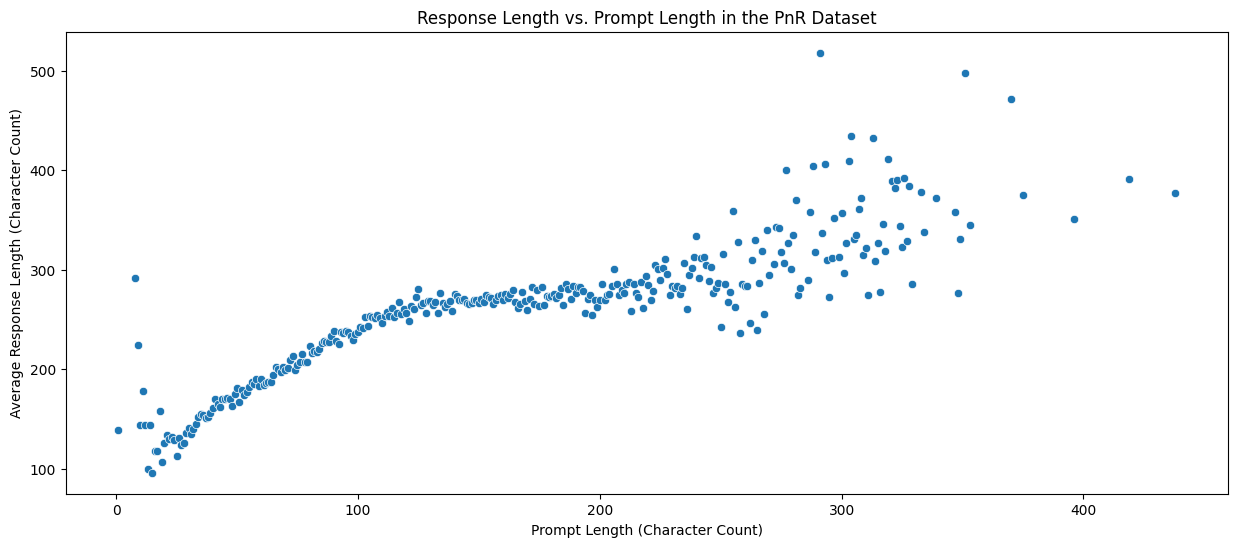

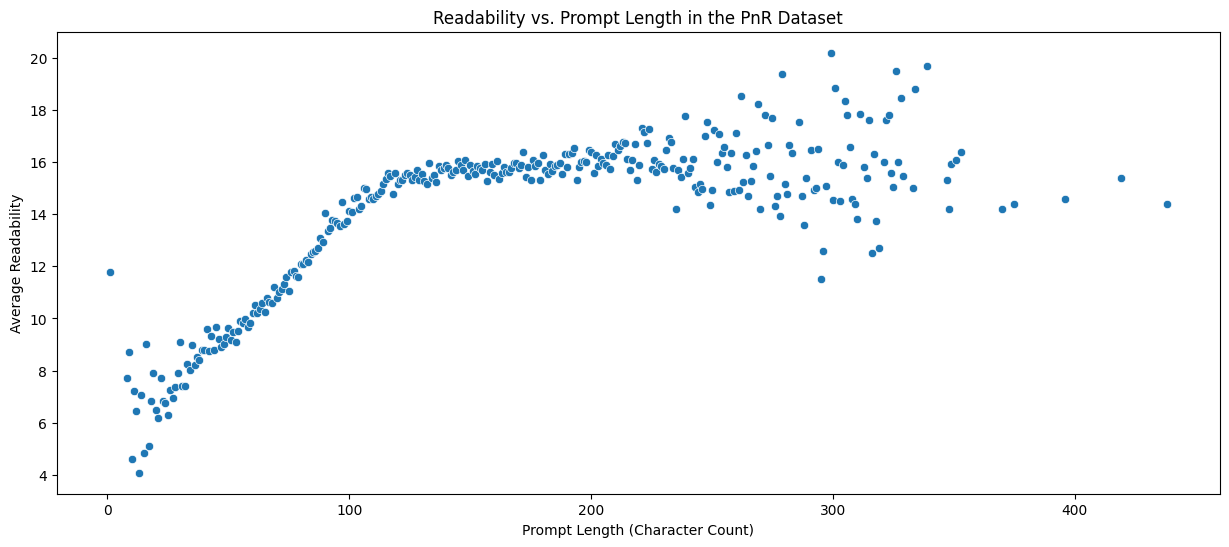

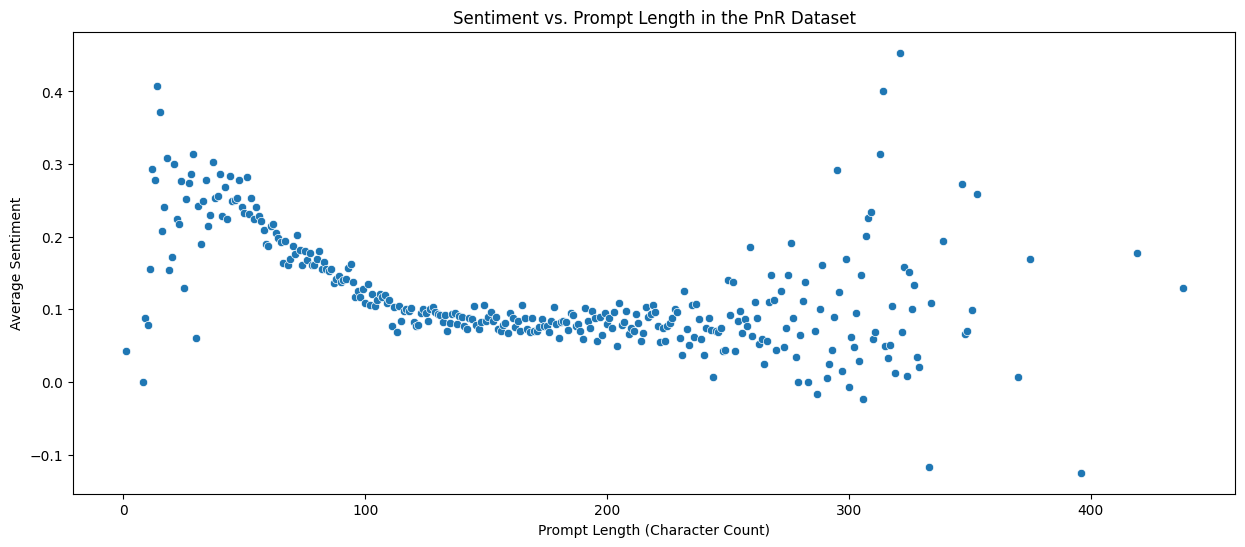

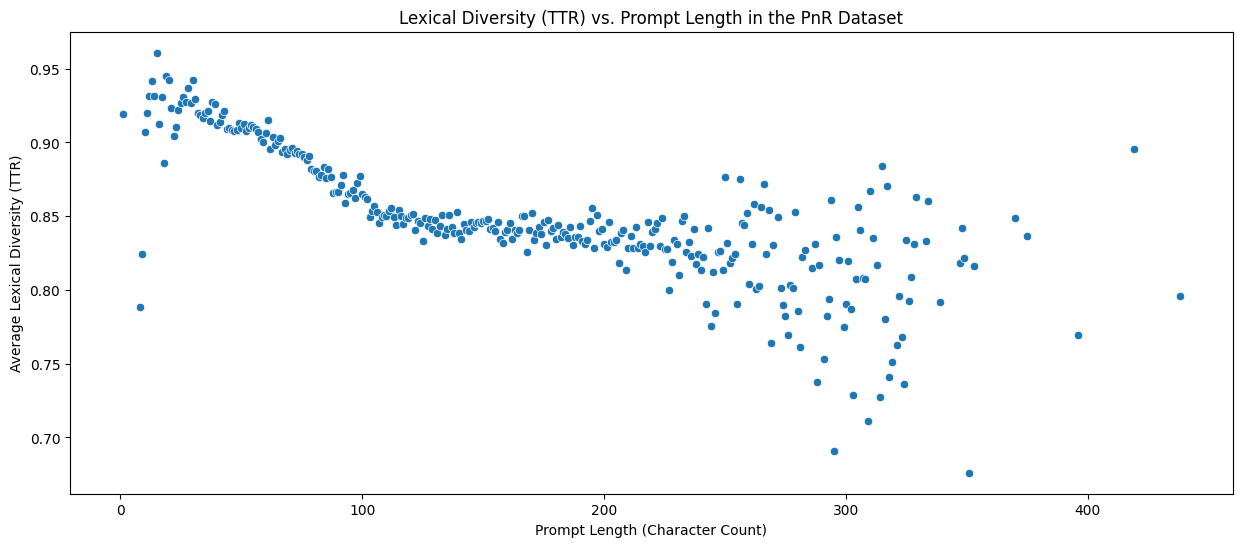

In [76]:

# Plotting each graph separately
plt.figure(figsize=(15, 6))
sns.scatterplot(data=PnR_complexity_summary, x='prompt_length', y='avg_length')
plt.title('Response Length vs. Prompt Length in the PnR Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Response Length (Character Count)')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=PnR_complexity_summary, x='prompt_length', y='avg_readability')
plt.title('Readability vs. Prompt Length in the PnR Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Readability')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=PnR_complexity_summary, x='prompt_length', y='avg_sentiment')
plt.title('Sentiment vs. Prompt Length in the PnR Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Sentiment')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=PnR_complexity_summary, x='prompt_length', y='avg_TTR')
plt.title('Lexical Diversity (TTR) vs. Prompt Length in the PnR Dataset')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Lexical Diversity (TTR)')
plt.show()

#### Prompt Topics

In [77]:
# Function to analyze performance by topic
def analyze_topic_performance(df, text_column, topic_column):
    df[topic_column] = df[topic_column].astype(str)
    topic_summary = df.groupby(topic_column).agg({
        text_column: 'count',
        'length': 'mean',
        'readability': 'mean',
        'sentiment': 'mean',
        'ttr': 'mean'
    }).reset_index()
    topic_summary.columns = [topic_column, 'response_count', 'avg_length', 'avg_readability', 'avg_sentiment','avg_ttr']
    # Round the results to 2 decimal places
    topic_summary = topic_summary.round({'response_count': 2, 'avg_length': 2, 'avg_readability': 2, 'avg_sentiment': 2, 'avg_ttr': 2})
    return topic_summary

# Example for datasets
Dolly_topic_summary = analyze_topic_performance(Dolly, 'response', 'category')
PnR_topic_summary = analyze_topic_performance(PnR, 'Output', 'topic')
Essays_topic_summary = analyze_topic_performance(Essays, 'essay_text', 'prompt_id')

# Convert prompt_id to numeric and sort by prompt_id
Essays_topic_summary['prompt_id'] = pd.to_numeric(Essays_topic_summary['prompt_id'])
Essays_topic_summary = Essays_topic_summary.sort_values('prompt_id')

### Advanced Lexical Analysis

In [78]:
def perform_topic_modeling(df, text_column, n_topics=5):
    count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    doc_term_matrix = count_vectorizer.fit_transform(df[text_column])

    LDA = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    LDA.fit(doc_term_matrix)

    for i, topic in enumerate(LDA.components_):
        print(f'Top 10 words for topic #{i}:')
        print([count_vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
        print('\n')

perform_topic_modeling(Dolly, 'response')

Top 10 words for topic #0:
['film', 'best', 'born', 'won', 'john', 'series', 'american', 'world', 'known', 'music']


Top 10 words for topic #1:
['light', 'include', 'add', 'use', 'green', 'like', 'coffee', 'red', 'food', 'water']


Top 10 words for topic #2:
['different', 'used', 'help', 'need', 'good', 'make', 'use', 'people', 'time', 'like']


Top 10 words for topic #3:
['south', 'india', 'city', 'country', 'new', 'world', 'state', 'united', 'states', 'data']


Top 10 words for topic #4:
['park', 'player', 'football', 'players', 'ball', 'world', 'day', 'time', 'game', 'team']




In [79]:
perform_topic_modeling(PnR, 'Output')

Top 10 words for topic #0:
['involves', 'person', 'feelings', 'moral', 'making', 'understanding', 'values', 'personal', 'self', 'nietzsche']


Top 10 words for topic #1:
['search', 'world', 'existence', 'camus', 'meaning', 'freedom', 'themes', 'works', 'human', 'individual']


Top 10 words for topic #2:
['recommend', 'story', 'provoking', 'thought', 'love', 'create', 'like', 'time', 'favorite', 'music']


Top 10 words for topic #3:
['human', 'explore', 'understanding', 'relationship', 'language', 'power', 'social', 'works', 'literary', 'literature']


Top 10 words for topic #4:
['life', 'try', 'world', 'don', 'favorite', 'love', 'time', 'like', 'new', 've']




In [80]:
perform_topic_modeling(Essays, 'essay_text')

Top 10 words for topic #0:
['new', 'seagoing', 'cowboys', 'life', 'like', 'program', 'evidence', 'mars', 'natural', 'face']


Top 10 words for topic #1:
['electoral', 'extracurricular', 'states', 'time', 'popular', 'school', 'activities', 'vote', 'policy', 'students']


Top 10 words for topic #2:
['technology', 'classroom', 'distance', 'service', 'community', 'projects', 'teachers', 'student', 'learning', 'students']


Top 10 words for topic #3:
['phones', 'safety', 'drivers', 'cars', 'driverless', 'use', 'driving', 'phone', 'cell', 'venus']


Top 10 words for topic #4:
['opinions', 'public', 'decision', 'advice', 'different', 'choice', 'person', 'people', 'multiple', 'car']




In [81]:
perform_topic_modeling(DAIGT, 'source_text')

Top 10 words for topic #0:
['activities', 'early', 'experience', 'skills', 'college', 'time', 'high', 'career', 'school', 'students']


Top 10 words for topic #1:
['student', 'technology', 'classes', 'online', 'day', 'activities', 'time', 'learning', 'school', 'students']


Top 10 words for topic #2:
['having', 'people', 'work', 'goals', 'working', 'failure', 'attitude', 'life', 'positive', 'success']


Top 10 words for topic #3:
['true', 'sense', 'esteem', 'positive', 'example', 'kindness', 'community', 'world', 'people', 'self']


Top 10 words for topic #4:
['character', 'help', 'advice', 'person', 'life', 'making', 'important', 'make', 'people', 'decisions']




In [82]:
def assign_topics_to_responses(df, text_column, LDA, count_vectorizer):
    doc_term_matrix = count_vectorizer.transform(df[text_column])
    topic_assignments = LDA.transform(doc_term_matrix).argmax(axis=1)
    df['assigned_topic'] = topic_assignments
    return df

# Perform topic modeling and assign topics
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = count_vectorizer.fit_transform(Dolly['response'])

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

Dolly_with_topics = assign_topics_to_responses(Dolly, 'response', LDA, count_vectorizer)

# Analyze performance by assigned topic
topic_performance_summary = analyze_topic_performance(Dolly_with_topics, 'response', 'assigned_topic')
print(topic_performance_summary) 


  assigned_topic  response_count  avg_length  avg_readability  avg_sentiment  \
0              0            2965      252.68             7.92           0.07   
1              1            2291      285.24             8.13           0.07   
2              2            4003      505.42             9.25           0.11   
3              3            3090      349.23            10.27           0.06   
4              4            2662      327.01             8.24           0.10   

   avg_ttr  
0     0.88  
1     0.83  
2     0.78  
3     0.83  
4     0.83  


In [83]:
DAIGT_with_topics = assign_topics_to_responses(DAIGT, 'source_text', LDA, count_vectorizer)

# Analyze performance by assigned topic
topic_performance_summary = analyze_topic_performance(DAIGT_with_topics, 'source_text', 'assigned_topic')
print(topic_performance_summary)

  assigned_topic  response_count  avg_length  avg_readability  avg_sentiment  \
0              0               4     1257.25            10.92           0.13   
1              1              11      971.64            11.75           0.19   
2              2            2363     1253.44            11.85           0.18   
3              3              13     1390.15            12.80           0.21   
4              4              30     1024.93             9.67           0.29   

   avg_ttr  
0     0.69  
1     0.69  
2     0.63  
3     0.63  
4     0.66  


In [84]:
Essays_with_topics = assign_topics_to_responses(Essays, 'essay_text', LDA, count_vectorizer)

# Analyze performance by assigned topic
topic_performance_summary = analyze_topic_performance(Essays_with_topics, 'essay_text', 'assigned_topic')
print(topic_performance_summary)

  assigned_topic  response_count  avg_length  avg_readability  avg_sentiment  \
0              2             952     2072.93            11.92           0.14   
1              3              48     2222.25            11.37           0.25   

   avg_ttr  
0     0.66  
1     0.59  


In [85]:
PnR_with_topics = assign_topics_to_responses(PnR, 'Output', LDA, count_vectorizer)

# Analyze performance by assigned topic
topic_performance_summary = analyze_topic_performance(PnR_with_topics, 'Output', 'assigned_topic')
print(topic_performance_summary)

  assigned_topic  response_count  avg_length  avg_readability  avg_sentiment  \
0              0            4149      207.96            11.96           0.18   
1              1            3266      179.25             8.41           0.25   
2              2           36681      228.61            13.05           0.14   
3              3            2401      241.95            15.61           0.09   
4              4            3101      158.50             8.41           0.31   

   avg_ttr  
0     0.89  
1     0.91  
2     0.87  
3     0.85  
4     0.91  


### Response Length

#### Response Length, Diversity & Topic coverage analysis

In [86]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Add LLM name to each dataset
Essays['LLM'] = 'Essays'
Dolly['LLM'] = 'Dolly'
PnR['LLM'] = 'PnR'
DAIGT['LLM'] = 'DAIGT'

# Normalize column names to make merging easier
Essays = Essays.rename(columns={'essay_title': 'prompt', 'essay_text': 'response'})
Dolly = Dolly.rename(columns={'instruction': 'prompt', 'response': 'response'})
PnR = PnR.rename(columns={'Input': 'prompt', 'Output': 'response'})
DAIGT = DAIGT.rename(columns={'instructions': 'prompt', 'source_text': 'response'})

# Add topic information
Essays['topic'] = Essays['prompt_id']
Dolly['topic'] = Dolly['category']
PnR['topic'] = PnR['topic']
DAIGT['topic'] = DAIGT['prompt']  
# Convert 'topic' to numeric if possible
def convert_to_numeric(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce')

convert_to_numeric(Essays, 'topic')


# Separate DAIGT dataset
DAIGT_df = DAIGT[['LLM', 'prompt', 'response']]

# Combine remaining datasets
combined_df = pd.concat([Essays[['LLM', 'topic', 'prompt', 'response']], 
                         Dolly[['LLM', 'topic', 'prompt', 'response']], 
                         PnR[['LLM', 'topic', 'prompt', 'response']]])

# Response Length Analysis
combined_df['response_length'] = combined_df['response'].apply(lambda x: len(word_tokenize(x)))
DAIGT_df['response_length'] = DAIGT_df['response'].apply(lambda x: len(word_tokenize(x)))

# Calculate response diversity
def calculate_diversity(text):
    tokens = word_tokenize(text)
    if len(tokens) == 0:
        return 0
    return len(set(tokens)) / len(tokens)

combined_df['diversity'] = combined_df['response'].apply(calculate_diversity)
DAIGT_df['diversity'] = DAIGT_df['response'].apply(calculate_diversity)

# Calculate average response length and diversity for DAIGT dataset
avg_response_length_DAIGT = DAIGT_df['response_length'].mean()
avg_diversity_DAIGT = DAIGT_df['diversity'].mean()

print(f"Average Response Length for the DAIGT Dataset: {avg_response_length_DAIGT:.2f}")
print(f"Average Diversity for the DAIGT Dataset: {avg_diversity_DAIGT:.2f}")

C:\Users\Zeyd Ali\AppData\Local\Temp\ipykernel_15096\3573901562.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DAIGT_df['response_length'] = DAIGT_df['response'].apply(lambda x: len(word_tokenize(x)))


Average Response Length for the DAIGT Dataset: 224.54
Average Diversity for the DAIGT Dataset: 0.56


C:\Users\Zeyd Ali\AppData\Local\Temp\ipykernel_15096\3573901562.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DAIGT_df['diversity'] = DAIGT_df['response'].apply(calculate_diversity)


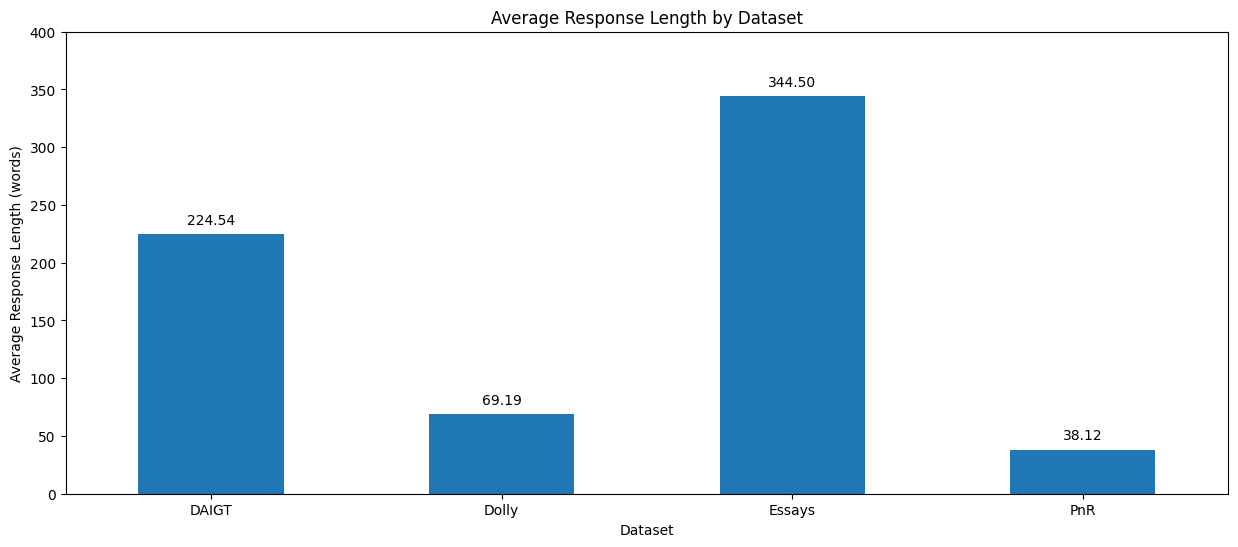

In [87]:
# Plot average response length for each LLM (including DAIGT)
avg_response_length_llm = pd.concat([combined_df, DAIGT_df]).groupby('LLM')['response_length'].mean()
ax = avg_response_length_llm.plot(kind='bar', figsize=(15, 6), title='Average Response Length by Dataset')
plt.xlabel('Dataset')
plt.ylabel('Average Response Length (words)')
plt.xticks(rotation=0)
plt.ylim(0, 400)

# Annotate bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

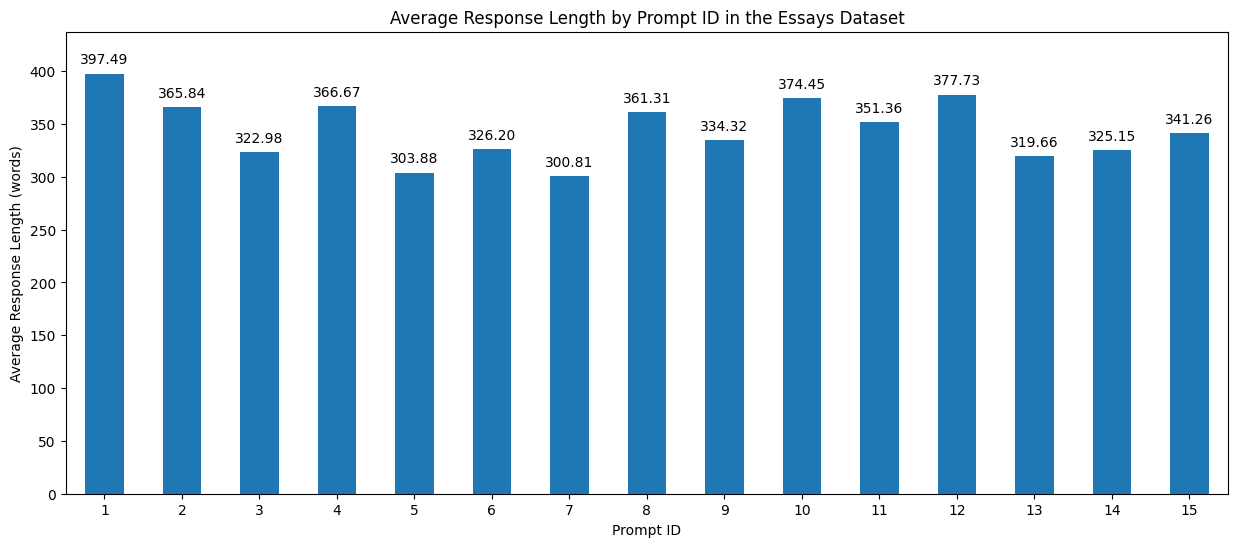

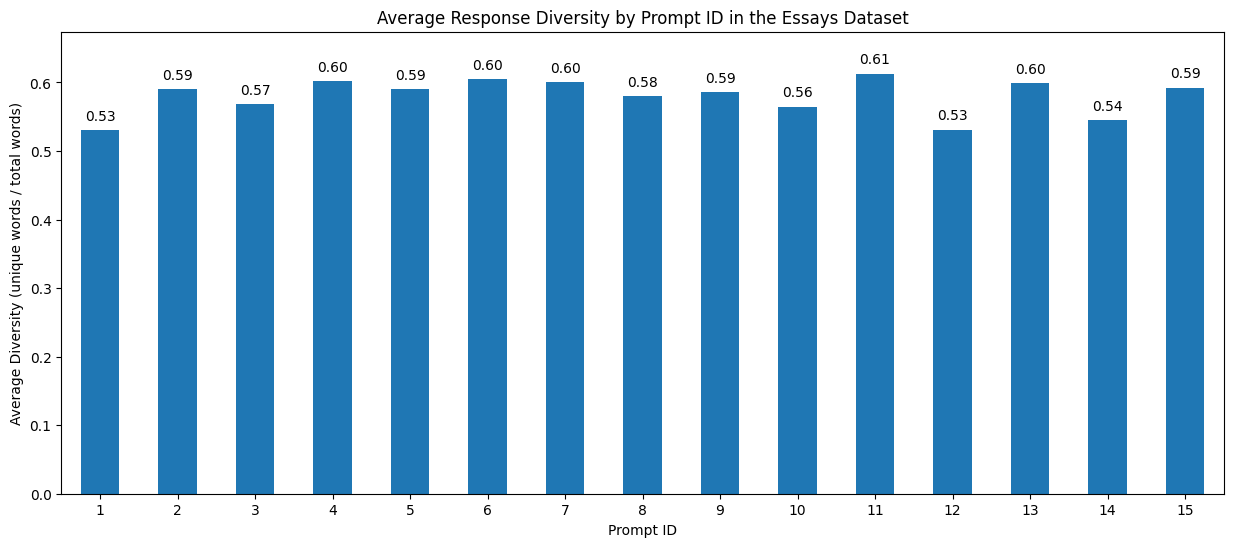

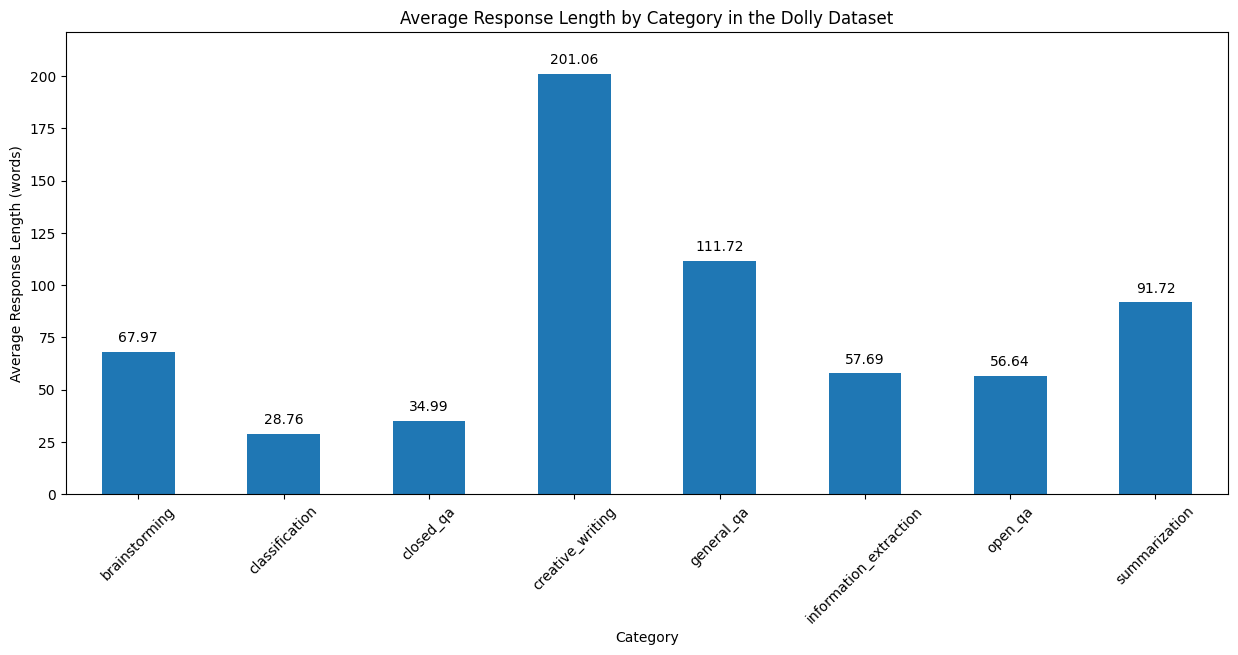

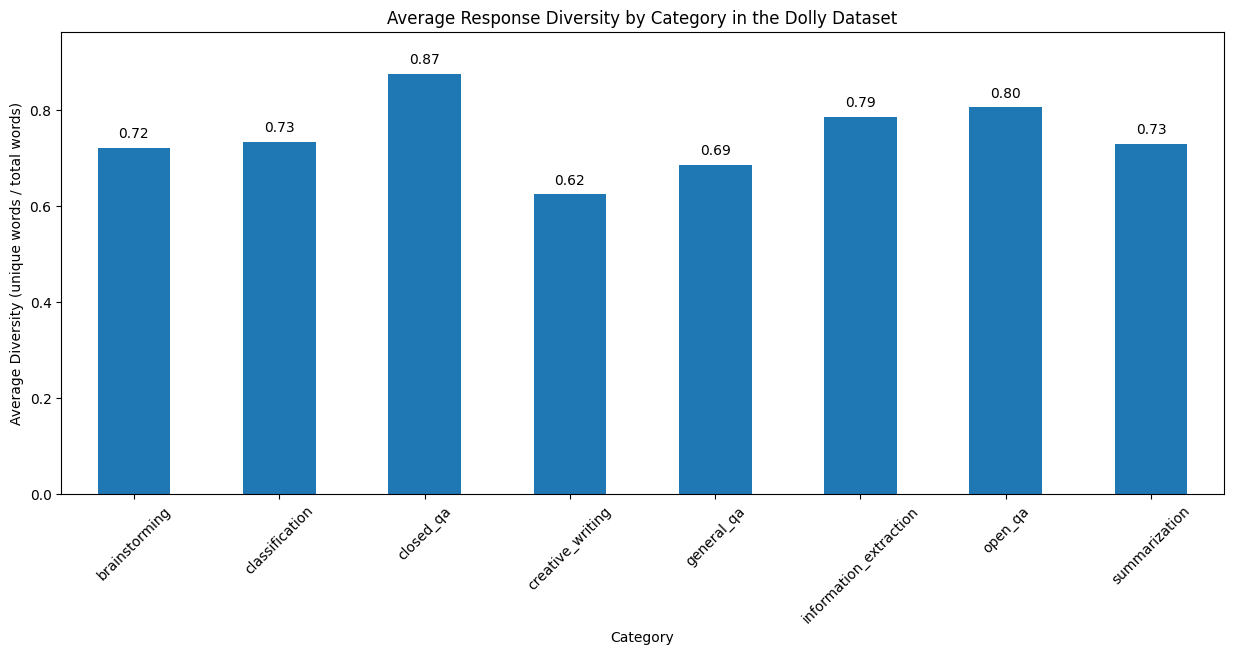

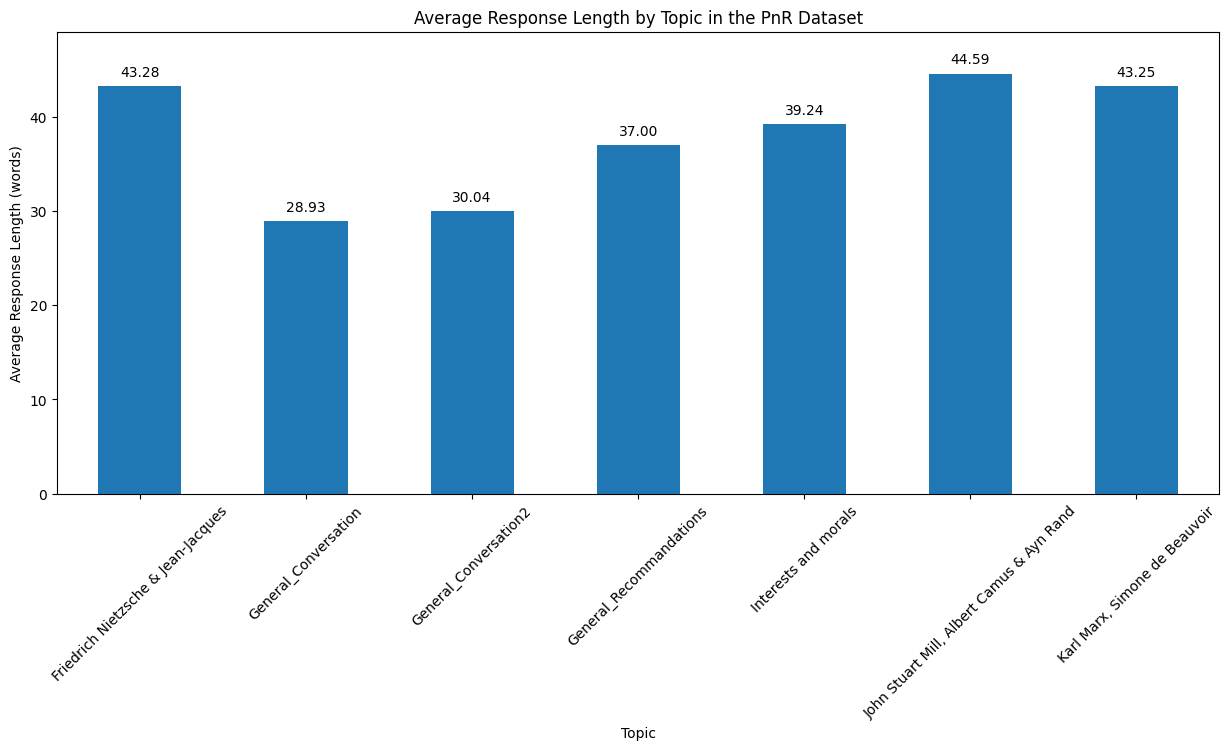

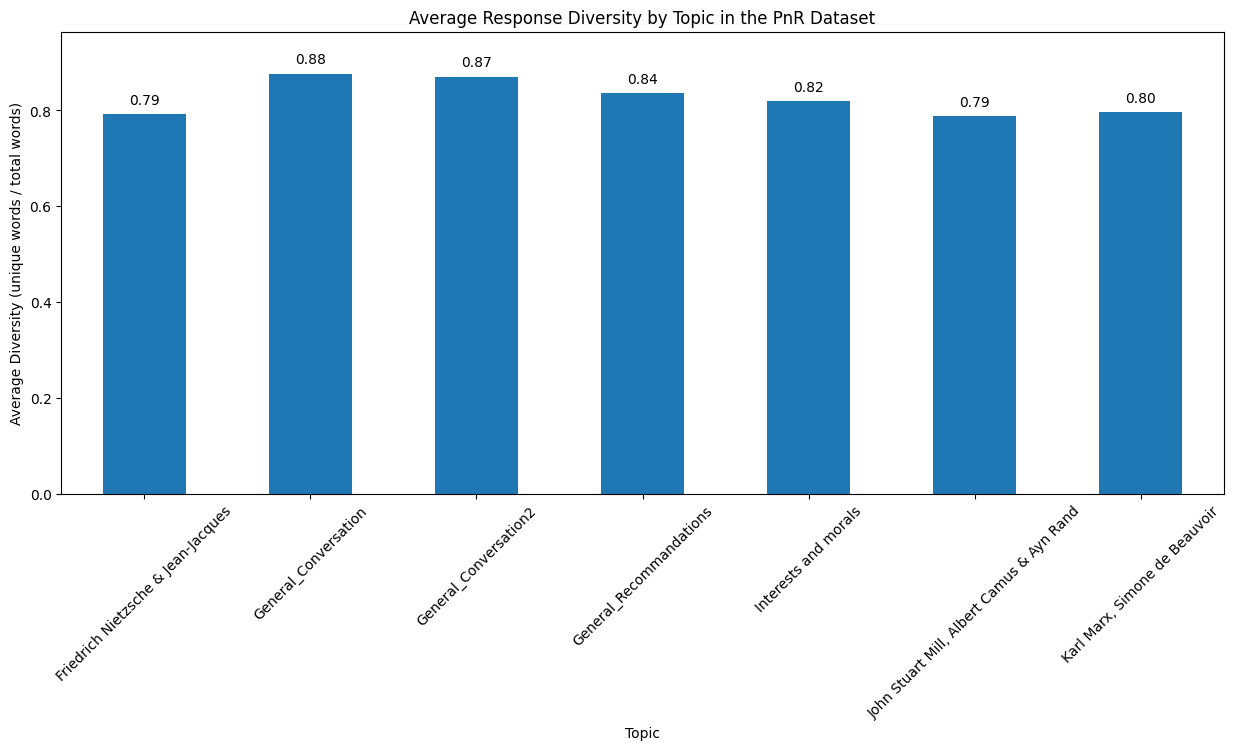

In [88]:
import matplotlib.pyplot as plt

# Separate plots for each LLM except 'ChatGPT_DAIGT'
llms = combined_df['LLM'].unique()
for llm in llms:
    llm_df = combined_df[combined_df['LLM'] == llm].sort_values(by='topic')
    
    # Update labels based on LLM
    if llm == 'Essays':
        x_label = 'Prompt ID'
        title_length = 'Average Response Length by Prompt ID in the Essays Dataset'
        title_diversity = 'Average Response Diversity by Prompt ID in the Essays Dataset'
    elif llm == 'Dolly':
        x_label = 'Category'
        title_length = 'Average Response Length by Category in the Dolly Dataset'
        title_diversity = 'Average Response Diversity by Category in the Dolly Dataset'
    else:
        x_label = 'Topic'
        title_length = f'Average Response Length by Topic in the {llm} Dataset'
        title_diversity = f'Average Response Diversity by Topic in the {llm} Dataset'
    
    # Average response length by topic
    avg_response_length = llm_df.groupby('topic')['response_length'].mean()
    ax = avg_response_length.plot(kind='bar', figsize=(15, 6), title=title_length)
    plt.xlabel(x_label)
    plt.ylabel('Average Response Length (words)')
    
    # Adjust y-axis limit
    max_height = avg_response_length.max()
    plt.ylim(0, max_height * 1.1)  # Increase limit by 10%
    
    # Adjust rotation only for non-Essays datasets
    if llm == 'Essays':
        plt.xticks(rotation=0)
    else:
        plt.xticks(rotation=45)
    
    # Annotate bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.show()
    
    # Average diversity by topic
    avg_diversity = llm_df.groupby('topic')['diversity'].mean()
    ax = avg_diversity.plot(kind='bar', figsize=(15, 6), title=title_diversity)
    plt.xlabel(x_label)
    plt.ylabel('Average Diversity (unique words / total words)')
    
    # Adjust y-axis limit
    max_height = avg_diversity.max()
    plt.ylim(0, max_height * 1.1)  # Increase limit by 10%
    
    # Adjust rotation only for non-Essays datasets
    if llm == 'Essays':
        plt.xticks(rotation=0)
    else:
        plt.xticks(rotation=45)
    
    # Annotate bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.show()


### Cosine Similarity & Readability Consistency

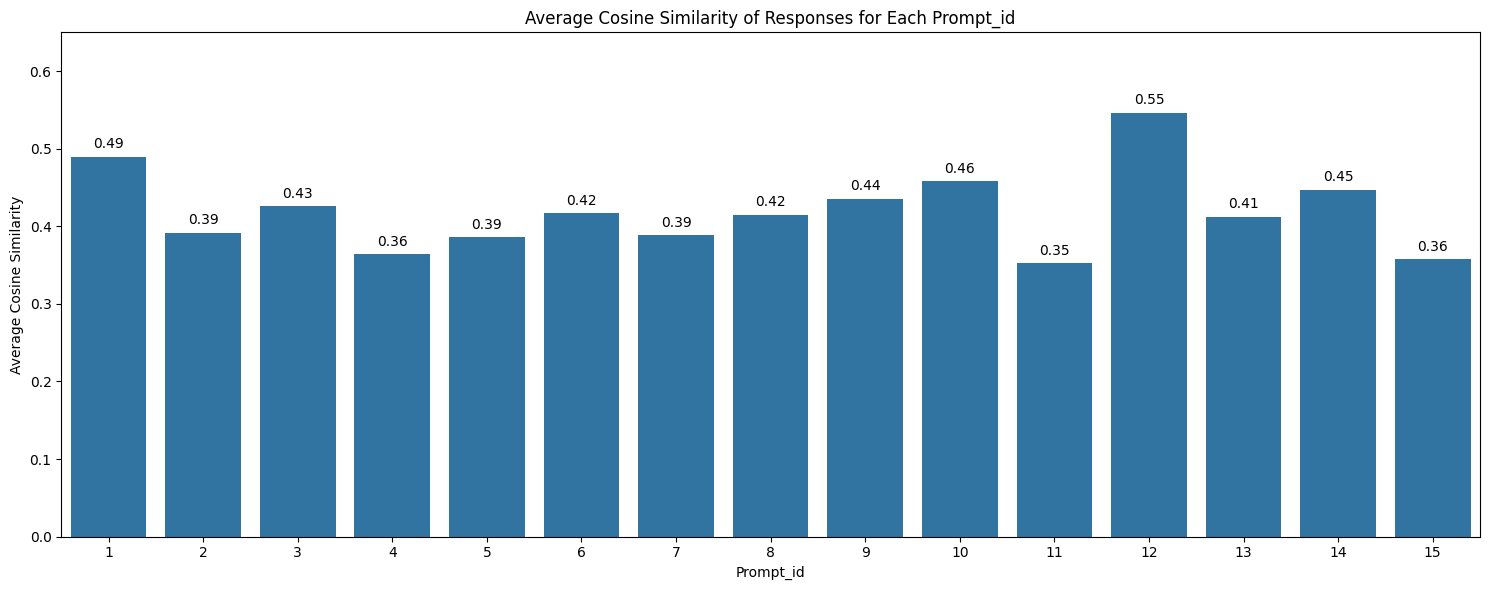

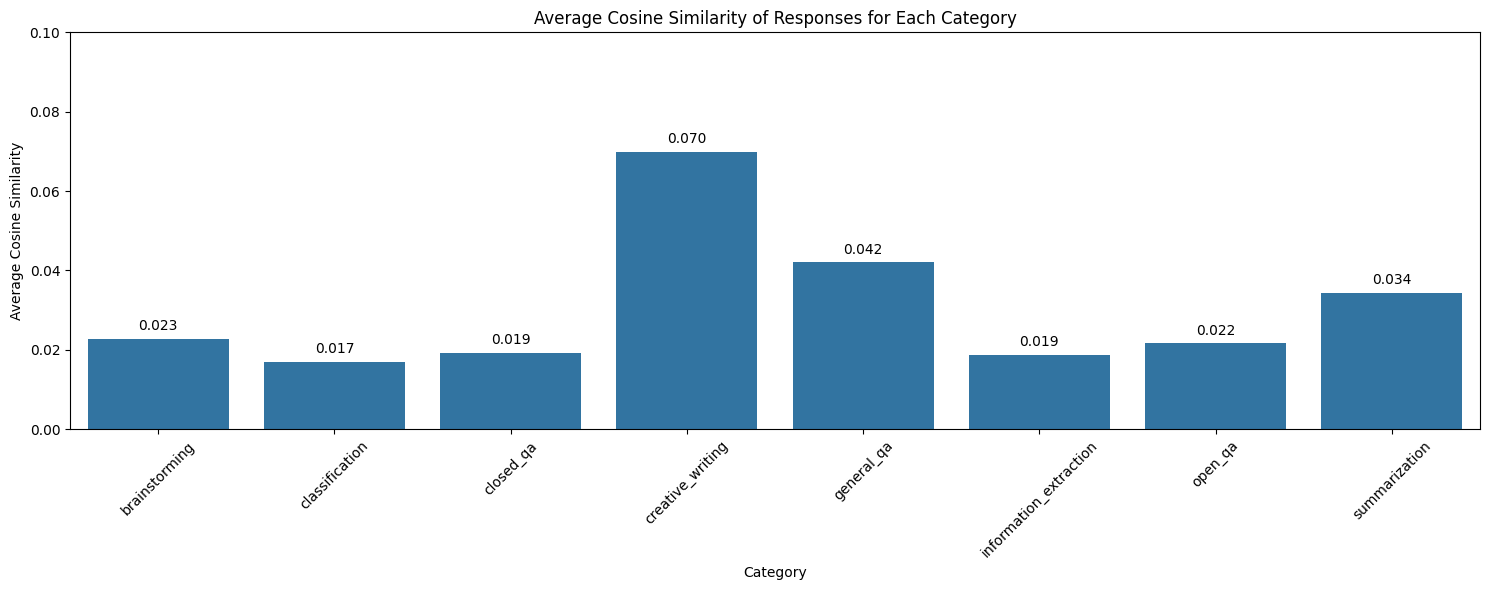

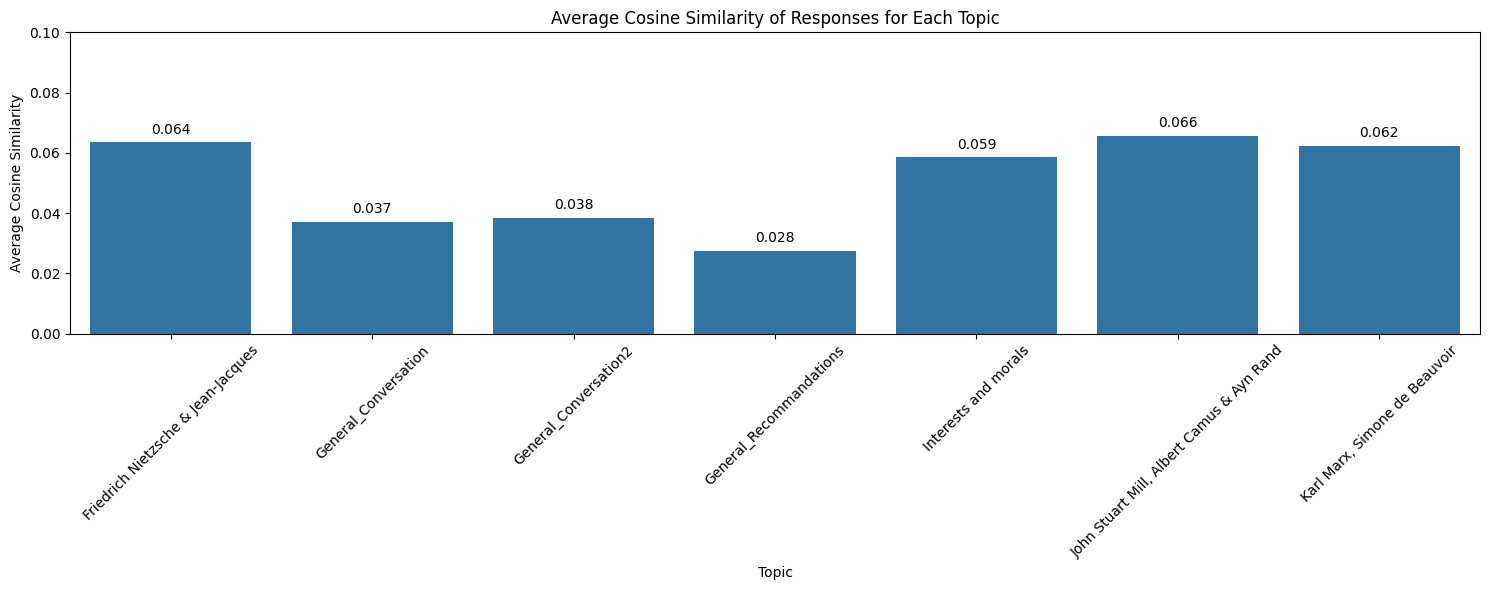

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def process_dataset_v2(df, id_column, text_column, y_max, decimal_places, rotate_xticks=True):
    def calculate_cosine_similarity(df, text_column):
        vectorizer = TfidfVectorizer().fit_transform(df[text_column])
        vectors = vectorizer.toarray()
        cosine_sim_matrix = cosine_similarity(vectors)
        return cosine_sim_matrix

    prompt_groups = df.groupby(id_column)
    cosine_similarities = {}

    for prompt, group in prompt_groups:
        if len(group) > 1:
            cosine_sim_matrix = calculate_cosine_similarity(group, text_column)
            avg_cosine_sim = np.mean([cosine_sim_matrix[i, j] for i in range(len(cosine_sim_matrix)) for j in range(i+1, len(cosine_sim_matrix))])
            cosine_similarities[prompt] = avg_cosine_sim

    if not cosine_similarities:
        print(f"No sufficient data for {id_column}")
        return

    cosine_similarities_df = pd.DataFrame(list(cosine_similarities.items()), columns=[id_column, 'average_cosine_similarity'])

    def extract_features(df, text_column):
        df['sentiment'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
        return df

    df = extract_features(df, text_column)

    sentiment_std = prompt_groups['sentiment'].std().reset_index().rename(columns={'sentiment': 'sentiment_std'})

    consistency_df = cosine_similarities_df.merge(sentiment_std, on=id_column)
    
    if id_column == 'prompt_id':
        cosine_similarities_df[id_column] = pd.to_numeric(cosine_similarities_df[id_column], errors='coerce')

    cosine_similarities_df = cosine_similarities_df.sort_values(by=id_column)

    plt.figure(figsize=(15, 6))
    ax = sns.barplot(data=cosine_similarities_df, x=id_column, y='average_cosine_similarity', order=cosine_similarities_df[id_column])
    plt.title(f'Average Cosine Similarity of Responses for Each {id_column.capitalize()}')
    plt.xlabel(id_column.capitalize())
    plt.ylabel('Average Cosine Similarity')
    plt.ylim(0, y_max)  # Dynamic y-axis limit
    
    if rotate_xticks:
        plt.xticks(rotation=45)
    else:
        plt.xticks(rotation=0)
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), f'.{decimal_places}f'),  # Use the specified decimal places
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    plt.tight_layout()
    plt.show()

# Process each dataset with appropriate y-axis limits and decimal places
process_dataset_v2(Essays, 'prompt_id', 'response', 0.65, 2, rotate_xticks=False)
process_dataset_v2(Dolly, 'category', 'response', 0.1, 3, rotate_xticks=True)
process_dataset_v2(PnR, 'topic', 'response', 0.1, 3, rotate_xticks=True)

### Topic Modeling

Topic: 0 
Words: 0.024*"albert" + 0.021*"examines" + 0.017*"marx" + 0.017*"meaningless" + 0.015*"labor" + 0.012*"technology" + 0.010*"workers" + 0.009*"capitalism" + 0.009*"stranger" + 0.008*"exploitation"
Topic: 1 
Words: 0.025*"literature" + 0.020*"works" + 0.018*"literary" + 0.016*"human" + 0.012*"power" + 0.011*"concept" + 0.011*"meaning" + 0.010*"relationship" + 0.010*"individual" + 0.010*"philosophical"
Topic: 2 
Words: 0.033*"readers" + 0.016*"others" + 0.012*"understanding" + 0.011*"empathy" + 0.011*"personal" + 0.011*"experiences" + 0.009*"person" + 0.009*"feelings" + 0.009*"different" + 0.008*"involves"
Topic: 3 
Words: 0.018*"explore" + 0.016*"history" + 0.016*"historical" + 0.014*"author" + 0.014*"reader" + 0.013*"text" + 0.013*"like" + 0.012*"orwell" + 0.011*"language" + 0.011*"friedrich"
Topic: 4 
Words: 0.015*"try" + 0.014*"time" + 0.011*"like" + 0.010*"also" + 0.009*"magical" + 0.009*"respectful" + 0.007*"help" + 0.006*"activities" + 0.006*"family" + 0.006*"practice"
To

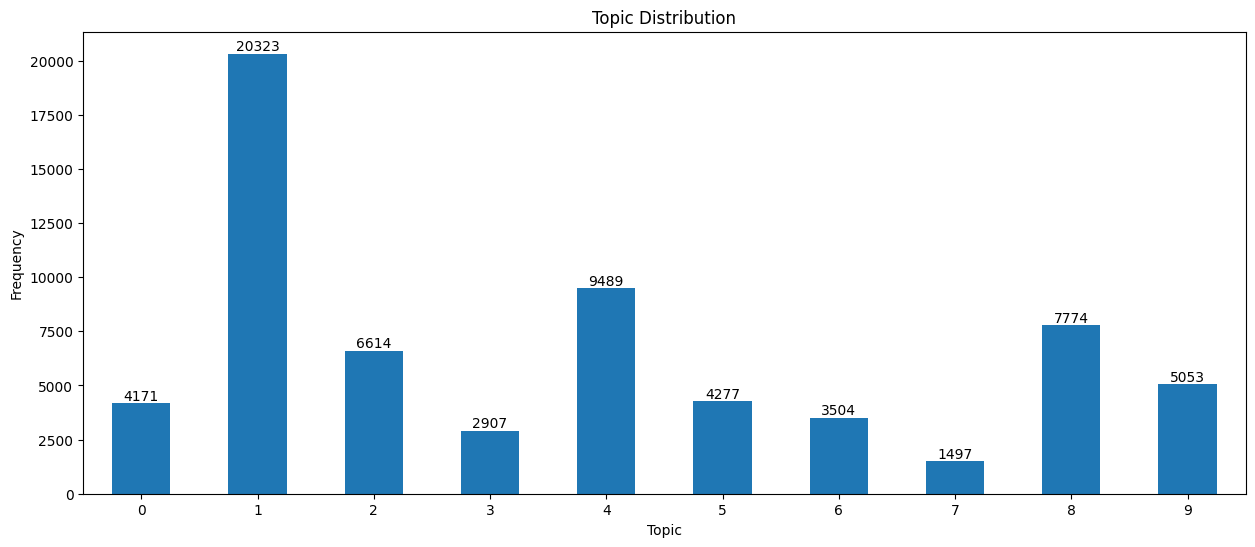

In [42]:
from gensim import corpora, models

# Preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stop words and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Apply preprocessing
combined_df['processed_response'] = combined_df['response'].apply(preprocess_text)

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(combined_df['processed_response'])
corpus = [dictionary.doc2bow(text) for text in combined_df['processed_response']]

# Build LDA Model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Print Topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic: {idx} \nWords: {topic}')

# Assign topics to responses
combined_df['topic'] = [max(lda_model[corpus[i]], key=lambda x: x[1])[0] for i in range(len(corpus))]

# Plot Topic Distribution
topic_distribution = combined_df['topic'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
bars = topic_distribution.plot(kind='bar')
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Add numbers on top of the bars
for bar in bars.containers:
    bars.bar_label(bar)

plt.show()


Topics for 1000 Essays:
Topic: 0 
Words: 0.035*"face" + 0.022*"mars" + 0.022*"natural" + 0.017*"evidence" + 0.010*"artificial" + 0.010*"geological" + 0.009*"features" + 0.008*"rather" + 0.008*"landform" + 0.008*"erosion"
Topic: 1 
Words: 0.045*"policy" + 0.035*"students" + 0.035*"phones" + 0.022*"school" + 0.017*"phone" + 0.013*"use" + 0.012*"cell" + 0.009*"ban" + 0.009*"believe" + 0.009*"class"
Topic: 2 
Words: 0.006*"middle" + 0.005*"farm" + 0.005*"truly" + 0.004*"new" + 0.004*"cattle" + 0.004*"cowboys" + 0.004*"experience" + 0.003*"work" + 0.003*"home" + 0.003*"australia"
Topic: 3 
Words: 0.016*"vote" + 0.013*"could" + 0.012*"popular" + 0.012*"cars" + 0.011*"states" + 0.011*"electoral" + 0.010*"driverless" + 0.010*"college" + 0.009*"system" + 0.009*"would"
Topic: 4 
Words: 0.028*"venus" + 0.020*"students" + 0.019*"could" + 0.012*"technology" + 0.011*"may" + 0.010*"facial" + 0.009*"teachers" + 0.009*"author" + 0.008*"earth" + 0.008*"also"
Topic: 5 
Words: 0.046*"students" + 0.016*"a

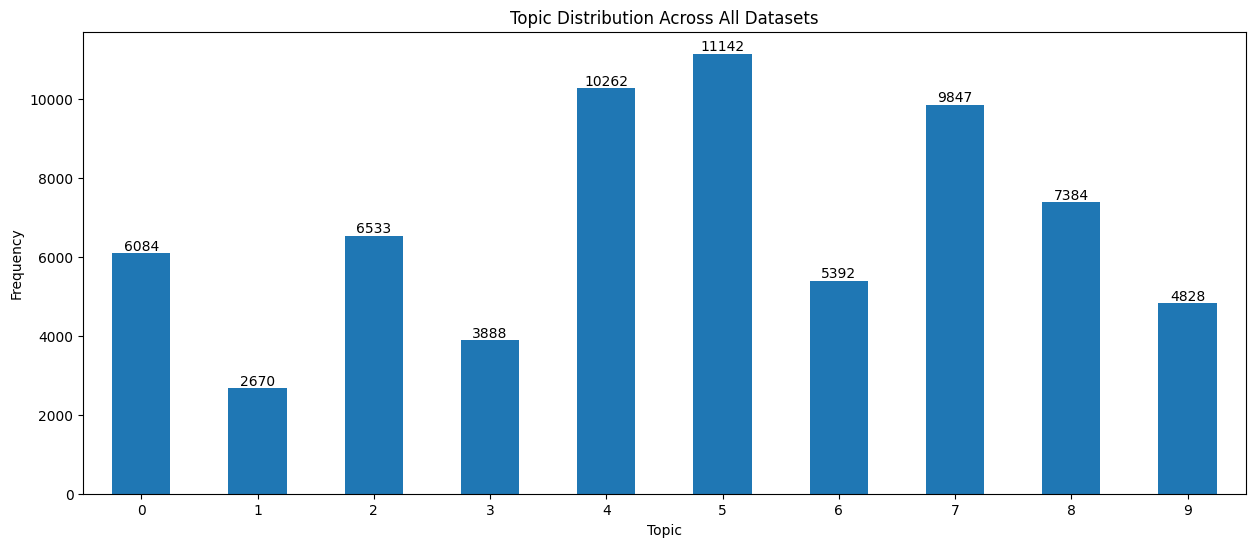

In [43]:
# Preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stop words and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Function to apply LDA and print topics
def apply_lda_and_print_topics(df, dataset_name):
    df['processed_response'] = df['response'].apply(preprocess_text)
    dictionary = corpora.Dictionary(df['processed_response'])
    corpus = [dictionary.doc2bow(text) for text in df['processed_response']]
    lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)
    print(f"\nTopics for {dataset_name}:")
    for idx, topic in lda_model.print_topics(-1):
        print(f'Topic: {idx} \nWords: {topic}')
    return lda_model, corpus

# Apply LDA to each dataset
lda_model_Essays, corpus_Essays = apply_lda_and_print_topics(Essays, "1000 Essays")
lda_model_Dolly, corpus_Dolly = apply_lda_and_print_topics(Dolly, "Dolly 15k")
lda_model_prompts, corpus_prompts = apply_lda_and_print_topics(PnR, "Prompts and Responses")
lda_model_DAIGT, corpus_DAIGT = apply_lda_and_print_topics(DAIGT, "DAIGT")

# Optionally: Combine all topics into one plot
combined_df = pd.concat([Essays, Dolly, PnR, DAIGT])
combined_df['topic'] = [max(lda_model_Essays[corpus_Essays[i]], key=lambda x: x[1])[0] for i in range(len(corpus_Essays))] + \
                       [max(lda_model_Dolly[corpus_Dolly[i]], key=lambda x: x[1])[0] for i in range(len(corpus_Dolly))] + \
                       [max(lda_model_prompts[corpus_prompts[i]], key=lambda x: x[1])[0] for i in range(len(corpus_prompts))] + \
                       [max(lda_model_DAIGT[corpus_DAIGT[i]], key=lambda x: x[1])[0] for i in range(len(corpus_DAIGT))]

# Plot Topic Distribution
topic_distribution = combined_df['topic'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
bars = topic_distribution.plot(kind='bar')
plt.title('Topic Distribution Across All Datasets')
plt.xlabel('Topic')
plt.ylabel('Frequency')
plt.xticks(rotation=0)


# Add numbers on top of the bars
for bar in bars.containers:
    bars.bar_label(bar)

plt.show()


Topics for 1000 Essays:
Topic: 0 
Words: 0.047*"students" + 0.018*"community" + 0.017*"service" + 0.015*"activities" + 0.014*"extracurricular" + 0.014*"participation" + 0.012*"time" + 0.012*"may" + 0.011*"could" + 0.009*"mandatory"
Topic: 1 
Words: 0.044*"students" + 0.022*"average" + 0.017*"activities" + 0.015*"b" + 0.013*"could" + 0.012*"important" + 0.012*"academic" + 0.012*"grades" + 0.011*"would" + 0.011*"sports"
Topic: 2 
Words: 0.027*"phone" + 0.026*"cell" + 0.022*"students" + 0.020*"use" + 0.020*"learning" + 0.015*"driving" + 0.015*"phones" + 0.012*"distance" + 0.011*"drivers" + 0.009*"road"
Topic: 3 
Words: 0.047*"students" + 0.026*"policy" + 0.022*"projects" + 0.020*"learning" + 0.016*"summer" + 0.015*"phones" + 0.012*"school" + 0.008*"work" + 0.008*"may" + 0.008*"could"
Topic: 4 
Words: 0.024*"one" + 0.017*"multiple" + 0.016*"person" + 0.016*"different" + 0.015*"choice" + 0.015*"advice" + 0.014*"decision" + 0.013*"may" + 0.012*"people" + 0.012*"opinions"
Topic: 5 
Words: 0.

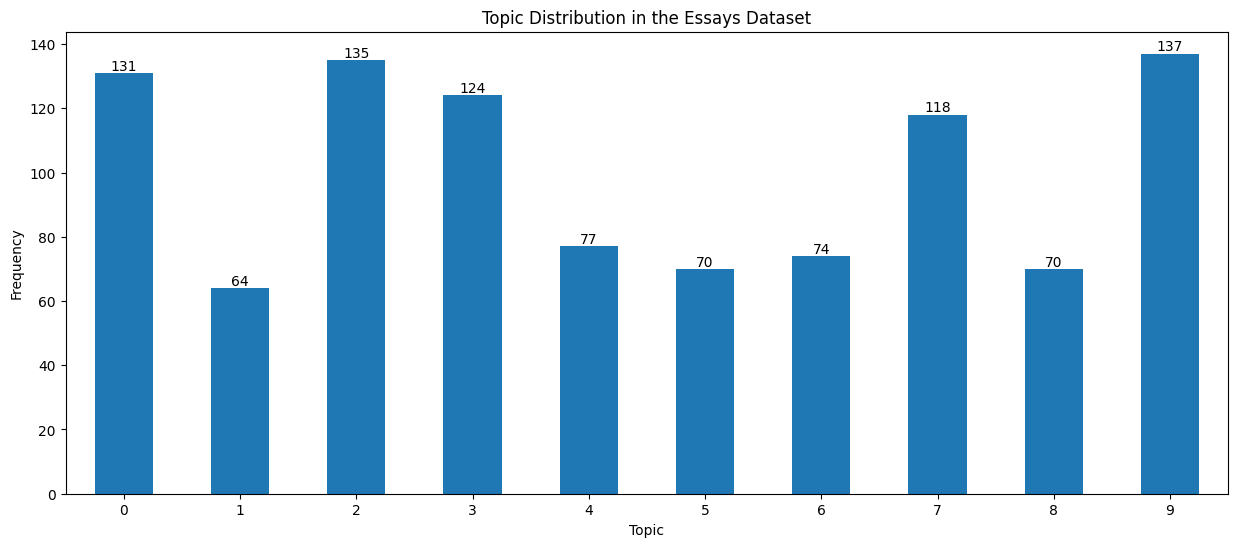

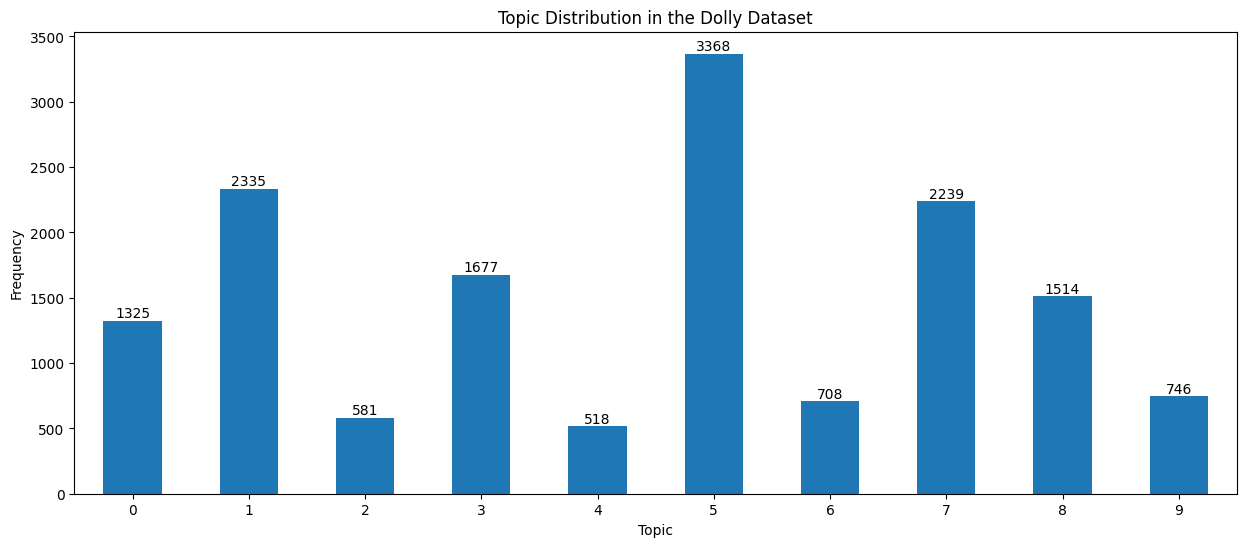

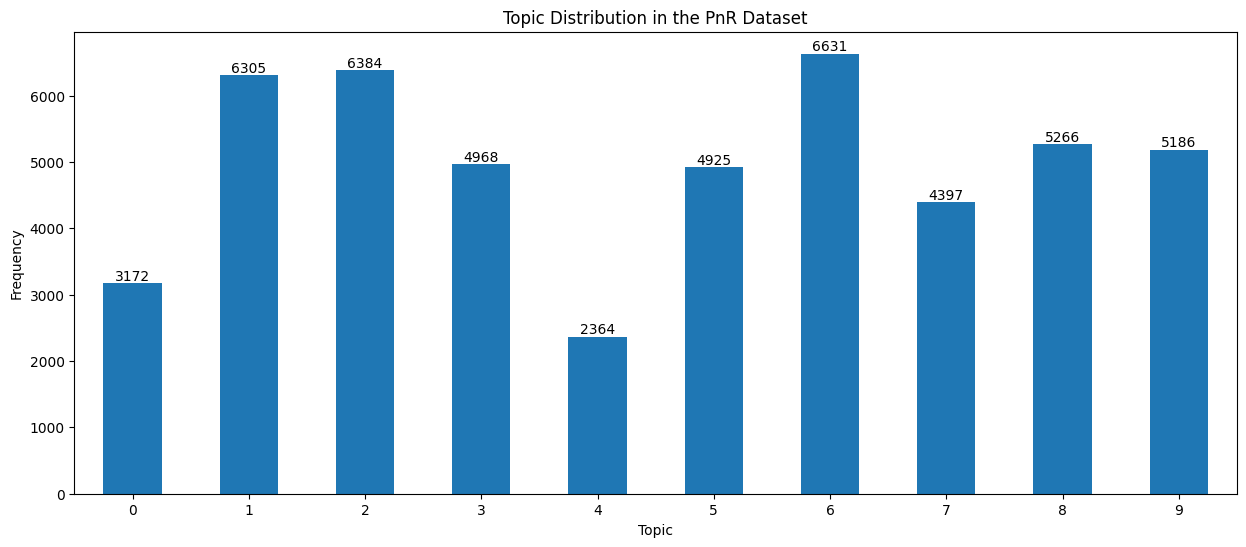

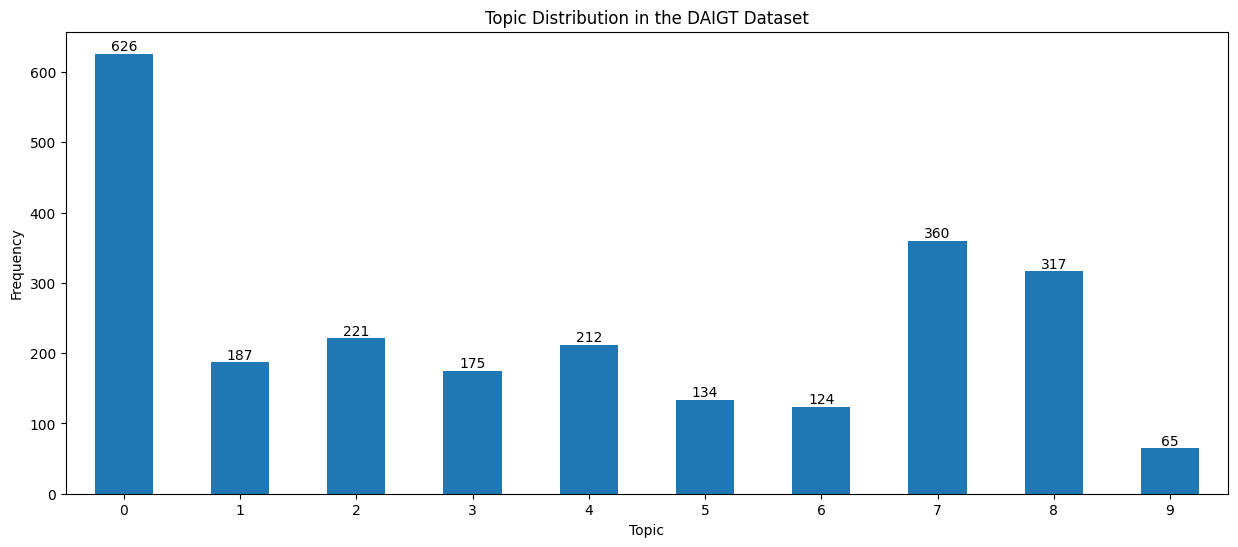

In [44]:
# Function to apply LDA and print topics
def apply_lda_and_print_topics(df, dataset_name):
    df['processed_response'] = df['response'].apply(preprocess_text)
    dictionary = corpora.Dictionary(df['processed_response'])
    corpus = [dictionary.doc2bow(text) for text in df['processed_response']]
    lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)
    print(f"\nTopics for {dataset_name}:")
    for idx, topic in lda_model.print_topics(-1):
        print(f'Topic: {idx} \nWords: {topic}')
    return lda_model, corpus

# Apply LDA to each dataset
lda_model_Essays, corpus_Essays = apply_lda_and_print_topics(Essays, "1000 Essays")
lda_model_Dolly, corpus_Dolly = apply_lda_and_print_topics(Dolly, "Dolly 15k")
lda_model_prompts, corpus_prompts = apply_lda_and_print_topics(PnR, "Prompts and Responses")
lda_model_DAIGT, corpus_DAIGT = apply_lda_and_print_topics(DAIGT, "DAIGT")

# Function to plot topic distribution
def plot_topic_distribution(lda_model, corpus, title):
    topics = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]
    topic_series = pd.Series(topics).value_counts().sort_index()
    plt.figure(figsize=(15, 6))
    bars = topic_series.plot(kind='bar')
    plt.title(title)
    plt.xlabel('Topic')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)


    # Add numbers on top of the bars
    for bar in bars.containers:
        bars.bar_label(bar)

    plt.show()

# Plot topic distribution for each dataset
plot_topic_distribution(lda_model_Essays, corpus_Essays, 'Topic Distribution in the Essays Dataset')
plot_topic_distribution(lda_model_Dolly, corpus_Dolly, 'Topic Distribution in the Dolly Dataset')
plot_topic_distribution(lda_model_prompts, corpus_prompts, 'Topic Distribution in the PnR Dataset')
plot_topic_distribution(lda_model_DAIGT, corpus_DAIGT, 'Topic Distribution in the DAIGT Dataset')

### Text Preprocessing

In [11]:
DollyClean = pd.read_csv("Dolly_15k.csv")
 
PnRClean = pd.read_csv("Prompt and Responses.csv")

EssaysClean = pd.read_csv("1000 Essays.csv")

DAIGTClean = pd.read_csv("DAIGT_external_dataset.csv")

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Applying preprocessing to the relevant columns in each dataset
EssaysClean['essay_title'] = EssaysClean['essay_title'].apply(preprocess_text)
EssaysClean['essay_text'] = EssaysClean['essay_text'].apply(preprocess_text)

DAIGTClean['instructions'] = DAIGTClean['instructions'].apply(preprocess_text)
DAIGTClean['source_text'] = DAIGTClean['source_text'].apply(preprocess_text)

DollyClean['instruction'] = DollyClean['instruction'].apply(preprocess_text)
DollyClean['response'] = DollyClean['response'].apply(preprocess_text)

PnRClean['Input'] = PnRClean['Input'].apply(preprocess_text)
PnRClean['Output'] = PnRClean['Output'].apply(preprocess_text)

### Clean Comparative Analysis of LLMs

#### Length, Readability, Sentiment, TTR

In [12]:
def clean_data(df, text_column):
    df = df.dropna(subset=[text_column])
    df[text_column] = df[text_column].astype(str)
    return df

In [13]:
EssaysClean = clean_data(EssaysClean, 'essay_text')
DAIGTClean = clean_data(DAIGTClean, 'source_text')
DollyClean = clean_data(DollyClean, 'response')
PnRClean = clean_data(PnRClean, 'Output')

In [14]:
# Feature Extraction Function
def extract_features(df, text_column):
    df['length'] = df[text_column].apply(len)
    df['readability'] = df[text_column].apply(textstat.flesch_kincaid_grade)
    df['sentiment'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    return df

In [15]:
# Extract features
EssaysClean = extract_features(EssaysClean, 'essay_text')
DAIGTClean = extract_features(DAIGTClean, 'source_text')
DollyClean = extract_features(DollyClean, 'response')
PnRClean = extract_features(PnRClean, 'Output')

In [16]:
def calculate_ttr(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return len(set(words)) / len(words)

# Function to add lexical diversity (TTR) to the DataFrame
def add_lexical_diversity(df, text_column):
    df['ttr'] = df[text_column].apply(calculate_ttr)
    return df

# Adding lexical diversity
EssaysClean = add_lexical_diversity(EssaysClean, 'essay_text')
DAIGTClean = add_lexical_diversity(DAIGTClean, 'source_text')
DollyClean = add_lexical_diversity(DollyClean, 'response')
PnRClean = add_lexical_diversity(PnRClean, 'Output')

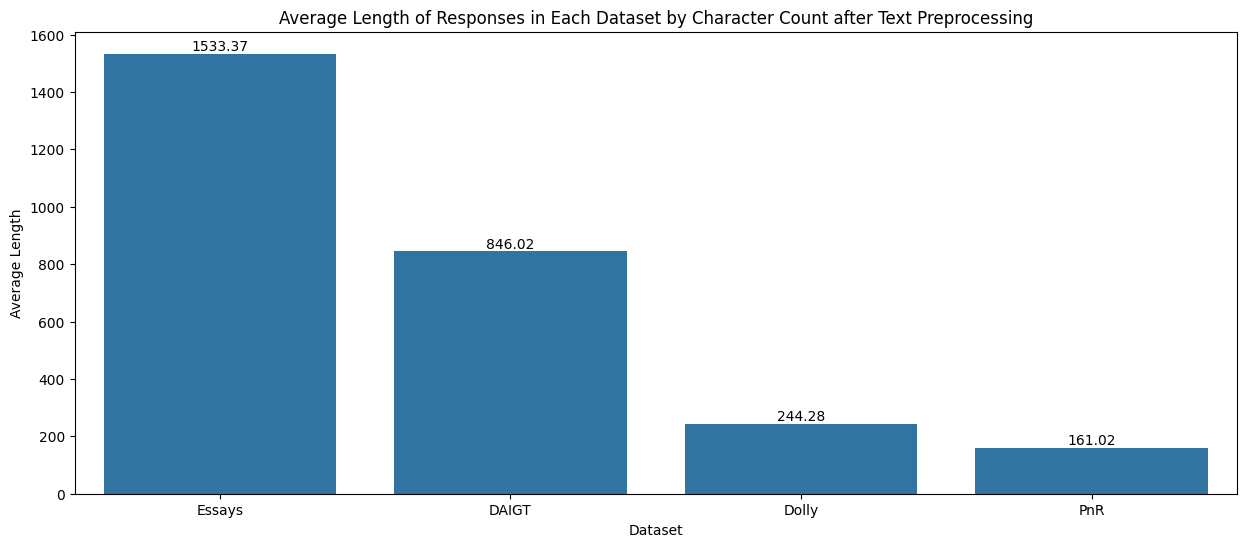

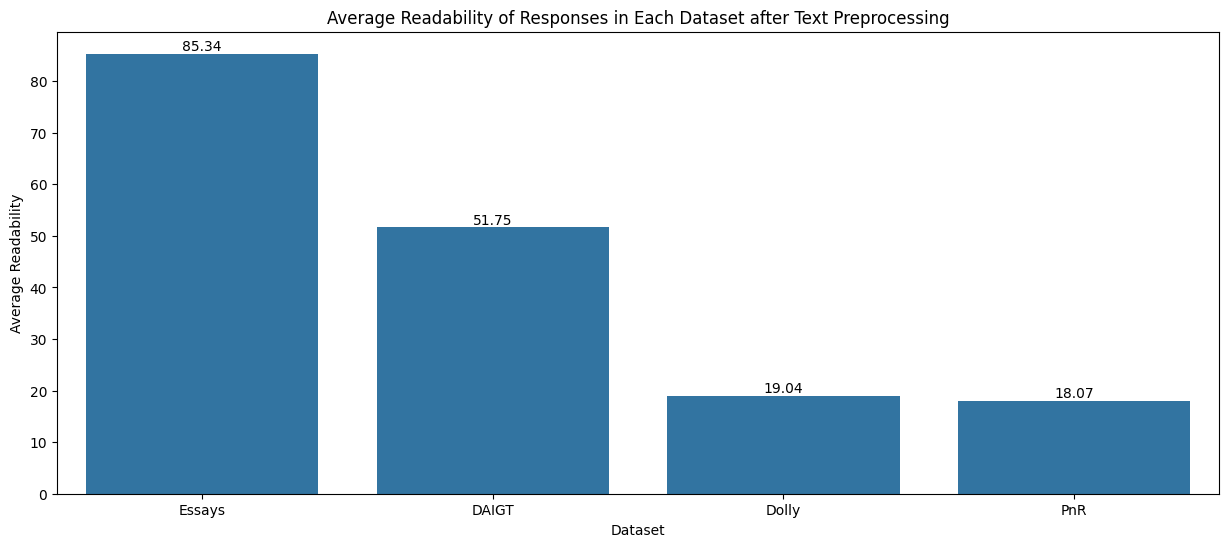

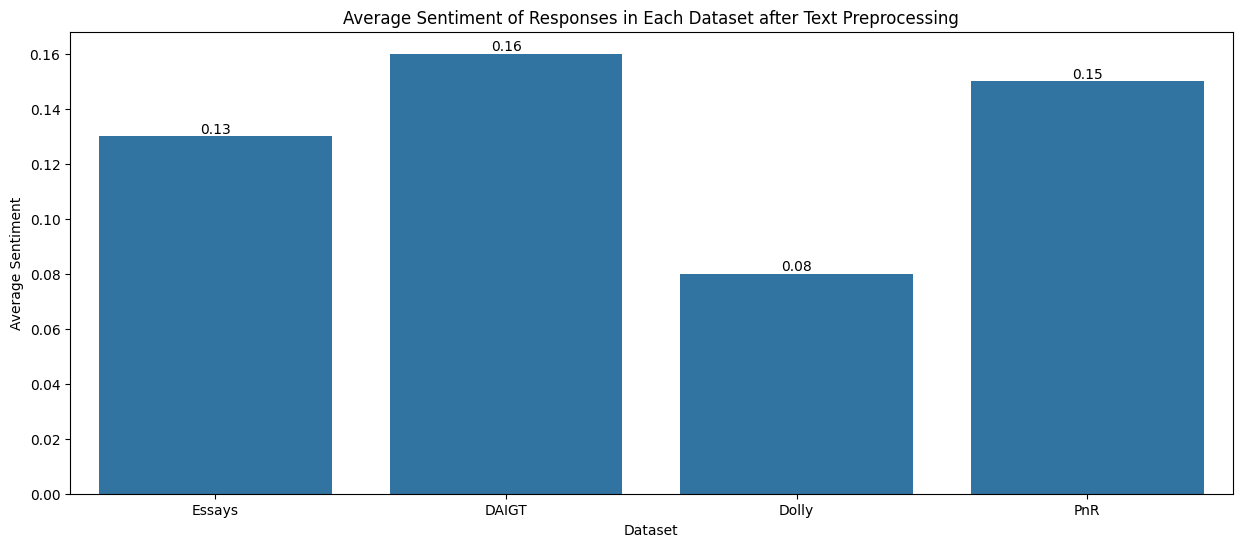

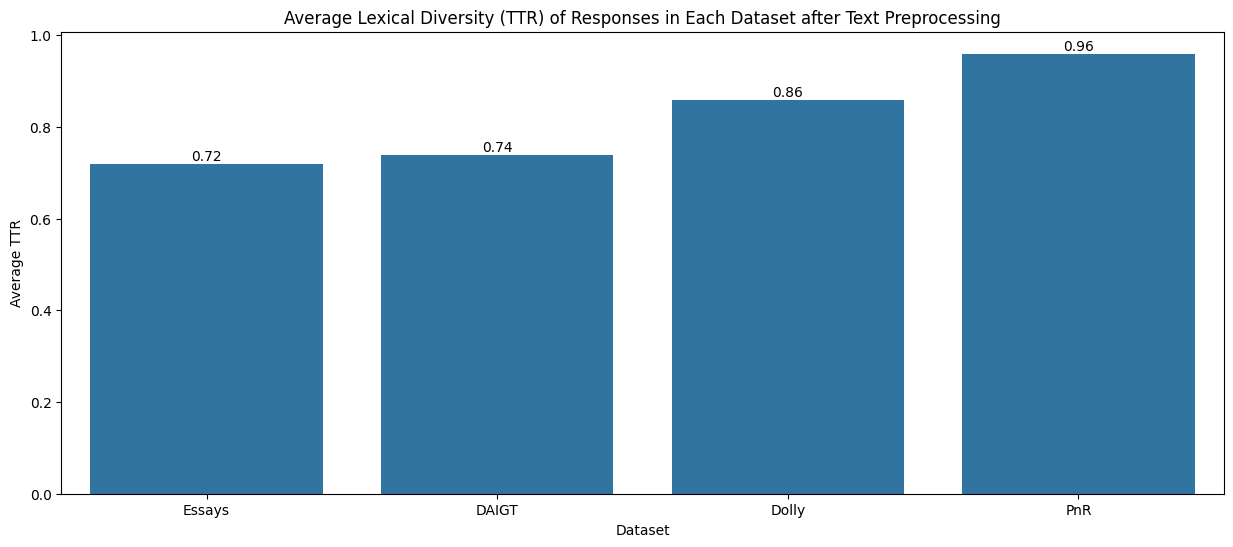

In [18]:
# Function to summarize and visualize the data
def summarize_and_visualize(*dataframes):
    summary = []
    for df, name in dataframes:
        avg_length = df['length'].mean()
        avg_readability = df['readability'].mean()
        avg_sentiment = df['sentiment'].mean()
        avg_ttr = df['ttr'].mean()
        summary.append([name, avg_length, avg_readability, avg_sentiment, avg_ttr])

    summary_df = pd.DataFrame(summary, columns=['Dataset', 'Average Length', 'Average Readability', 'Average Sentiment', 'Average TTR'])
    # Round the summary_df to 2 decimal places
    summary_df = summary_df.round(2)

# Plotting the separate graphs
    fig, ax = plt.subplots(figsize=(15, 6))
    ax = sns.barplot(x='Dataset', y='Average Length', data=summary_df)
    ax.set_title('Average Length of Responses in Each Dataset by Character Count after Text Preprocessing')
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

    fig, ax = plt.subplots(figsize=(15, 6))
    ax = sns.barplot(x='Dataset', y='Average Readability', data=summary_df)
    ax.set_title('Average Readability of Responses in Each Dataset after Text Preprocessing')
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

    fig, ax = plt.subplots(figsize=(15, 6))
    ax = sns.barplot(x='Dataset', y='Average Sentiment', data=summary_df)
    ax.set_title('Average Sentiment of Responses in Each Dataset after Text Preprocessing')
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()

    fig, ax = plt.subplots(figsize=(15, 6))
    ax = sns.barplot(x='Dataset', y='Average TTR', data=summary_df)
    ax.set_title('Average Lexical Diversity (TTR) of Responses in Each Dataset after Text Preprocessing')
    for container in ax.containers:
        ax.bar_label(container)
    plt.show()
    
    return summary_df

# Summarize and visualize
summary_df = summarize_and_visualize(
    (EssaysClean, 'Essays'),
    (DAIGTClean, 'DAIGT'),
    (DollyClean, 'Dolly'),
    (PnRClean, 'PnR')
)

### Clean Quality Assessment

In [98]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer

# Function to calculate BLEU and ROUGE scores
def calculate_scores(reference_texts, generated_texts):
    bleu_scores = []
    rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    for ref, gen in zip(reference_texts, generated_texts):
        # Tokenize the texts for BLEU score calculation
        ref_tokens = [nltk.word_tokenize(ref)]
        gen_tokens = nltk.word_tokenize(gen)

        # Calculate BLEU score
        bleu_score = sentence_bleu(ref_tokens, gen_tokens)
        bleu_scores.append(bleu_score)

        # Calculate ROUGE scores
        rouge_score = scorer.score(ref, gen)
        rouge_scores['rouge1'].append(rouge_score['rouge1'].fmeasure)
        rouge_scores['rouge2'].append(rouge_score['rouge2'].fmeasure)
        rouge_scores['rougeL'].append(rouge_score['rougeL'].fmeasure)

    return bleu_scores, rouge_scores

# Mapping of original topic names to abbreviated forms
topic_mapping = {
    "Friedrich Nietzsche & Jean-Jacques": "FN & JJ",
    "General_Conversation": "Gen_Conv",
    "General_Conversation2": "Gen_Conv2",
    "General_Recommandations": "Gen_Recom",
    "Interests and morals": "Int_Morals",
    "John Stuart Mill, Albert Camus & Ayn Rand": "Mill, Camus & Rand",
    "Karl Marx, Simone de Beauvoir": "Marx & de Beauvoir"
}

# Processing for Essays Dataset
reference_texts_Essays = EssaysClean['essay_title']  # Assuming 'essay_title' column contains the reference texts
generated_texts_Essays = EssaysClean['essay_text']  # Assuming 'essay_text' column contains the generated texts
topics_Essays = EssaysClean['prompt_id']  # Assuming 'prompt_id' column contains the topics

bleu_scores_Essays, rouge_scores_Essays = calculate_scores(reference_texts_Essays, generated_texts_Essays)
EssaysClean['BLEU'] = pd.to_numeric(bleu_scores_Essays).round(2)
EssaysClean['ROUGE-1'] = pd.to_numeric(rouge_scores_Essays['rouge1']).round(2)
EssaysClean['ROUGE-2'] = pd.to_numeric(rouge_scores_Essays['rouge2']).round(2)
EssaysClean['ROUGE-L'] = pd.to_numeric(rouge_scores_Essays['rougeL']).round(2)

average_scores_Essays = EssaysClean.groupby('prompt_id').mean(numeric_only=True)[['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']].round(2)

# Processing for Dolly Dataset
reference_texts_Dolly = DollyClean['instruction']  # Assuming 'instruction' column contains the reference texts
generated_texts_Dolly = DollyClean['response']  # Assuming 'response' column contains the generated texts
topics_Dolly = DollyClean['category']  # Assuming 'category' column contains the topics

bleu_scores_Dolly, rouge_scores_Dolly = calculate_scores(reference_texts_Dolly, generated_texts_Dolly)
DollyClean['BLEU'] = pd.to_numeric(bleu_scores_Dolly).round(2)
DollyClean['ROUGE-1'] = pd.to_numeric(rouge_scores_Dolly['rouge1']).round(2)
DollyClean['ROUGE-2'] = pd.to_numeric(rouge_scores_Dolly['rouge2']).round(2)
DollyClean['ROUGE-L'] = pd.to_numeric(rouge_scores_Dolly['rougeL']).round(2)

average_scores_Dolly = DollyClean.groupby('category').mean(numeric_only=True)[['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']].round(2)

# Processing for Prompts & Responses Dataset
reference_texts_prompts = PnRClean['Input']  # Assuming 'Input' column contains the reference texts
generated_texts_prompts = PnRClean['Output']  # Assuming 'Output' column contains the generated texts
topics_prompts = PnRClean['topic']  # Assuming 'topic' column contains the topics

# Apply topic name mapping
PnRClean['short_topic'] = PnRClean['topic'].map(topic_mapping).fillna(PnRClean['topic'])

bleu_scores_prompts, rouge_scores_prompts = calculate_scores(reference_texts_prompts, generated_texts_prompts)
PnRClean['BLEU'] = pd.to_numeric(bleu_scores_prompts).round(2)
PnRClean['ROUGE-1'] = pd.to_numeric(rouge_scores_prompts['rouge1']).round(2)
PnRClean['ROUGE-2'] = pd.to_numeric(rouge_scores_prompts['rouge2']).round(2)
PnRClean['ROUGE-L'] = pd.to_numeric(rouge_scores_prompts['rougeL']).round(2)

average_scores_prompts = PnRClean.groupby('short_topic').mean(numeric_only=True)[['BLEU', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L']].round(2)

c:\Users\Zeyd Ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\Zeyd Ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\Zeyd Ali\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlap

<Figure size 1500x600 with 0 Axes>

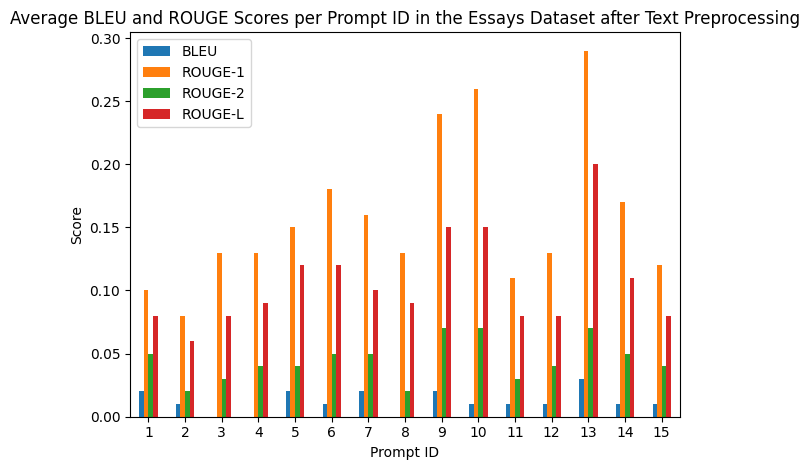

<Figure size 1500x600 with 0 Axes>

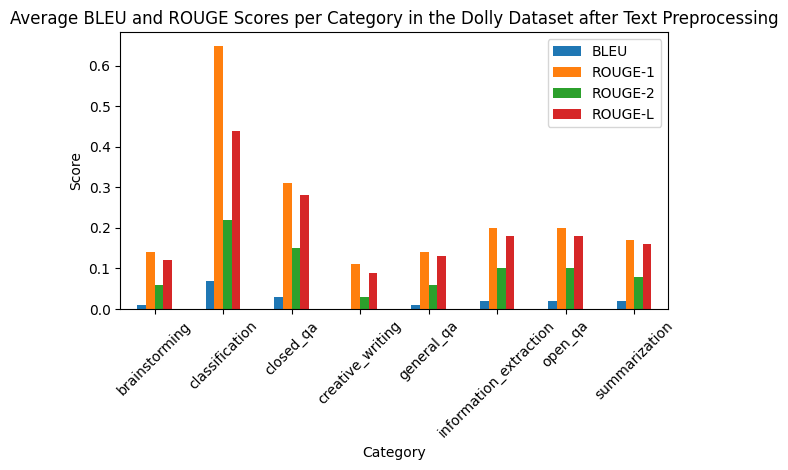

<Figure size 1500x600 with 0 Axes>

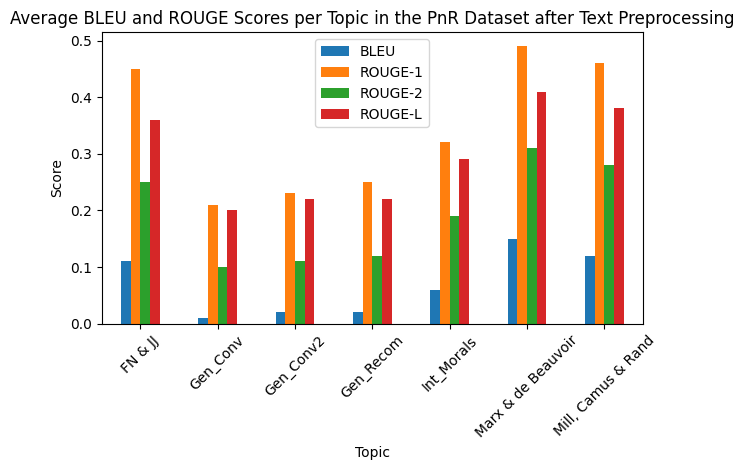

In [99]:
# Visualize the results
# Plot for Essays Dataset
plt.figure(figsize=(15, 6))
average_scores_Essays.plot(kind='bar')
plt.title('Average BLEU and ROUGE Scores per Prompt ID in the Essays Dataset after Text Preprocessing')
plt.xlabel('Prompt ID')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot for Dolly Dataset
plt.figure(figsize=(15, 6))
average_scores_Dolly.plot(kind='bar')
plt.title('Average BLEU and ROUGE Scores per Category in the Dolly Dataset after Text Preprocessing')
plt.xlabel('Category')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot for Prompts & Responses Dataset
plt.figure(figsize=(15, 6))
average_scores_prompts.plot(kind='bar')
plt.title('Average BLEU and ROUGE Scores per Topic in the PnR Dataset after Text Preprocessing')
plt.xlabel('Topic')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [100]:
print(average_scores_Essays)

           BLEU  ROUGE-1  ROUGE-2  ROUGE-L
prompt_id                                 
1          0.02     0.10     0.05     0.08
2          0.01     0.08     0.02     0.06
3          0.00     0.13     0.03     0.08
4          0.00     0.13     0.04     0.09
5          0.02     0.15     0.04     0.12
6          0.01     0.18     0.05     0.12
7          0.02     0.16     0.05     0.10
8          0.00     0.13     0.02     0.09
9          0.02     0.24     0.07     0.15
10         0.01     0.26     0.07     0.15
11         0.01     0.11     0.03     0.08
12         0.01     0.13     0.04     0.08
13         0.03     0.29     0.07     0.20
14         0.01     0.17     0.05     0.11
15         0.01     0.12     0.04     0.08


In [101]:
print(average_scores_Dolly)

                        BLEU  ROUGE-1  ROUGE-2  ROUGE-L
category                                               
brainstorming           0.01     0.14     0.06     0.12
classification          0.07     0.65     0.22     0.44
closed_qa               0.03     0.31     0.15     0.28
creative_writing        0.00     0.11     0.03     0.09
general_qa              0.01     0.14     0.06     0.13
information_extraction  0.02     0.20     0.10     0.18
open_qa                 0.02     0.20     0.10     0.18
summarization           0.02     0.17     0.08     0.16


In [102]:
print(average_scores_prompts)

                    BLEU  ROUGE-1  ROUGE-2  ROUGE-L
short_topic                                        
FN & JJ             0.11     0.45     0.25     0.36
Gen_Conv            0.01     0.21     0.10     0.20
Gen_Conv2           0.02     0.23     0.11     0.22
Gen_Recom           0.02     0.25     0.12     0.22
Int_Morals          0.06     0.32     0.19     0.29
Marx & de Beauvoir  0.15     0.49     0.31     0.41
Mill, Camus & Rand  0.12     0.46     0.28     0.38


### Clean Prompt Analysis

#### Prompt Categories 

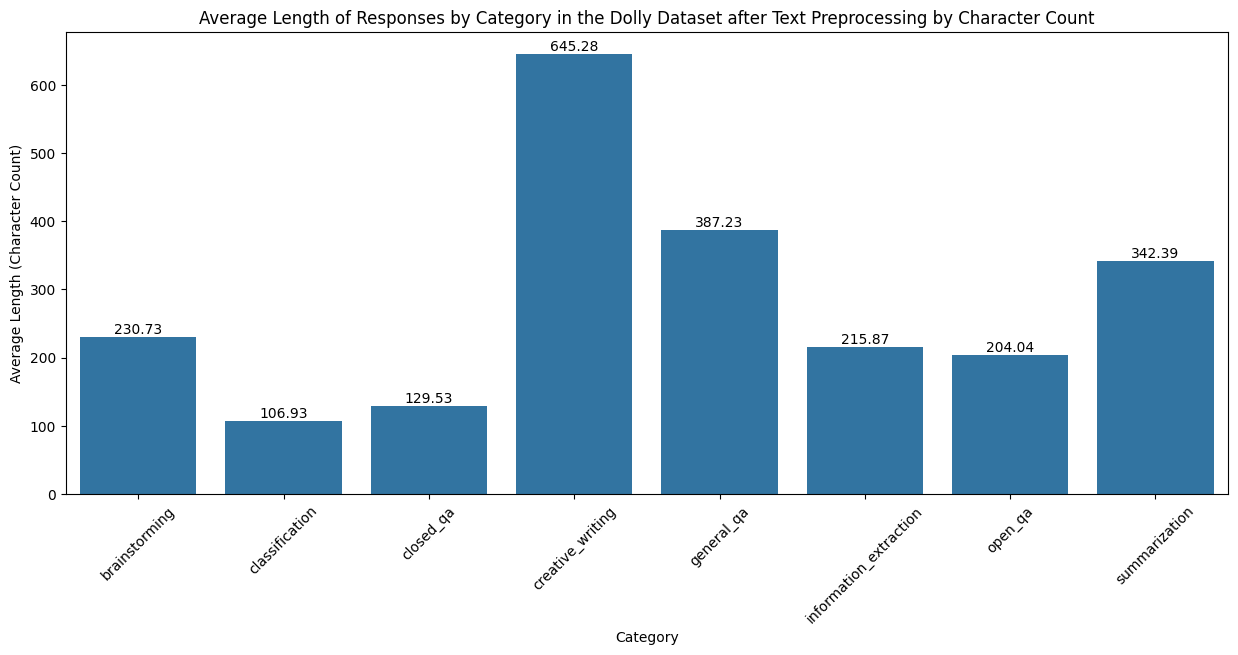

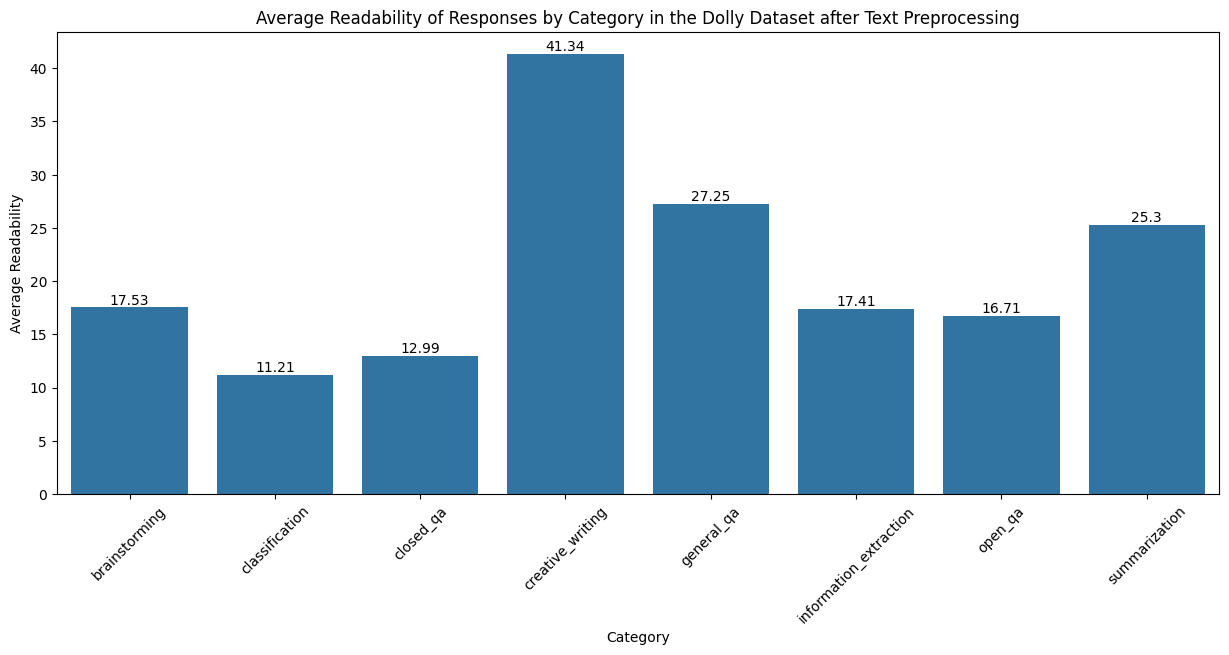

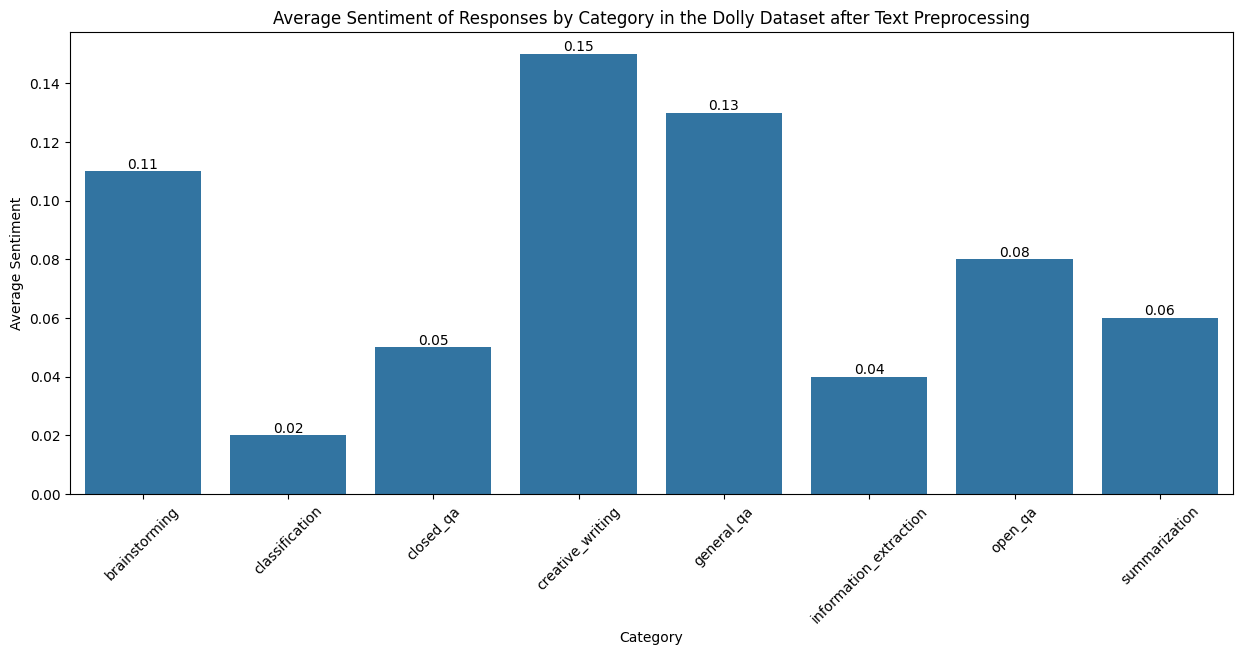

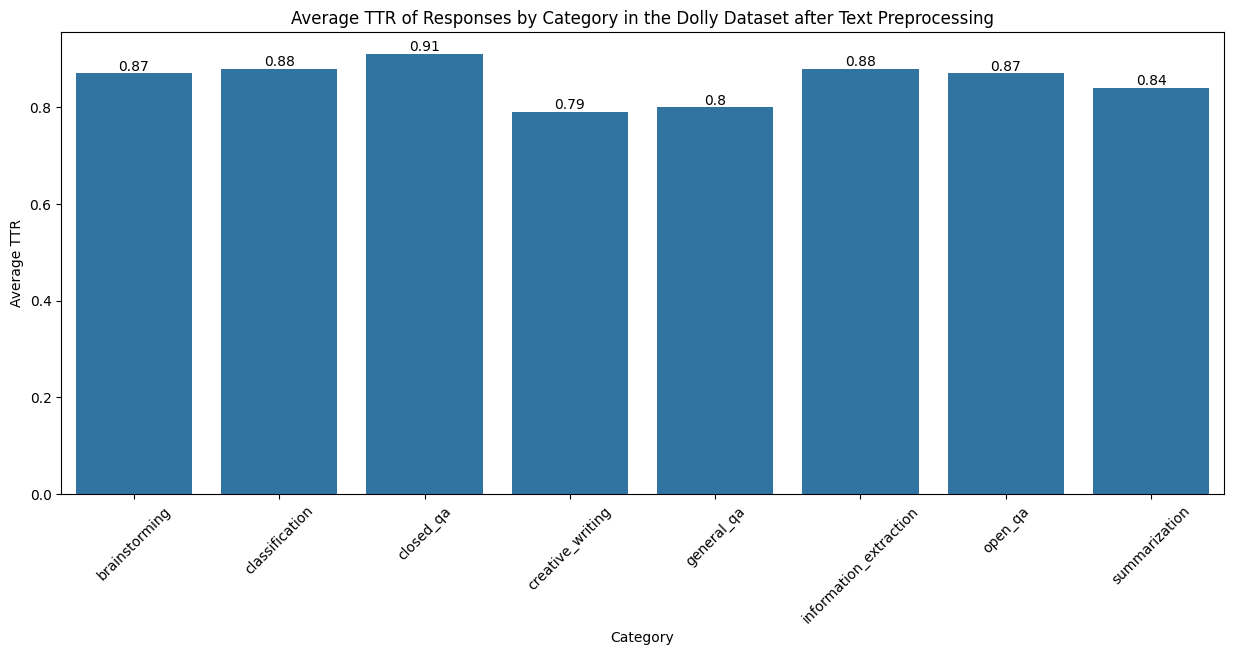

In [26]:
# Ensure columns are numeric
def convert_columns_to_numeric(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df 

# Convert relevant columns to numeric
DollyClean = convert_columns_to_numeric(DollyClean, ['length', 'readability', 'sentiment'])
PnRClean = convert_columns_to_numeric(PnRClean, ['length', 'readability', 'sentiment'])
EssaysClean = convert_columns_to_numeric(EssaysClean, ['length', 'readability', 'sentiment'])
DAIGTClean = convert_columns_to_numeric(DAIGTClean, ['length', 'readability', 'sentiment'])

# Function to calculate TTR
def calculate_ttr(text):
    tokens = text.split()
    unique_tokens = set(tokens)
    return len(unique_tokens) / len(tokens) if tokens else 0

# Prompt Categories Analysis
def analyze_prompt_categories(df, text_column, category_column):
    df[category_column] = df[category_column].astype(str)
    df['TTR'] = df[text_column].apply(calculate_ttr)
    category_summary = df.groupby(category_column).agg({
        text_column: 'count',
        'length': 'mean',
        'readability': 'mean',
        'sentiment': 'mean',
        'TTR': 'mean'
    }).reset_index()
    category_summary = category_summary.round(2)
    return category_summary

Dolly_category_summary = analyze_prompt_categories(DollyClean, 'response', 'category')
PnR_summary = analyze_prompt_categories(PnRClean, 'Output', 'topic')
Essays_summary = analyze_prompt_categories(EssaysClean, 'essay_text', 'prompt_id')

# Convert prompt_id to numeric and sort by prompt_id
Essays_summary['prompt_id'] = pd.to_numeric(Essays_summary['prompt_id'])
Essays_summary = Essays_summary.sort_values('prompt_id')

# Visualization for Average Length
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Dolly_category_summary, x='category', y='length')
plt.title('Average Length of Responses by Category in the Dolly Dataset after Text Preprocessing by Character Count')
plt.xlabel('Category')
plt.ylabel('Average Length (Character Count)')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average Readability
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Dolly_category_summary, x='category', y='readability')
plt.title('Average Readability of Responses by Category in the Dolly Dataset after Text Preprocessing')
plt.xlabel('Category')
plt.ylabel('Average Readability')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average Sentiment
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Dolly_category_summary, x='category', y='sentiment')
plt.title('Average Sentiment of Responses by Category in the Dolly Dataset after Text Preprocessing')
plt.xlabel('Category')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average TTR
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Dolly_category_summary, x='category', y='TTR')
plt.title('Average TTR of Responses by Category in the Dolly Dataset after Text Preprocessing')
plt.xlabel('Category')
plt.ylabel('Average TTR')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

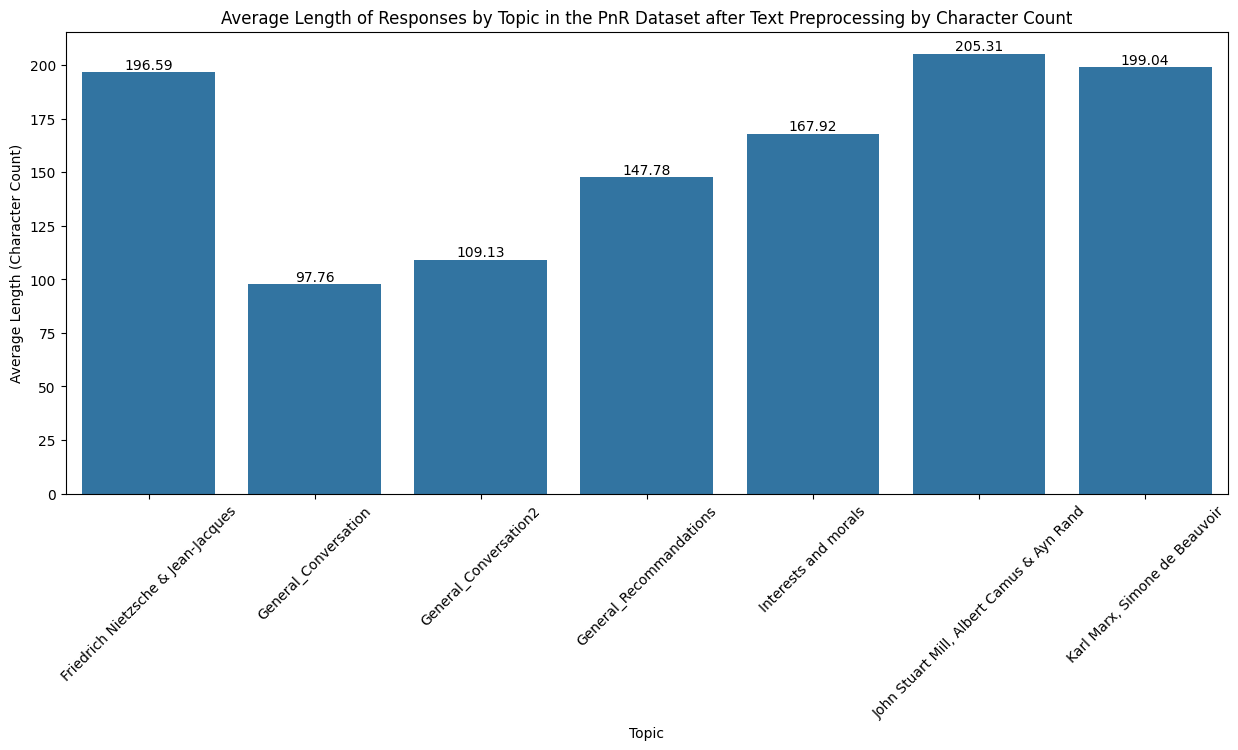

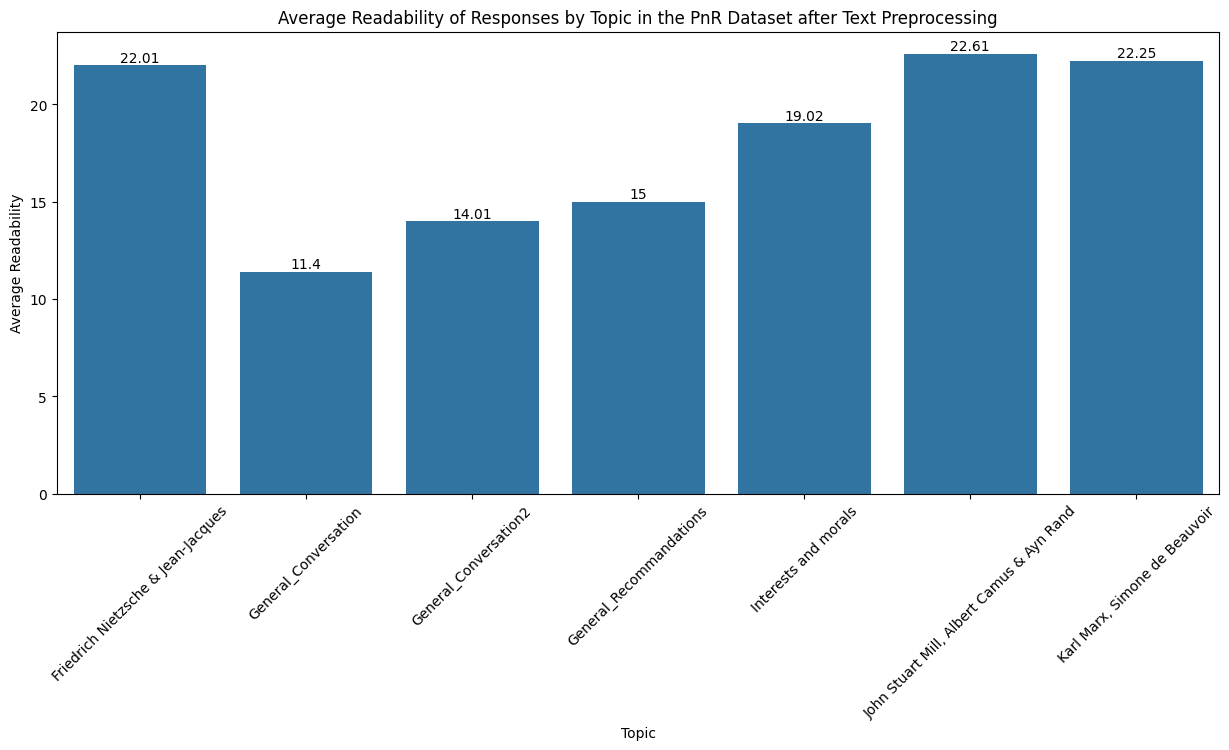

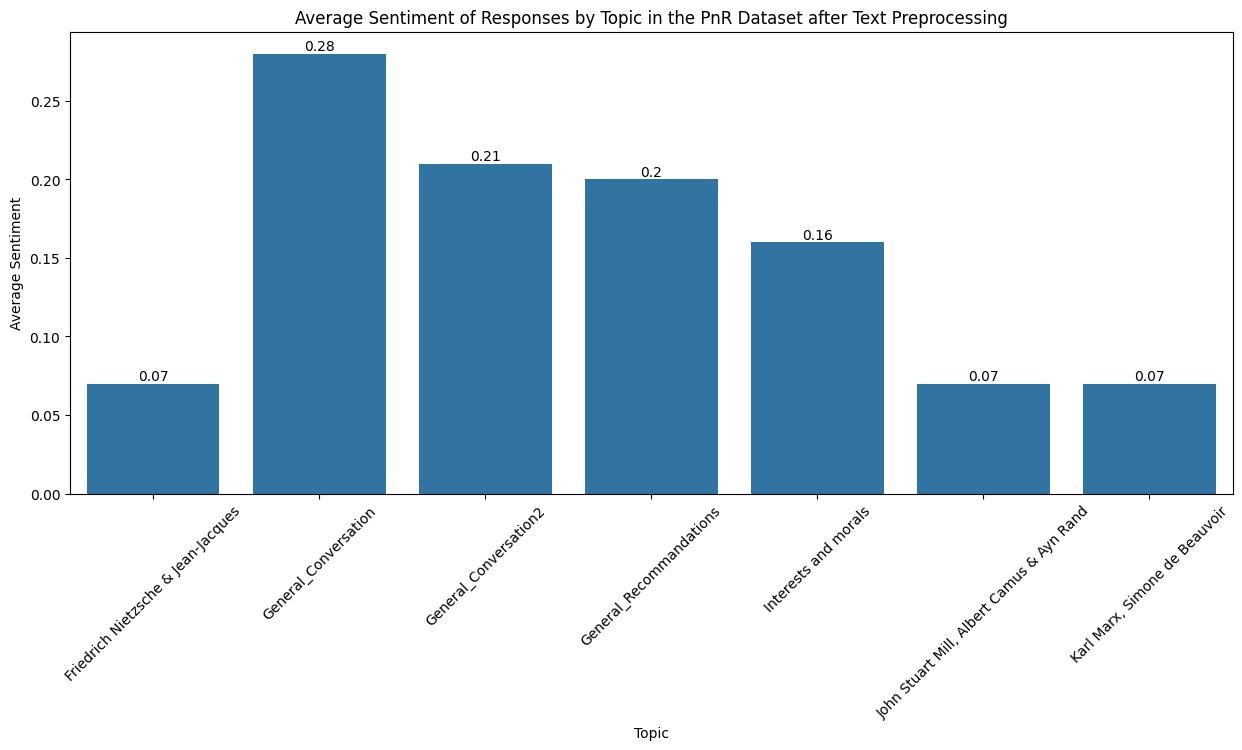

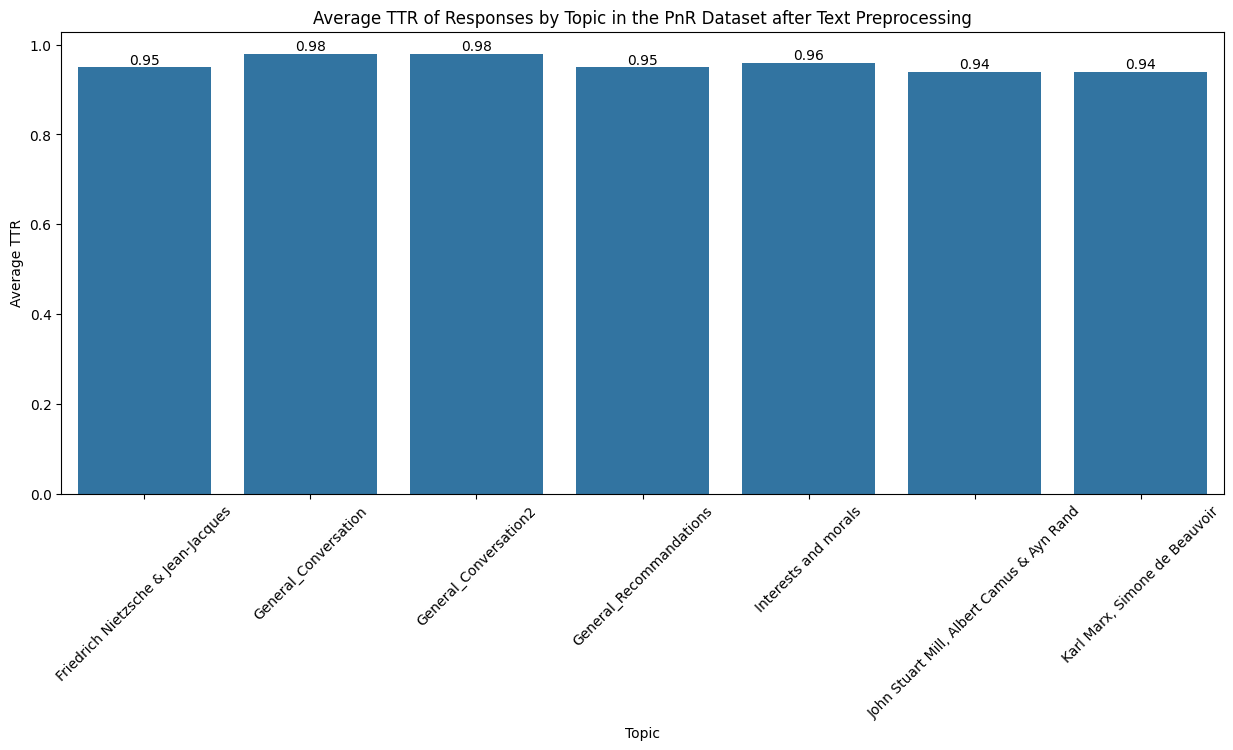

In [27]:
# Visualization for Average Length
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=PnR_summary, x='topic', y='length')
plt.title('Average Length of Responses by Topic in the PnR Dataset after Text Preprocessing by Character Count')
plt.xlabel('Topic')
plt.ylabel('Average Length (Character Count)')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average Readability
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=PnR_summary, x='topic', y='readability')
plt.title('Average Readability of Responses by Topic in the PnR Dataset after Text Preprocessing')
plt.xlabel('Topic')
plt.ylabel('Average Readability')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average Sentiment
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=PnR_summary, x='topic', y='sentiment')
plt.title('Average Sentiment of Responses by Topic in the PnR Dataset after Text Preprocessing')
plt.xlabel('Topic')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average TTR
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=PnR_summary, x='topic', y='TTR')
plt.title('Average TTR of Responses by Topic in the PnR Dataset after Text Preprocessing')
plt.xlabel('Topic')
plt.ylabel('Average TTR')
plt.xticks(rotation=45)
for container in ax.containers:
    ax.bar_label(container)
plt.show()


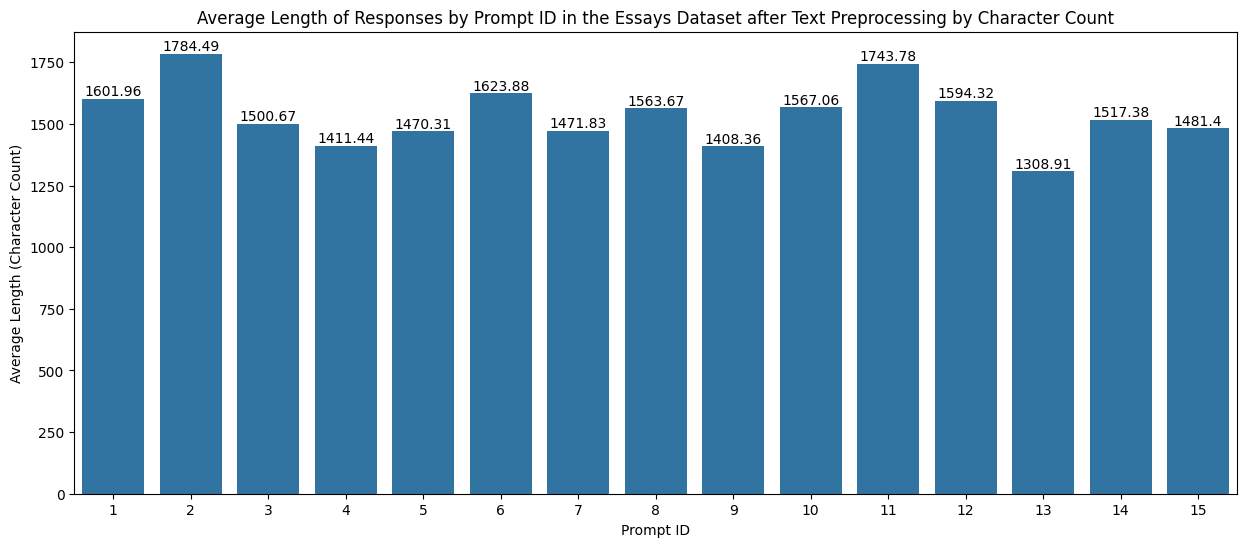

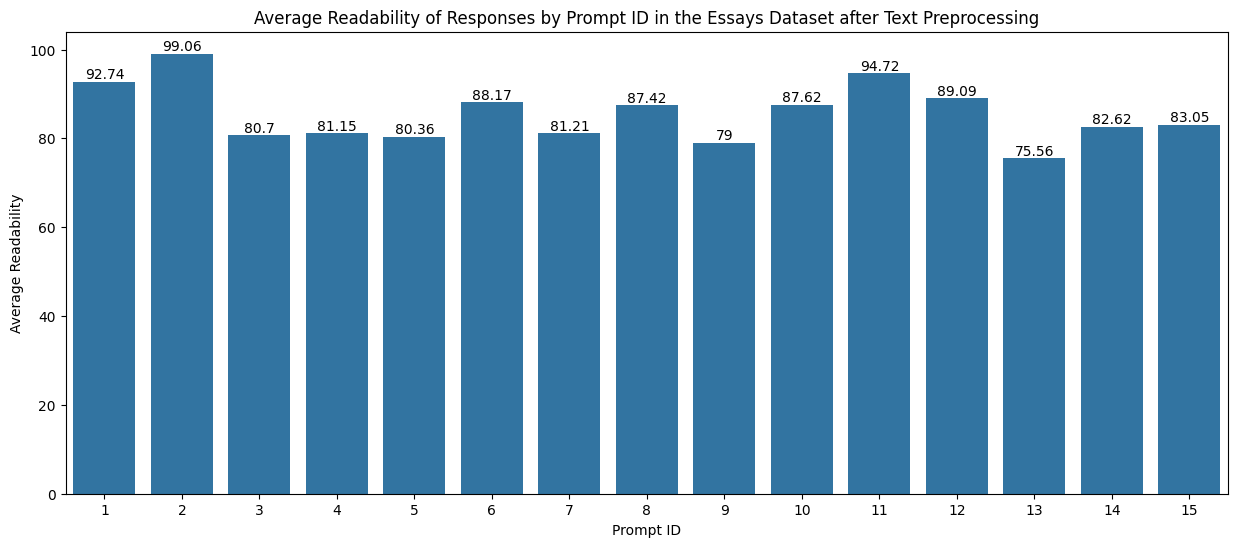

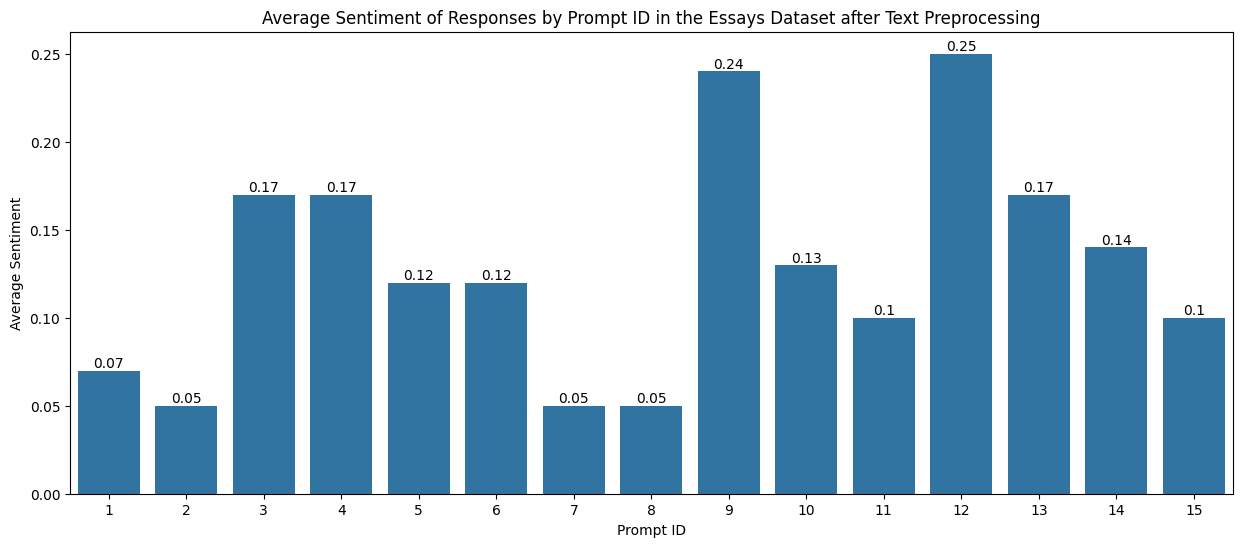

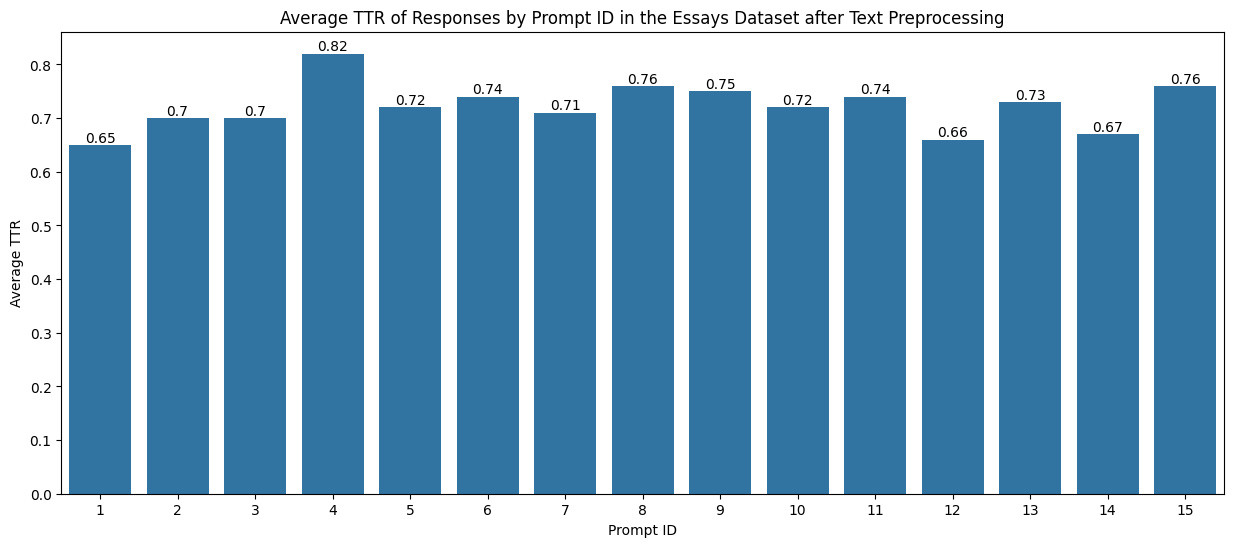

In [28]:
# Visualization for Average Length
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Essays_summary, x='prompt_id', y='length')
plt.title('Average Length of Responses by Prompt ID in the Essays Dataset after Text Preprocessing by Character Count')
plt.xlabel('Prompt ID')
plt.ylabel('Average Length (Character Count)')
plt.xticks()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average Readability
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Essays_summary, x='prompt_id', y='readability')
plt.title('Average Readability of Responses by Prompt ID in the Essays Dataset after Text Preprocessing')
plt.xlabel('Prompt ID')
plt.ylabel('Average Readability')
plt.xticks()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average Sentiment
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Essays_summary, x='prompt_id', y='sentiment')
plt.title('Average Sentiment of Responses by Prompt ID in the Essays Dataset after Text Preprocessing')
plt.xlabel('Prompt ID')
plt.ylabel('Average Sentiment')
plt.xticks()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Visualization for Average TTR
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=Essays_summary, x='prompt_id', y='TTR')
plt.title('Average TTR of Responses by Prompt ID in the Essays Dataset after Text Preprocessing')
plt.xlabel('Prompt ID')
plt.ylabel('Average TTR')
plt.xticks()
for container in ax.containers:
    ax.bar_label(container)
plt.show()

#### Prompt Complexity

In [106]:
# Function to add prompt length to the dataset
def add_prompt_length(df, prompt_column):
    df['prompt_length'] = df[prompt_column].apply(len)
    return df

# Add prompt length to the datasets
EssaysClean = add_prompt_length(EssaysClean, 'essay_title')
DAIGTClean = add_prompt_length(DAIGTClean, 'instructions')
DollyClean = add_prompt_length(DollyClean, 'instruction')
PnRClean = add_prompt_length(PnRClean, 'Input')

In [107]:
# Define a function to calculate Type-Token Ratio (TTR)
def calculate_ttr(text):
    tokens = text.split()
    types = set(tokens)
    ttr = len(types) / len(tokens) if len(tokens) > 0 else 0
    return ttr

# Add TTR to the Essays dataset
EssaysClean['TTR'] = EssaysClean['essay_text'].apply(calculate_ttr)

# Define a function to assess prompt complexity (e.g., by length of prompt)
def analyze_prompt_complexity(df, response_column):
    df['prompt_length'] = pd.to_numeric(df['prompt_length'], errors='coerce')
    complexity_summary = df.groupby('prompt_length').agg({
        response_column: 'count',
        'length': 'mean',
        'readability': 'mean',
        'sentiment': 'mean',
        'ttr': 'mean'
    }).reset_index()

    # Rename columns for clarity
    complexity_summary.columns = ['prompt_length', 'response_count', 'avg_length', 'avg_readability', 'avg_sentiment', 'avg_TTR']

    return complexity_summary

# Analyze prompt complexity for each dataset
Essays_complexity_summary = analyze_prompt_complexity(EssaysClean, 'essay_text')
DAIGT_complexity_summary = analyze_prompt_complexity(DAIGTClean, 'source_text')
Dolly_complexity_summary = analyze_prompt_complexity(DollyClean, 'response')
PnR_complexity_summary = analyze_prompt_complexity(PnRClean, 'Output')

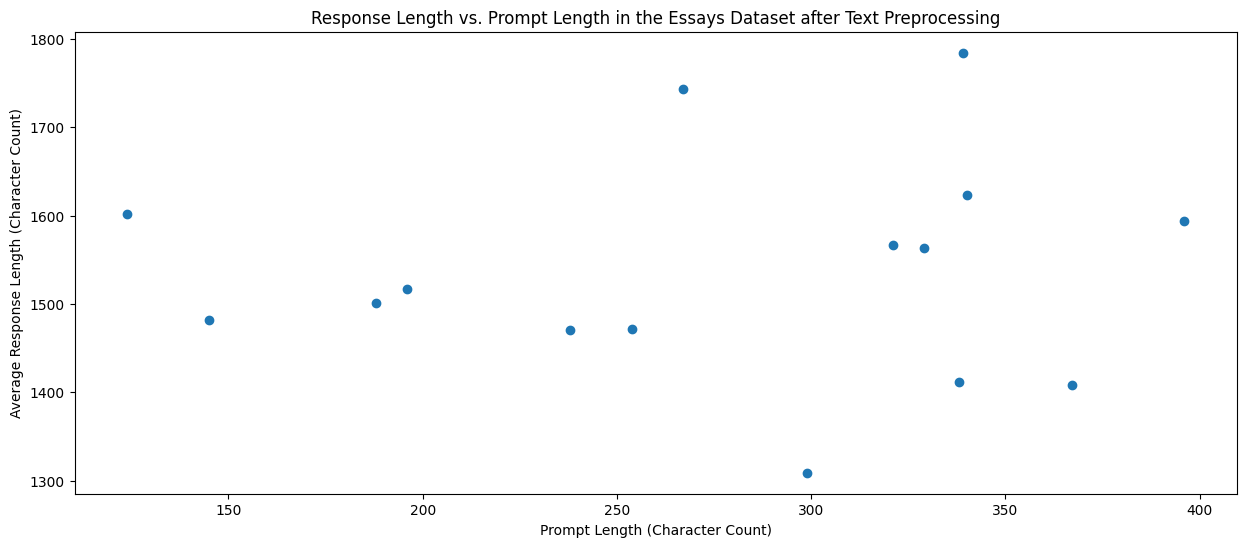

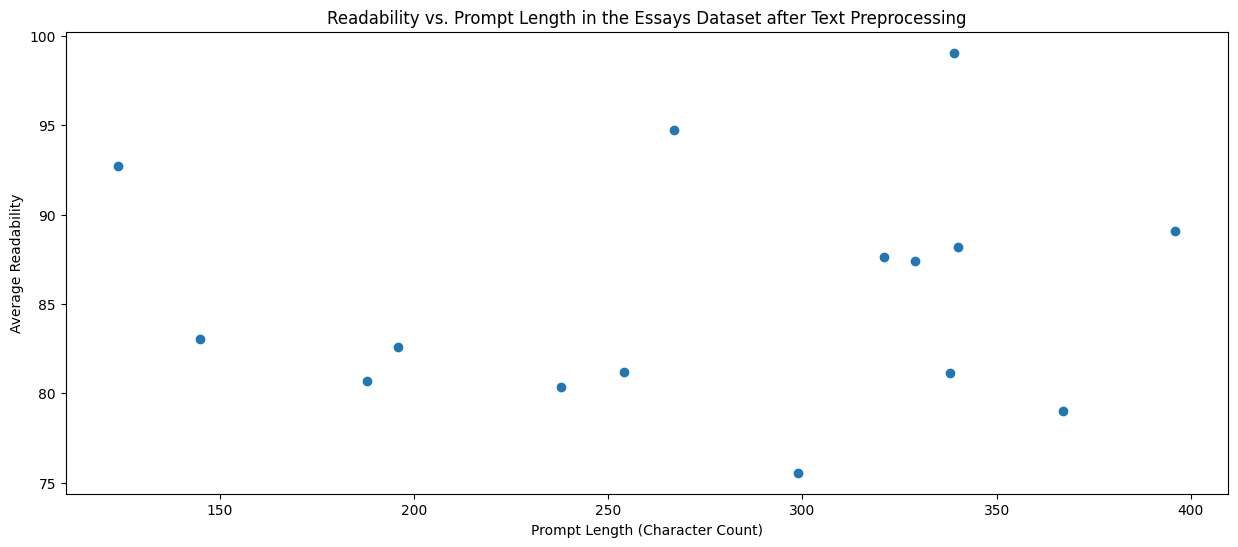

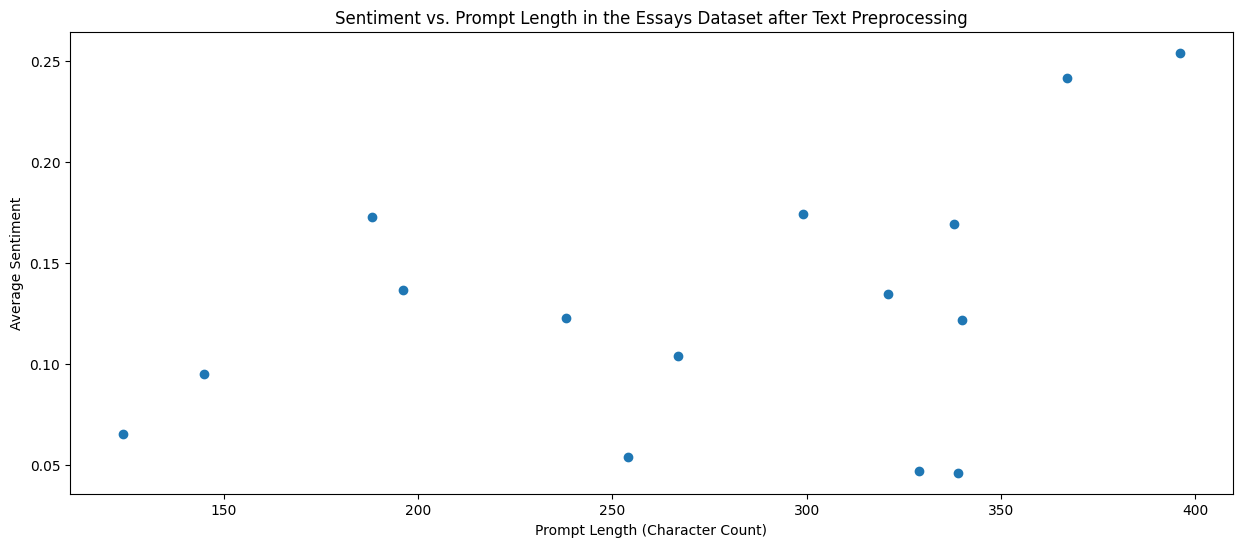

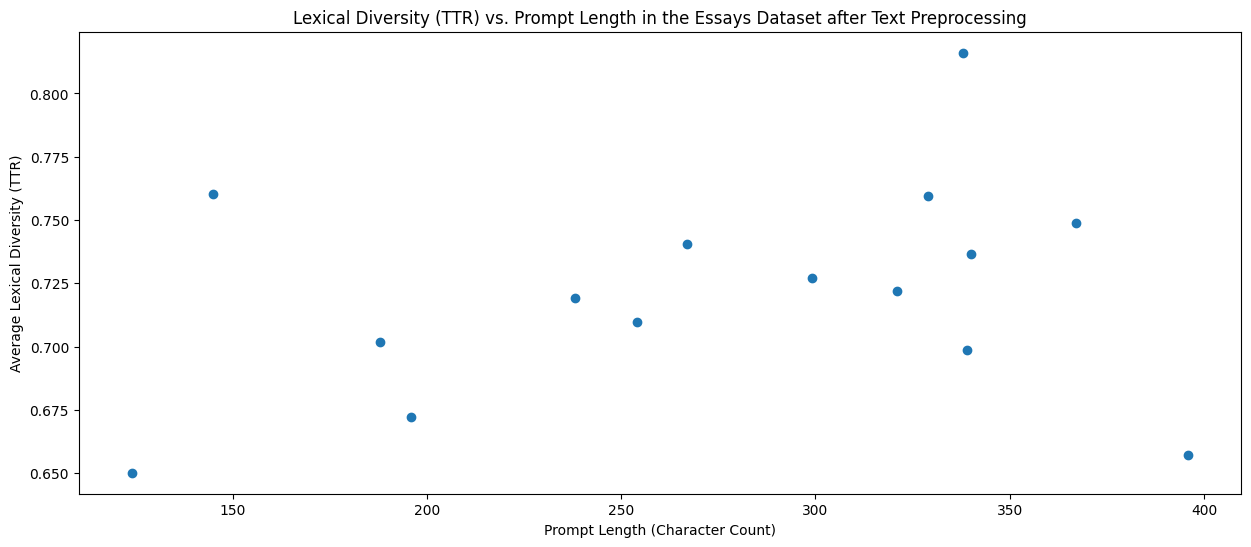

In [108]:
# Plotting each graph separately
plt.figure(figsize=(15, 6))
plt.scatter(Essays_complexity_summary['prompt_length'], Essays_complexity_summary['avg_length'])
plt.title('Response Length vs. Prompt Length in the Essays Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Response Length (Character Count)')
plt.show()

plt.figure(figsize=(15, 6))
plt.scatter(Essays_complexity_summary['prompt_length'], Essays_complexity_summary['avg_readability'])
plt.title('Readability vs. Prompt Length in the Essays Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Readability')
plt.show()

plt.figure(figsize=(15, 6))
plt.scatter(Essays_complexity_summary['prompt_length'], Essays_complexity_summary['avg_sentiment'])
plt.title('Sentiment vs. Prompt Length in the Essays Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Sentiment')
plt.show()

# Plot for Lexical Diversity (TTR) vs. Prompt Length
plt.figure(figsize=(15, 6))
plt.scatter(Essays_complexity_summary['prompt_length'], Essays_complexity_summary['avg_TTR'])
plt.title('Lexical Diversity (TTR) vs. Prompt Length in the Essays Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Lexical Diversity (TTR)')
plt.show()

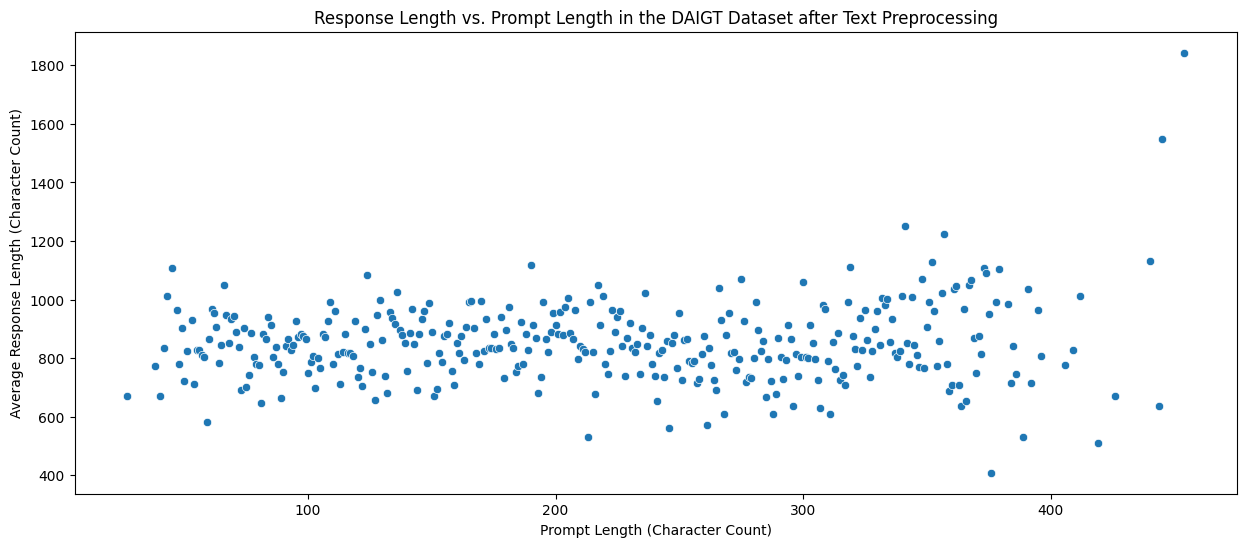

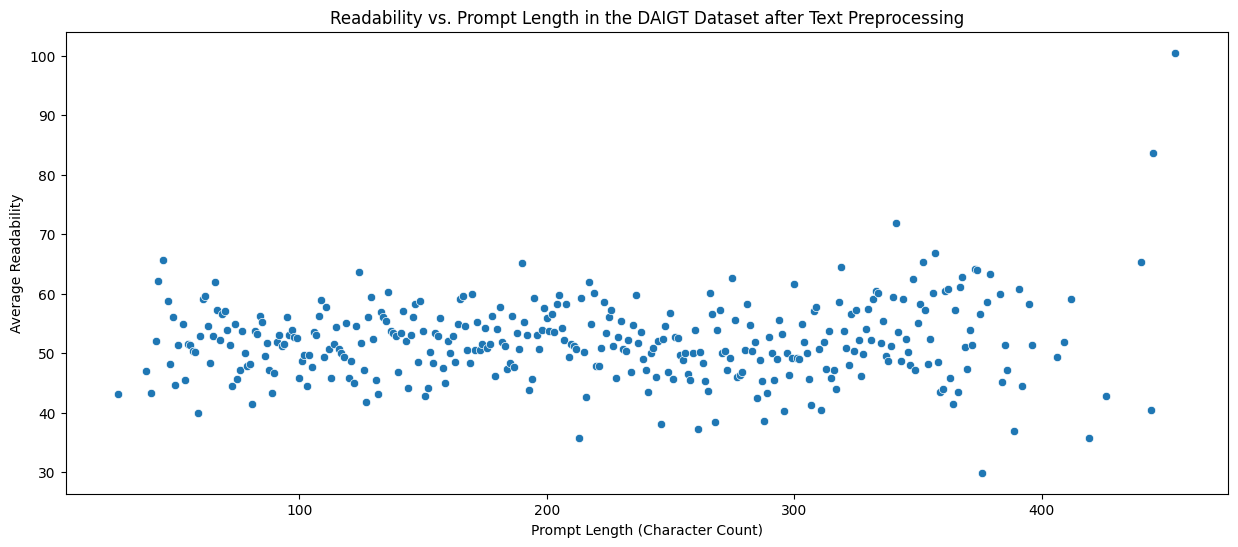

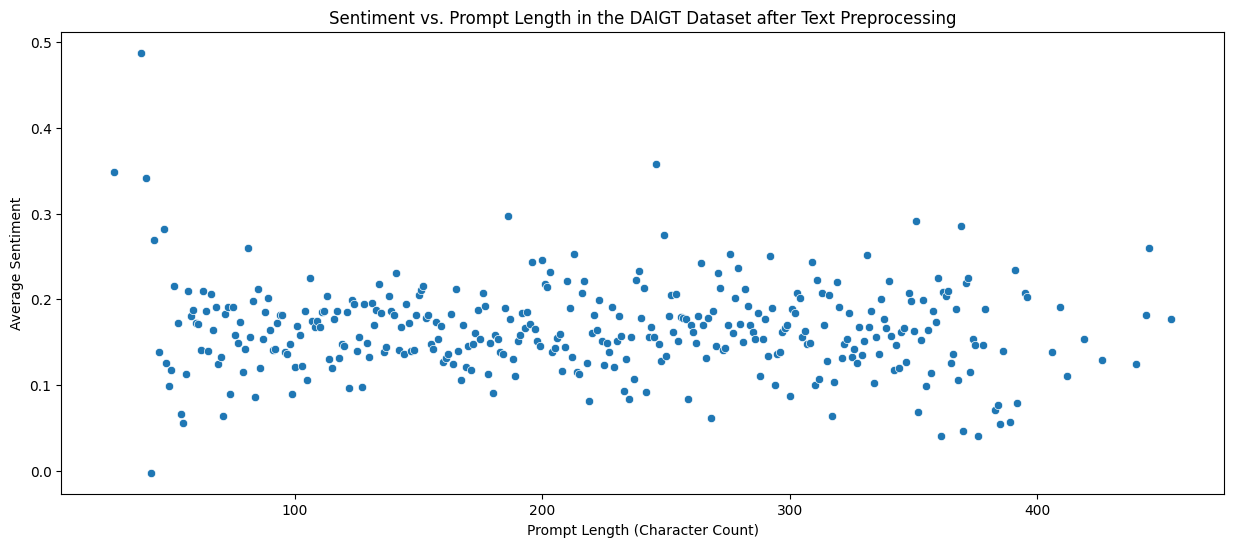

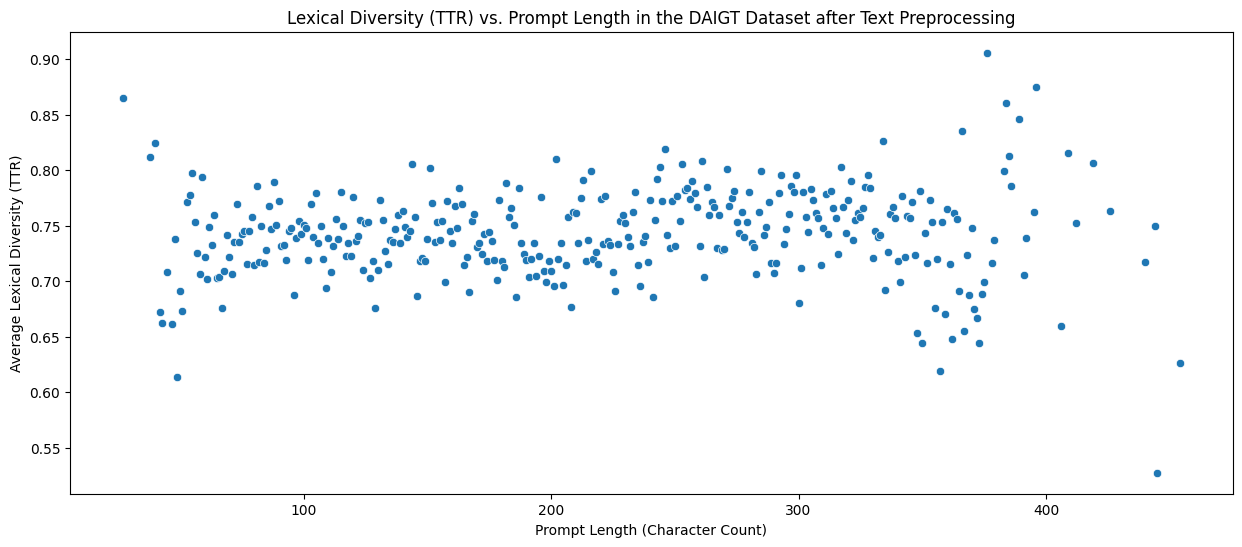

In [109]:
# Plotting each graph separately
plt.figure(figsize=(15, 6))
sns.scatterplot(data=DAIGT_complexity_summary, x='prompt_length', y='avg_length')
plt.title('Response Length vs. Prompt Length in the DAIGT Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Response Length (Character Count)')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=DAIGT_complexity_summary, x='prompt_length', y='avg_readability')
plt.title('Readability vs. Prompt Length in the DAIGT Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Readability')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=DAIGT_complexity_summary, x='prompt_length', y='avg_sentiment')
plt.title('Sentiment vs. Prompt Length in the DAIGT Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Sentiment')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=DAIGT_complexity_summary, x='prompt_length', y='avg_TTR')
plt.title('Lexical Diversity (TTR) vs. Prompt Length in the DAIGT Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Lexical Diversity (TTR)')
plt.show()

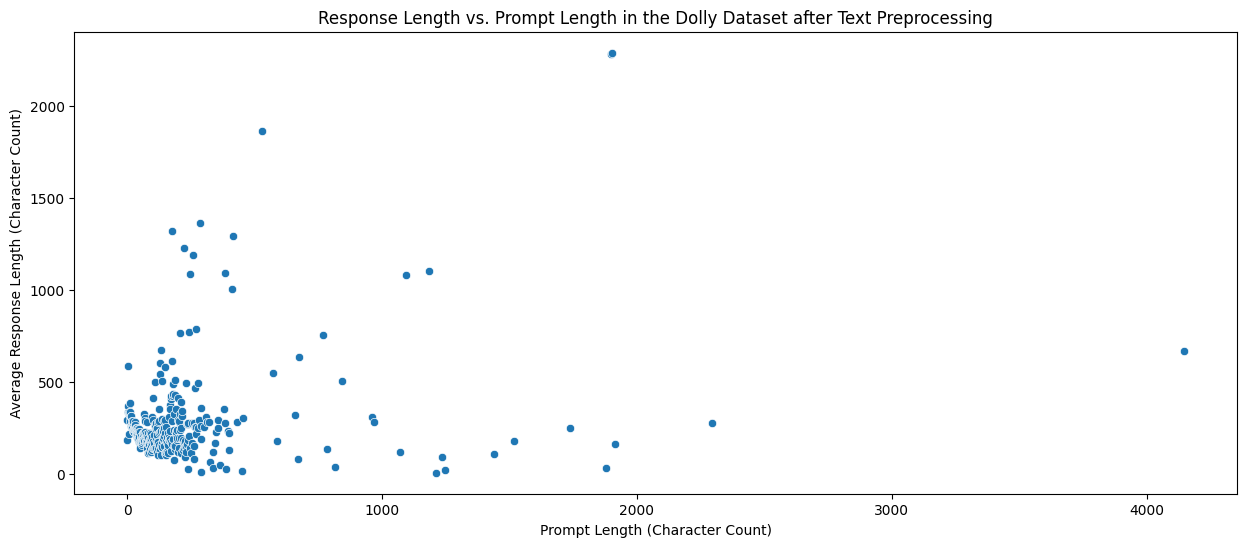

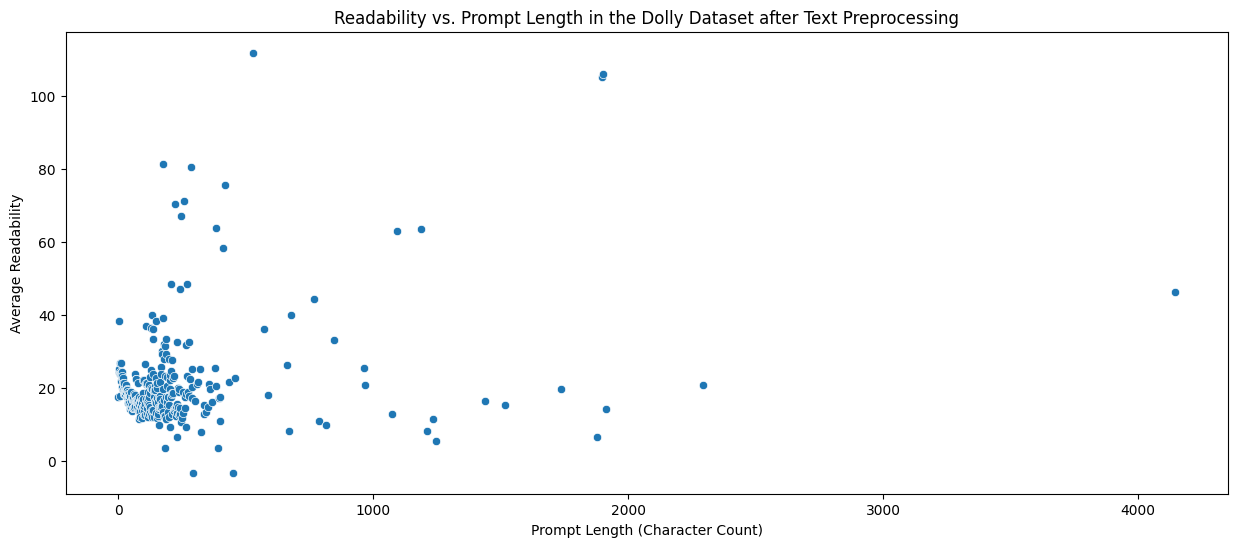

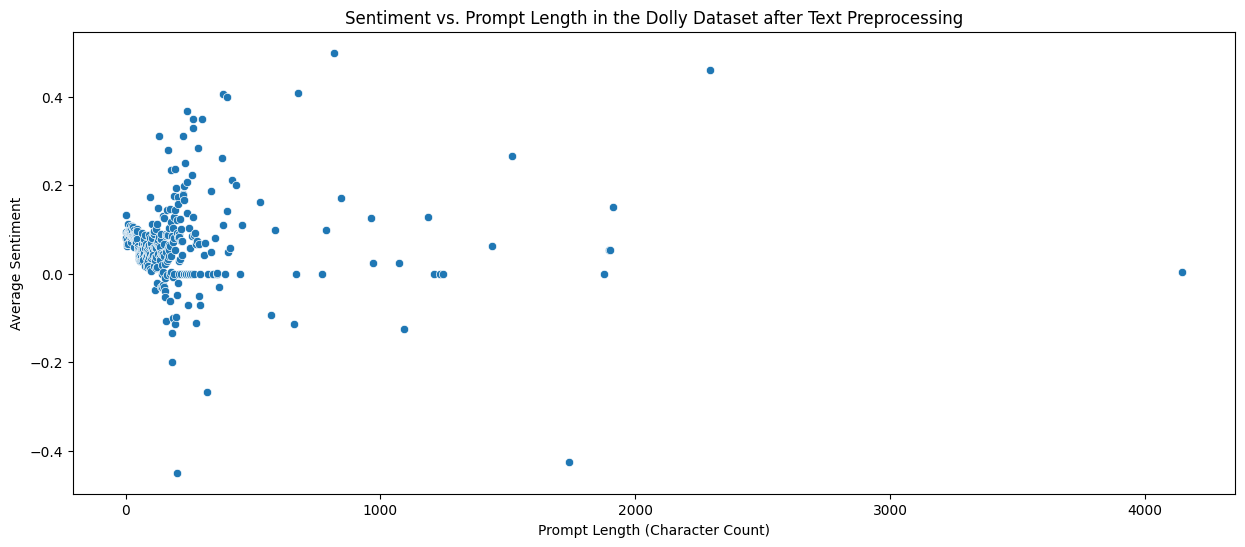

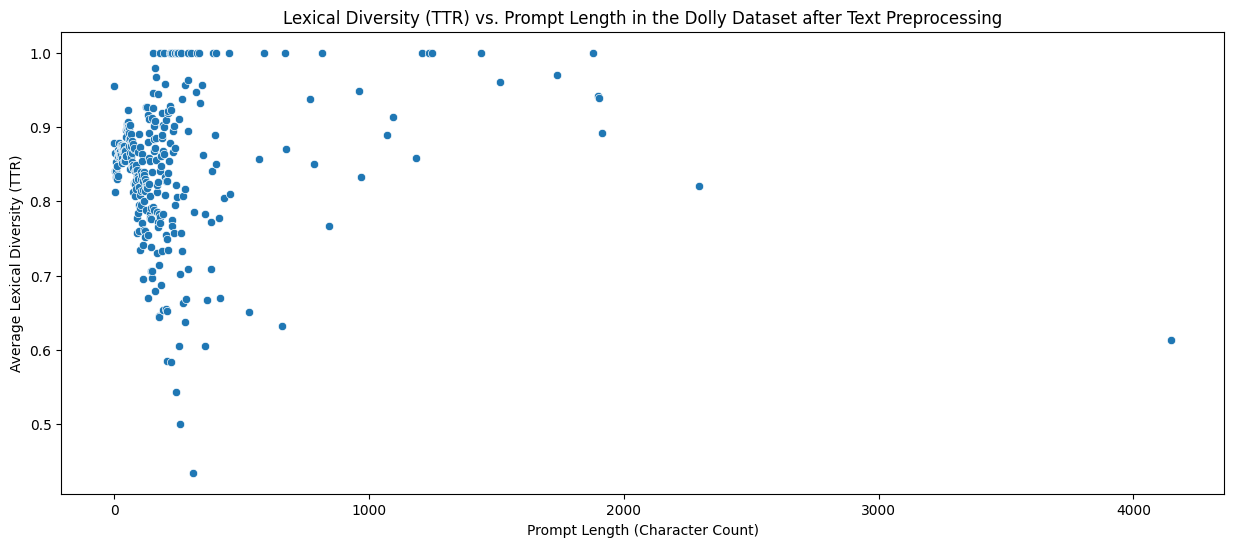

In [110]:
# Plotting each graph separately
plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_summary, x='prompt_length', y='avg_length')
plt.title('Response Length vs. Prompt Length in the Dolly Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Response Length (Character Count)')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_summary, x='prompt_length', y='avg_readability')
plt.title('Readability vs. Prompt Length in the Dolly Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Readability')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_summary, x='prompt_length', y='avg_sentiment')
plt.title('Sentiment vs. Prompt Length in the Dolly Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Sentiment')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_summary, x='prompt_length', y='avg_TTR')
plt.title('Lexical Diversity (TTR) vs. Prompt Length in the Dolly Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Lexical Diversity (TTR)')
plt.show()

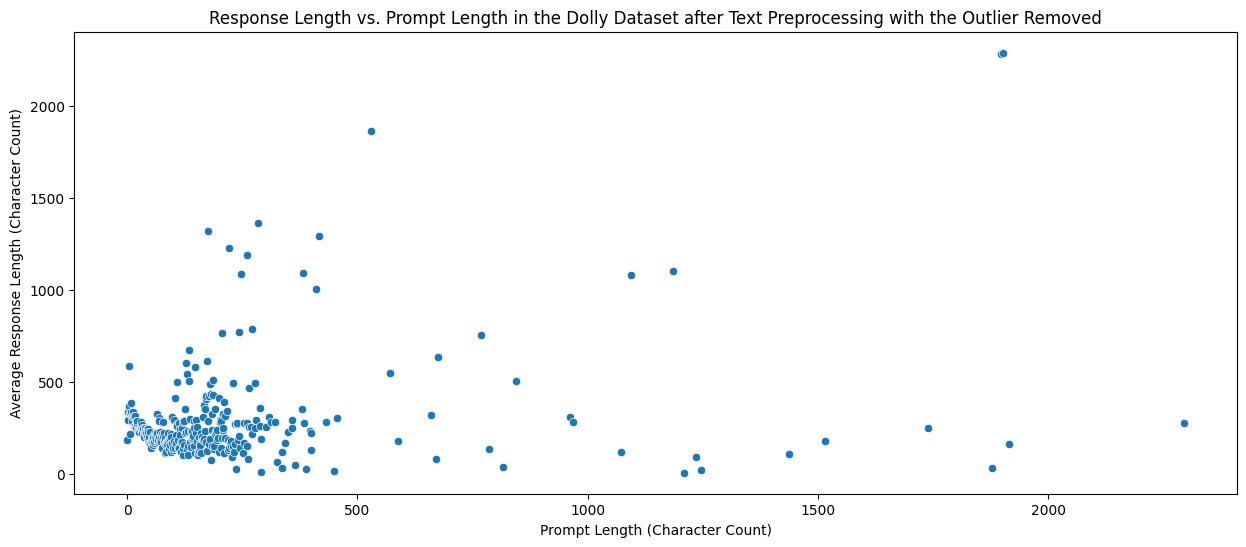

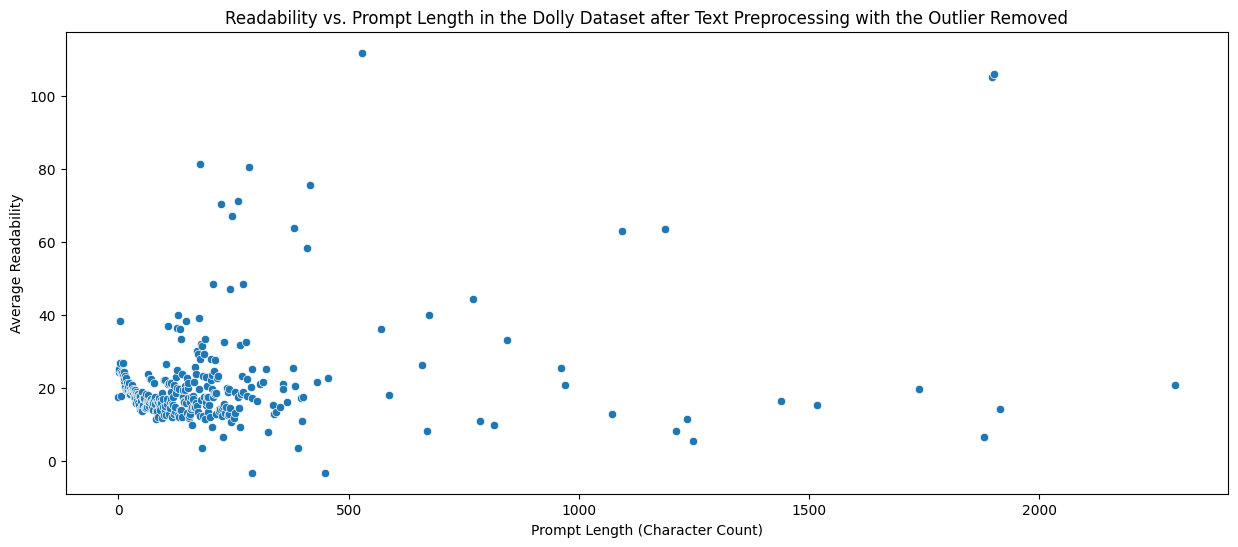

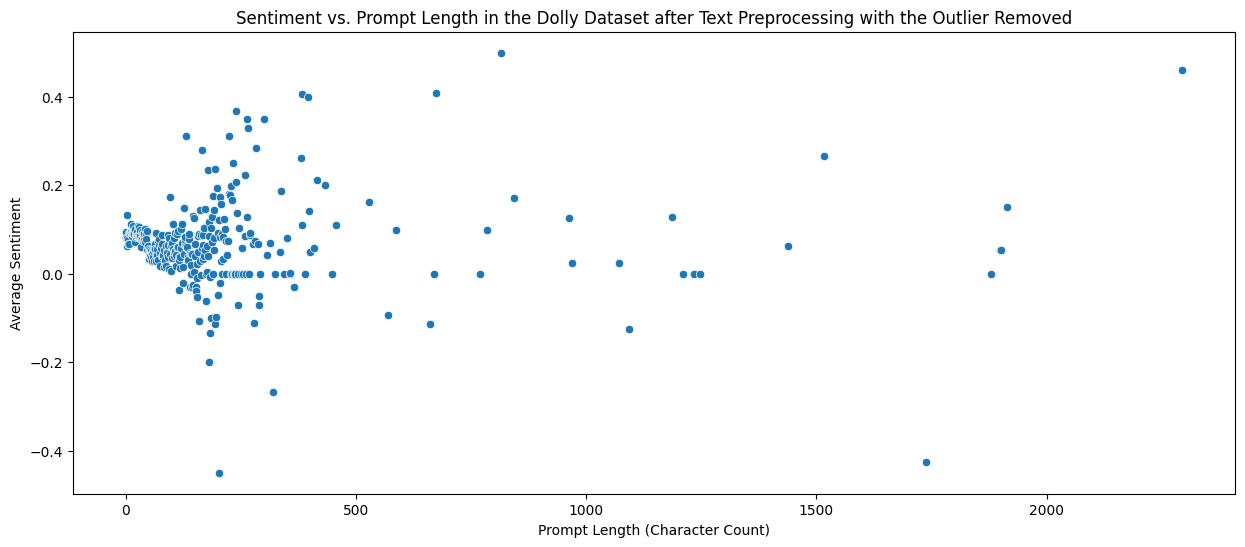

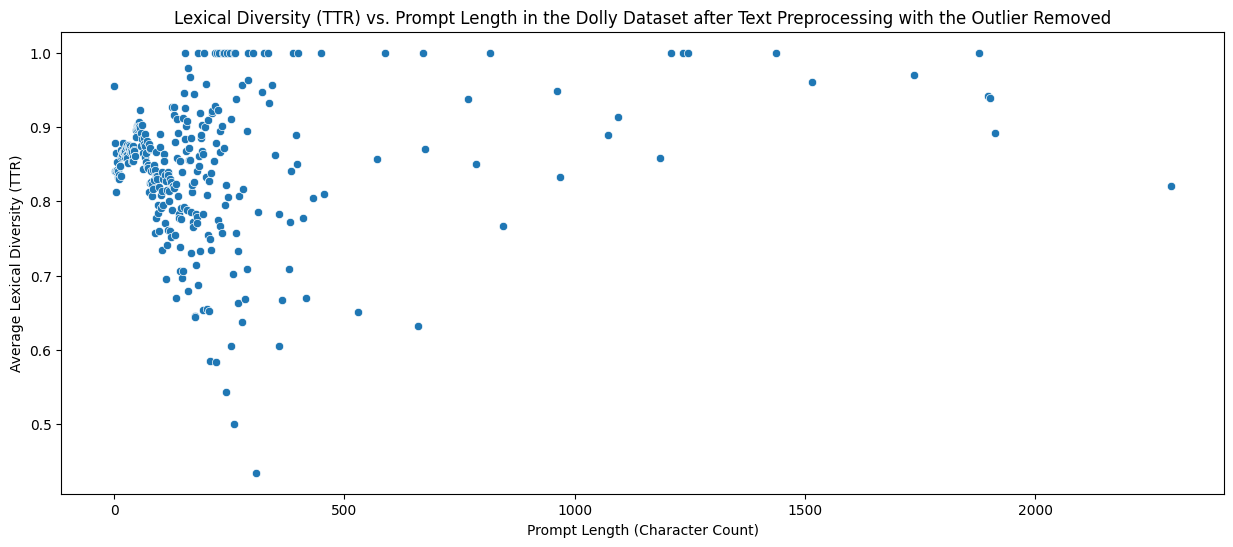

In [112]:
# Filter out the outlier
Dolly_complexity_filtered = Dolly_complexity_summary[Dolly_complexity_summary['prompt_length'] < 4000]

# Plotting without the outlier
plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_filtered, x='prompt_length', y='avg_length')
plt.title('Response Length vs. Prompt Length in the Dolly Dataset after Text Preprocessing with the Outlier Removed')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Response Length (Character Count)')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_filtered, x='prompt_length', y='avg_readability')
plt.title('Readability vs. Prompt Length in the Dolly Dataset after Text Preprocessing with the Outlier Removed')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Readability')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_filtered, x='prompt_length', y='avg_sentiment')
plt.title('Sentiment vs. Prompt Length in the Dolly Dataset after Text Preprocessing with the Outlier Removed')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Sentiment')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=Dolly_complexity_filtered, x='prompt_length', y='avg_TTR')
plt.title('Lexical Diversity (TTR) vs. Prompt Length in the Dolly Dataset after Text Preprocessing with the Outlier Removed')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Lexical Diversity (TTR)')
plt.show()

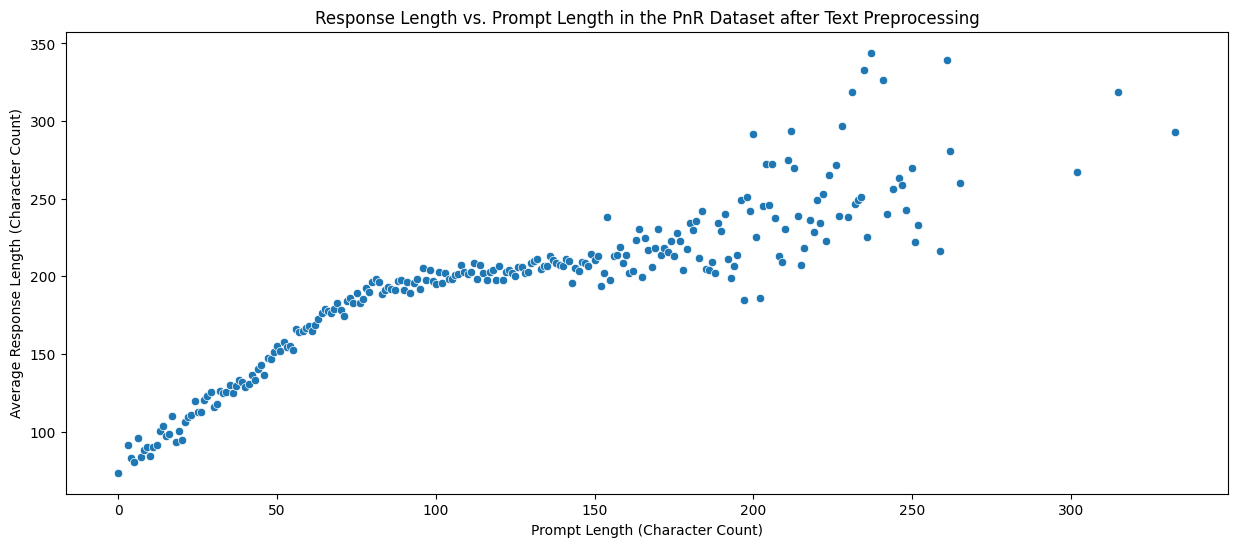

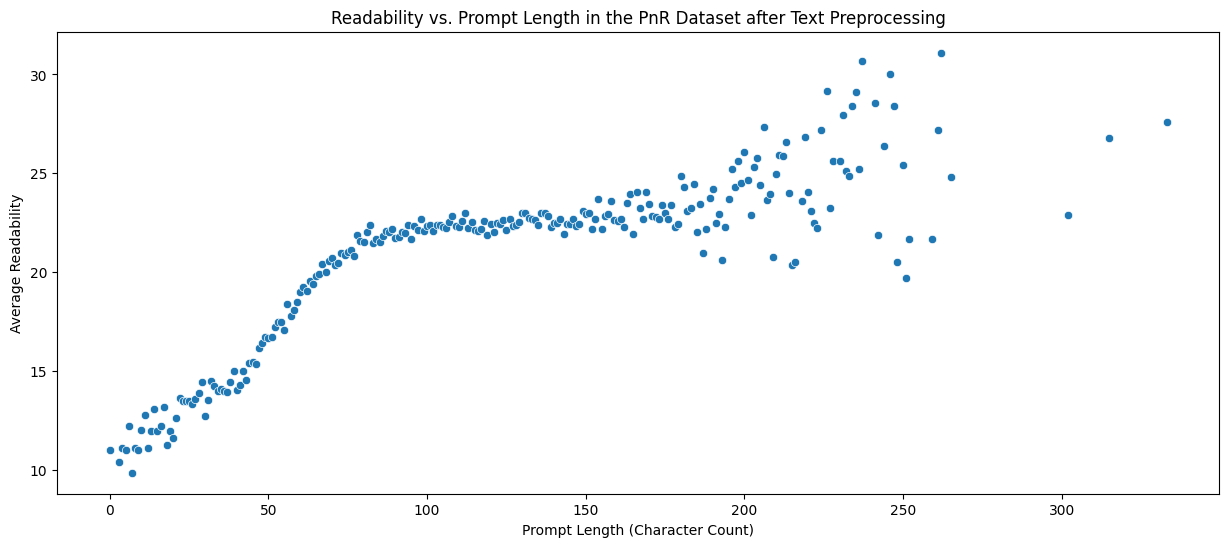

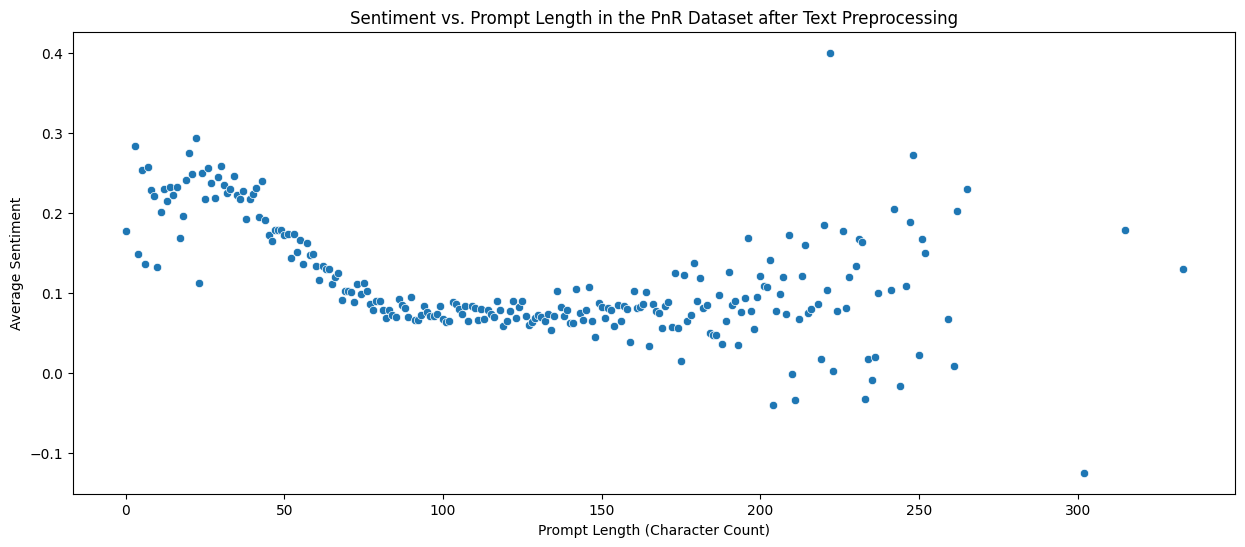

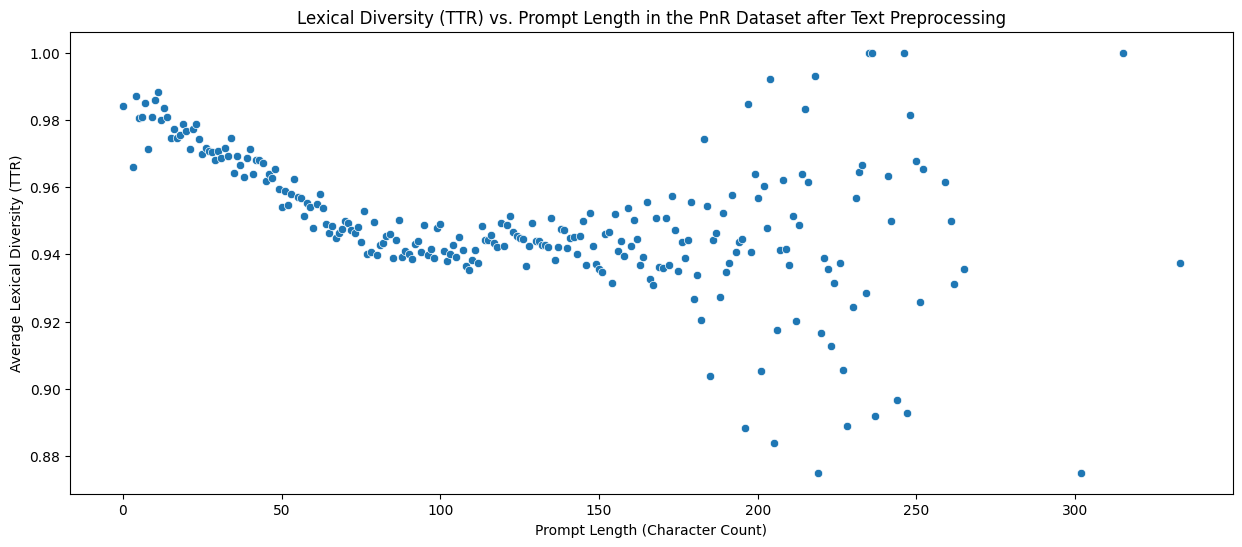

In [114]:
# Plotting each graph separately
plt.figure(figsize=(15, 6))
sns.scatterplot(data=PnR_complexity_summary, x='prompt_length', y='avg_length')
plt.title('Response Length vs. Prompt Length in the PnR Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Response Length (Character Count)')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=PnR_complexity_summary, x='prompt_length', y='avg_readability')
plt.title('Readability vs. Prompt Length in the PnR Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Readability')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=PnR_complexity_summary, x='prompt_length', y='avg_sentiment')
plt.title('Sentiment vs. Prompt Length in the PnR Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Sentiment')
plt.show()

plt.figure(figsize=(15, 6))
sns.scatterplot(data=PnR_complexity_summary, x='prompt_length', y='avg_TTR')
plt.title('Lexical Diversity (TTR) vs. Prompt Length in the PnR Dataset after Text Preprocessing')
plt.xlabel('Prompt Length (Character Count)')
plt.ylabel('Average Lexical Diversity (TTR)')
plt.show()

### Prompt Topics

In [115]:
# Function to analyze performance by topic
def analyze_topic_performance(df, text_column, topic_column):
    df[topic_column] = df[topic_column].astype(str)
    topic_summary = df.groupby(topic_column).agg({
        text_column: 'count',
        'length': 'mean',
        'readability': 'mean',
        'sentiment': 'mean',
        'ttr': 'mean'
    }).reset_index()
    topic_summary.columns = [topic_column, 'response_count', 'avg_length', 'avg_readability', 'avg_sentiment','avg_ttr']
    topic_summary = topic_summary.round({'response_count': 2, 'avg_length': 2, 'avg_readability': 2, 'avg_sentiment': 2, 'avg_ttr': 2})

    return topic_summary

# Example for datasets
Dolly_topic_summary = analyze_topic_performance(DollyClean, 'response', 'category')
PnR_topic_summary = analyze_topic_performance(PnRClean, 'Output', 'topic')
Essays_topic_summary = analyze_topic_performance(EssaysClean, 'essay_text', 'prompt_id')

# Convert prompt_id to numeric and sort by prompt_id
Essays_topic_summary['prompt_id'] = pd.to_numeric(Essays_topic_summary['prompt_id'])
Essays_topic_summary = Essays_topic_summary.sort_values('prompt_id')


### Clean Advanced Lexical Analysis

In [116]:
def perform_topic_modeling(df, text_column, n_topics=5):
    count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    doc_term_matrix = count_vectorizer.fit_transform(df[text_column])

    LDA = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    LDA.fit(doc_term_matrix)

    for i, topic in enumerate(LDA.components_):
        print(f'Top 10 words for topic #{i}:')
        print([count_vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])
        print('\n')

perform_topic_modeling(DollyClean, 'response')

Top 10 words for topic #0:
['america', 'india', 'language', 'year', 'american', 'th', 'world', 'country', 'game', 'war']


Top 10 words for topic #1:
['green', 'red', 'school', 'president', 'new', 'league', 'united', 'university', 'city', 'state']


Top 10 words for topic #2:
['used', 'way', 'help', 'good', 'need', 'use', 'make', 'people', 'time', 'like']


Top 10 words for topic #3:
['lake', 'united', 'bank', 'world', 'number', 'company', 'area', 'string', 'data', 'state']


Top 10 words for topic #4:
['world', 'best', 'ball', 'year', 'music', 'sport', 'time', 'game', 'team', 'player']




In [117]:
perform_topic_modeling(PnRClean, 'Output')

Top 10 words for topic #0:
['beauvoir', 'role', 'concept', 'explore', 'marx', 'human', 'experience', 'literary', 'literature', 'work']


Top 10 words for topic #1:
['feeling', 'music', 'new', 'love', 'conversation', 'im', 'favorite', 'try', 'like', 'time']


Top 10 words for topic #2:
['society', 'individual', 'relationship', 'reality', 'challenge', 'work', 'language', 'power', 'literature', 'social']


Top 10 words for topic #3:
['freedom', 'concept', 'nietzsche', 'existence', 'camus', 'meaning', 'work', 'theme', 'individual', 'human']


Top 10 words for topic #4:
['make', 'thing', 'personal', 'dont', 'world', 'experience', 'people', 'ive', 'life', 'im']




In [118]:
perform_topic_modeling(EssaysClean, 'essay_text')

Top 10 words for topic #0:
['safety', 'driverless', 'road', 'car', 'vehicle', 'driving', 'use', 'driver', 'cell', 'phone']


Top 10 words for topic #1:
['program', 'different', 'choice', 'person', 'candidate', 'college', 'electoral', 'popular', 'state', 'vote']


Top 10 words for topic #2:
['studying', 'climate', 'vehicle', 'scientific', 'public', 'planet', 'earth', 'author', 'car', 'venus']


Top 10 words for topic #3:
['artificial', 'alien', 'home', 'class', 'evidence', 'mar', 'natural', 'distance', 'learning', 'face']


Top 10 words for topic #4:
['benefit', 'project', 'help', 'time', 'teacher', 'policy', 'learning', 'activity', 'school', 'student']




In [119]:
perform_topic_modeling(DAIGTClean, 'source_text')

Top 10 words for topic #0:
['time', 'experience', 'college', 'make', 'year', 'high', 'decision', 'career', 'school', 'student']


Top 10 words for topic #1:
['way', 'individual', 'impression', 'help', 'important', 'group', 'make', 'working', 'life', 'people']


Top 10 words for topic #2:
['benefit', 'online', 'day', 'technology', 'activity', 'time', 'class', 'learning', 'school', 'student']


Top 10 words for topic #3:
['achieving', 'important', 'work', 'help', 'life', 'attitude', 'goal', 'failure', 'positive', 'success']


Top 10 words for topic #4:
['life', 'world', 'park', 'great', 'experience', 'make', 'time', 'way', 'kindness', 'activity']




In [120]:
def assign_topics_to_responses(df, text_column, LDA, count_vectorizer):
    doc_term_matrix = count_vectorizer.transform(df[text_column])
    topic_assignments = LDA.transform(doc_term_matrix).argmax(axis=1)
    df['assigned_topic'] = topic_assignments
    return df

# Perform topic modeling and assign topics
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
doc_term_matrix = count_vectorizer.fit_transform(DollyClean['response'])

LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

Dolly_with_topics = assign_topics_to_responses(DollyClean, 'response', LDA, count_vectorizer)

# Analyze performance by assigned topic
topic_performance_summary = analyze_topic_performance(Dolly_with_topics, 'response', 'assigned_topic')
print(topic_performance_summary) 

  assigned_topic  response_count  avg_length  avg_readability  avg_sentiment  \
0              0            2546      206.10            16.46           0.04   
1              1            2665      146.92            13.39           0.05   
2              2            4237      360.58            25.99           0.11   
3              3            2472      219.42            18.30           0.06   
4              4            3091      220.12            17.09           0.10   

   avg_ttr  
0     0.85  
1     0.90  
2     0.83  
3     0.86  
4     0.87  


In [121]:
DAIGT_with_topics = assign_topics_to_responses(DAIGTClean, 'source_text', LDA, count_vectorizer)

# Analyze performance by assigned topic
topic_performance_summary = analyze_topic_performance(DAIGT_with_topics, 'source_text', 'assigned_topic')
print(topic_performance_summary)

  assigned_topic  response_count  avg_length  avg_readability  avg_sentiment  \
0              0               6      868.00            52.15           0.18   
1              2            2375      848.55            51.87           0.16   
2              3               1      756.00            47.40           0.04   
3              4              39      691.38            43.94           0.29   

   avg_ttr  
0     0.81  
1     0.74  
2     0.88  
3     0.79  


In [122]:
Essays_with_topics = assign_topics_to_responses(EssaysClean, 'essay_text', LDA, count_vectorizer)

# Analyze performance by assigned topic
topic_performance_summary = analyze_topic_performance(Essays_with_topics, 'essay_text', 'assigned_topic')
print(topic_performance_summary)

  assigned_topic  response_count  avg_length  avg_readability  avg_sentiment  \
0              2             979     1532.04            85.25           0.13   
1              3              21     1595.14            89.46           0.22   

   avg_ttr  
0     0.72  
1     0.63  


In [123]:
PnR_with_topics = assign_topics_to_responses(PnRClean, 'Output', LDA, count_vectorizer)

# Analyze performance by assigned topic
topic_performance_summary = analyze_topic_performance(PnR_with_topics, 'Output', 'assigned_topic')
print(topic_performance_summary)

  assigned_topic  response_count  avg_length  avg_readability  avg_sentiment  \
0              0            3012      178.51            20.12           0.12   
1              1             383      132.52            12.06           0.24   
2              2           38689      167.18            18.78           0.13   
3              3             677      136.99            16.51           0.19   
4              4            6837      122.42            13.60           0.27   

   avg_ttr  
0     0.94  
1     0.95  
2     0.95  
3     0.96  
4     0.97  


### Clean Response Length

In [124]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Add LLM name to each dataset
EssaysClean['LLM'] = 'Essays'
DollyClean['LLM'] = 'Dolly'
PnRClean['LLM'] = 'PnR'
DAIGTClean['LLM'] = 'DAIGT'

# Normalize column names to make merging easier
EssaysClean = EssaysClean.rename(columns={'essay_title': 'prompt', 'essay_text': 'response'})
DollyClean = DollyClean.rename(columns={'instruction': 'prompt', 'response': 'response'})
PnRClean = PnRClean.rename(columns={'Input': 'prompt', 'Output': 'response'})
DAIGTClean = DAIGTClean.rename(columns={'instructions': 'prompt', 'source_text': 'response'})

# Add topic information
EssaysClean['topic'] = EssaysClean['prompt_id']
DollyClean['topic'] = DollyClean['category']
PnRClean['topic'] = PnRClean['topic']
DAIGTClean['topic'] = DAIGTClean['prompt']  # Assuming the prompt column can be used as topic for DAIGT

# Convert 'topic' to numeric if possible
def convert_to_numeric(df, column):
    df[column] = pd.to_numeric(df[column], errors='coerce')

convert_to_numeric(EssaysClean, 'topic')


# Separate DAIGT dataset
DAIGT_df = DAIGTClean[['LLM', 'prompt', 'response']]

# Combine remaining datasets
combined_df = pd.concat([EssaysClean[['LLM', 'topic', 'prompt', 'response']], 
                         DollyClean[['LLM', 'topic', 'prompt', 'response']], 
                         PnRClean[['LLM', 'topic', 'prompt', 'response']]])

# Response Length Analysis
combined_df['response_length'] = combined_df['response'].apply(lambda x: len(word_tokenize(x)))
DAIGT_df['response_length'] = DAIGT_df['response'].apply(lambda x: len(word_tokenize(x)))

# Calculate response diversity
def calculate_diversity(text):
    tokens = word_tokenize(text)
    if len(tokens) == 0:
        return 0
    return len(set(tokens)) / len(tokens)

combined_df['diversity'] = combined_df['response'].apply(calculate_diversity)
DAIGT_df['diversity'] = DAIGT_df['response'].apply(calculate_diversity)

# Calculate average response length and diversity for DAIGT dataset
avg_response_length_DAIGT = DAIGT_df['response_length'].mean()
avg_diversity_DAIGT = DAIGT_df['diversity'].mean()

print(f"Average Response Length for the DAIGT Dataset after Text Preprocessing: {avg_response_length_DAIGT:.2f}")
print(f"Average Diversity for the DAIGT Dataset after Text Preprocessing: {avg_diversity_DAIGT:.2f}")

C:\Users\Zeyd Ali\AppData\Local\Temp\ipykernel_15096\757974130.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DAIGT_df['response_length'] = DAIGT_df['response'].apply(lambda x: len(word_tokenize(x)))


Average Response Length for the DAIGT Dataset after Text Preprocessing: 109.52
Average Diversity for the DAIGT Dataset after Text Preprocessing: 0.74


C:\Users\Zeyd Ali\AppData\Local\Temp\ipykernel_15096\757974130.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DAIGT_df['diversity'] = DAIGT_df['response'].apply(calculate_diversity)


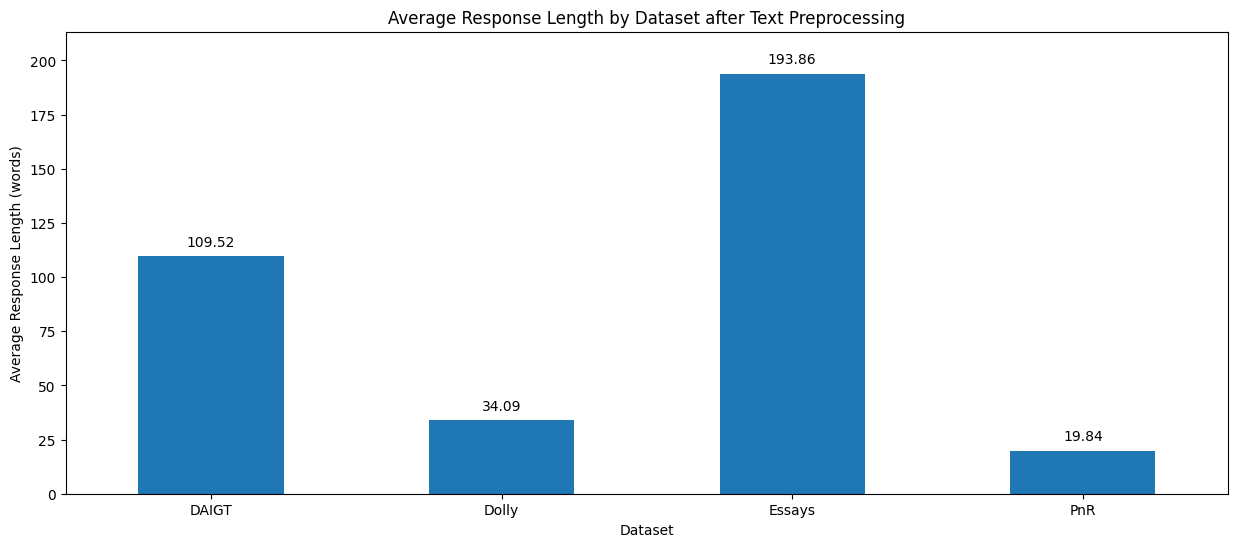

In [125]:
# Plot average response length for each LLM (including DAIGT)
avg_response_length_llm = pd.concat([combined_df, DAIGT_df]).groupby('LLM')['response_length'].mean()
ax = avg_response_length_llm.plot(kind='bar', figsize=(15, 6), title='Average Response Length by Dataset after Text Preprocessing')
plt.xlabel('Dataset')
plt.ylabel('Average Response Length (words)')
plt.xticks(rotation=0)
# Adjust y-axis limit
max_height = avg_response_length_llm.max()
plt.ylim(0, max_height * 1.1)  

# Annotate bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

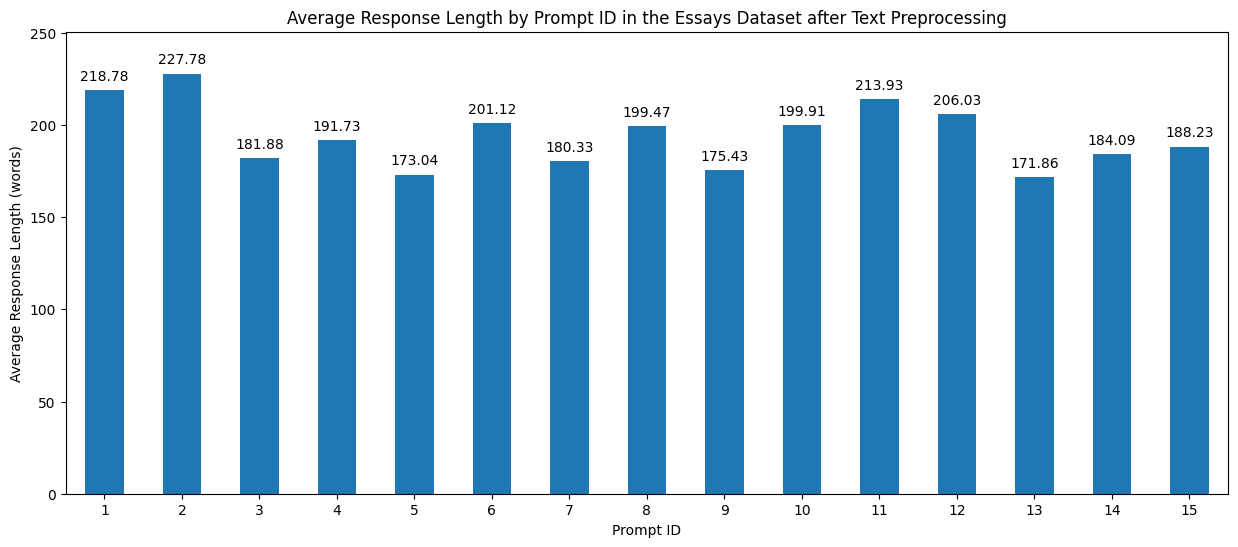

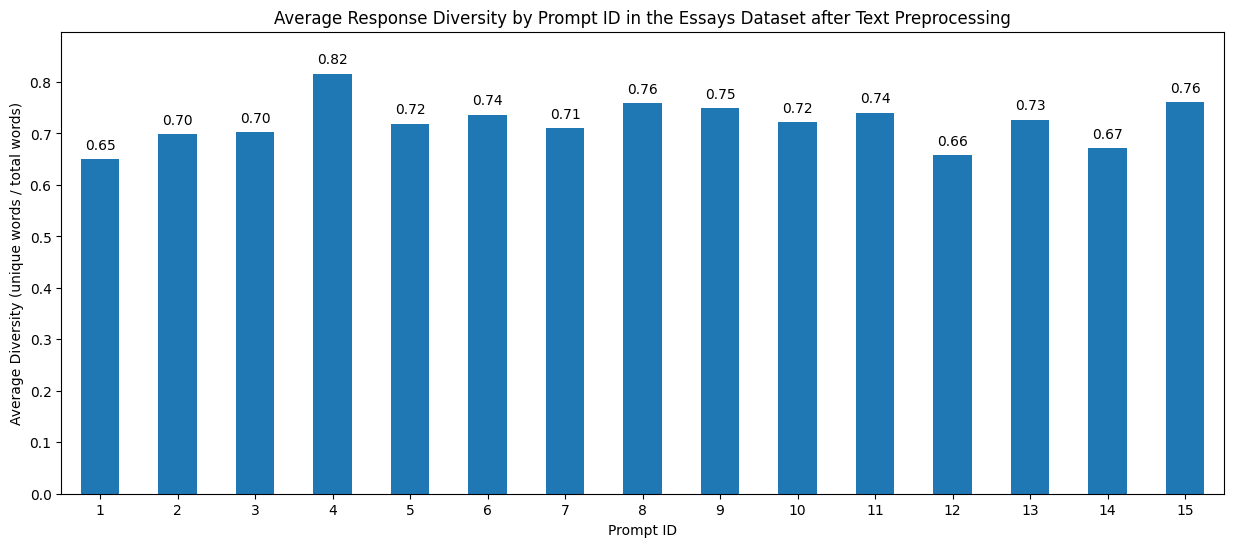

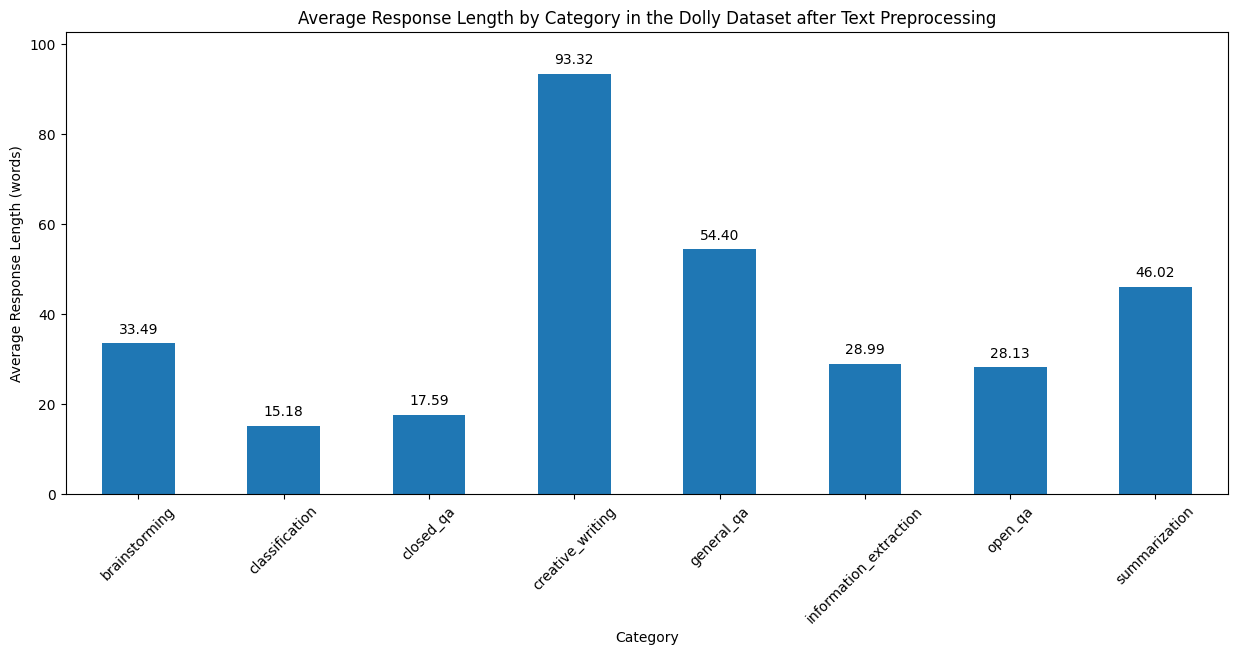

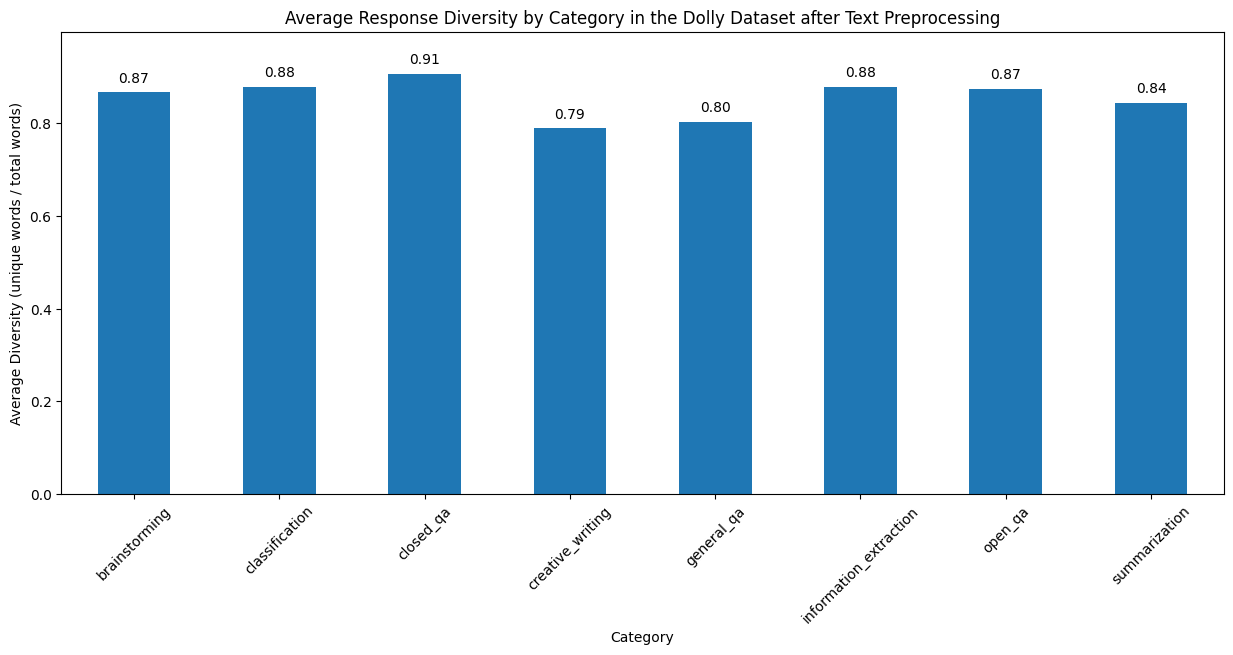

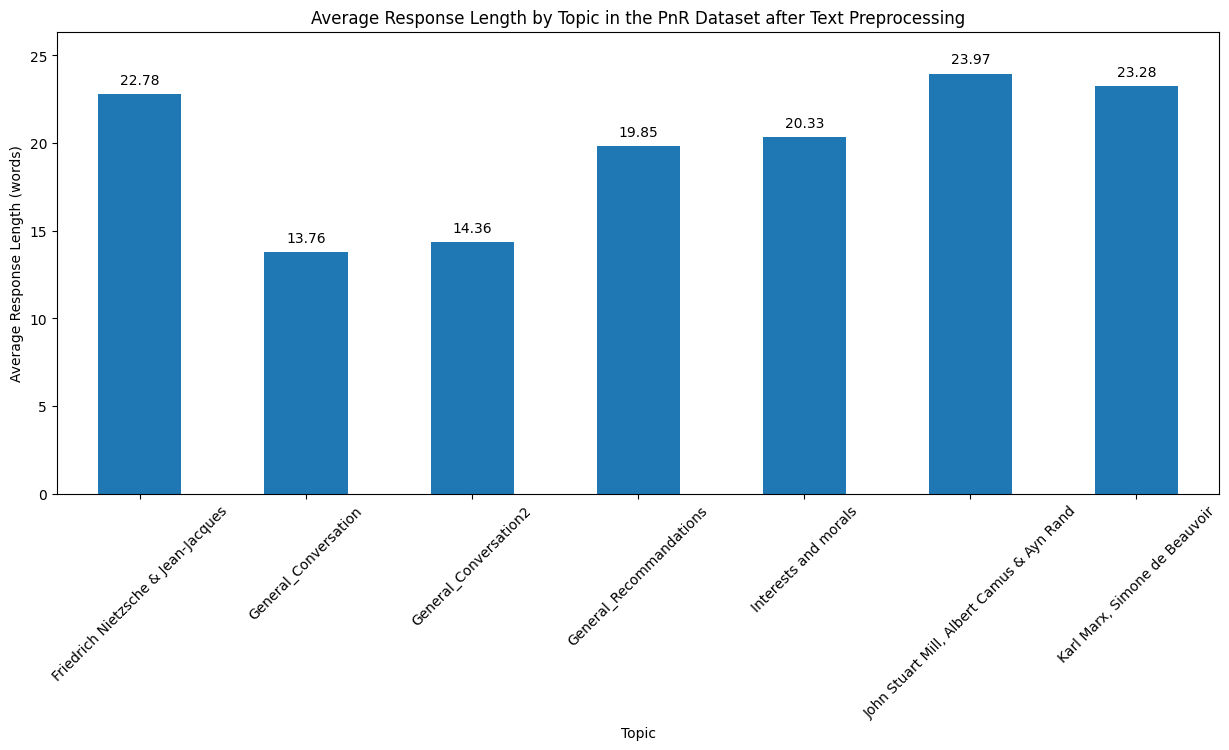

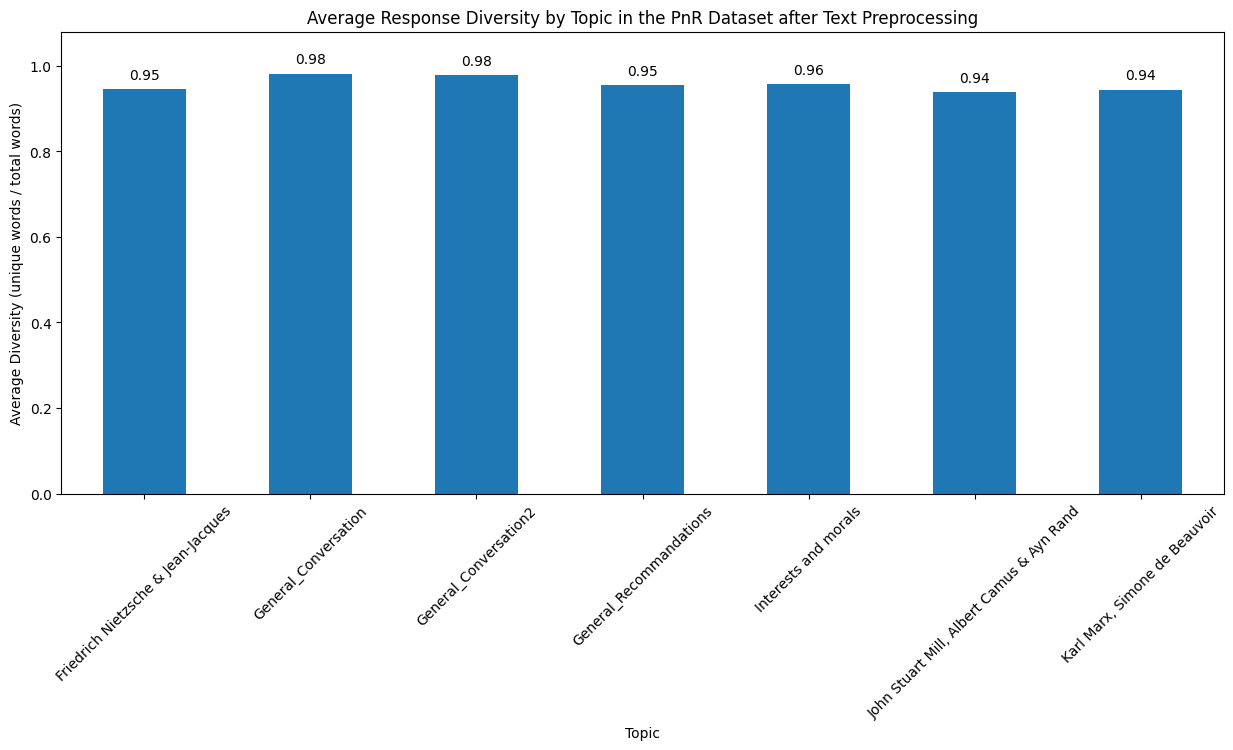

In [126]:
# Separate plots for each LLM except 'ChatGPT_DAIGT'
llms = combined_df['LLM'].unique()
for llm in llms:
    llm_df = combined_df[combined_df['LLM'] == llm].sort_values(by='topic')
    
    # Update labels based on LLM
    if llm == 'Essays':
        x_label = 'Prompt ID'
        title_length = 'Average Response Length by Prompt ID in the Essays Dataset after Text Preprocessing'
        title_diversity = 'Average Response Diversity by Prompt ID in the Essays Dataset after Text Preprocessing'
    elif llm == 'Dolly':
        x_label = 'Category'
        title_length = 'Average Response Length by Category in the Dolly Dataset after Text Preprocessing'
        title_diversity = 'Average Response Diversity by Category in the Dolly Dataset after Text Preprocessing'
    else:
        x_label = 'Topic'
        title_length = f'Average Response Length by Topic in the {llm} Dataset after Text Preprocessing'
        title_diversity = f'Average Response Diversity by Topic in the {llm} Dataset after Text Preprocessing'
    
    # Average response length by topic
    avg_response_length = llm_df.groupby('topic')['response_length'].mean()
    ax = avg_response_length.plot(kind='bar', figsize=(15, 6), title=title_length)
    plt.xlabel(x_label)
    plt.ylabel('Average Response Length (words)')
    
    # Adjust y-axis limit
    max_height = avg_response_length.max()
    plt.ylim(0, max_height * 1.1)  # Increase limit by 10%
    
    # Adjust rotation only for non-Essays datasets
    if llm == 'Essays':
        plt.xticks(rotation=0)
    else:
        plt.xticks(rotation=45)
    
    # Annotate bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.show()
    
    # Average diversity by topic
    avg_diversity = llm_df.groupby('topic')['diversity'].mean()
    ax = avg_diversity.plot(kind='bar', figsize=(15, 6), title=title_diversity)
    plt.xlabel(x_label)
    plt.ylabel('Average Diversity (unique words / total words)')
    
    # Adjust y-axis limit
    max_height = avg_diversity.max()
    plt.ylim(0, max_height * 1.1)  # Increase limit by 10%
    
    # Adjust rotation only for non-Essays datasets
    if llm == 'Essays':
        plt.xticks(rotation=0)
    else:
        plt.xticks(rotation=45)
    
    # Annotate bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.show()


### Clean Cosine Similarity 

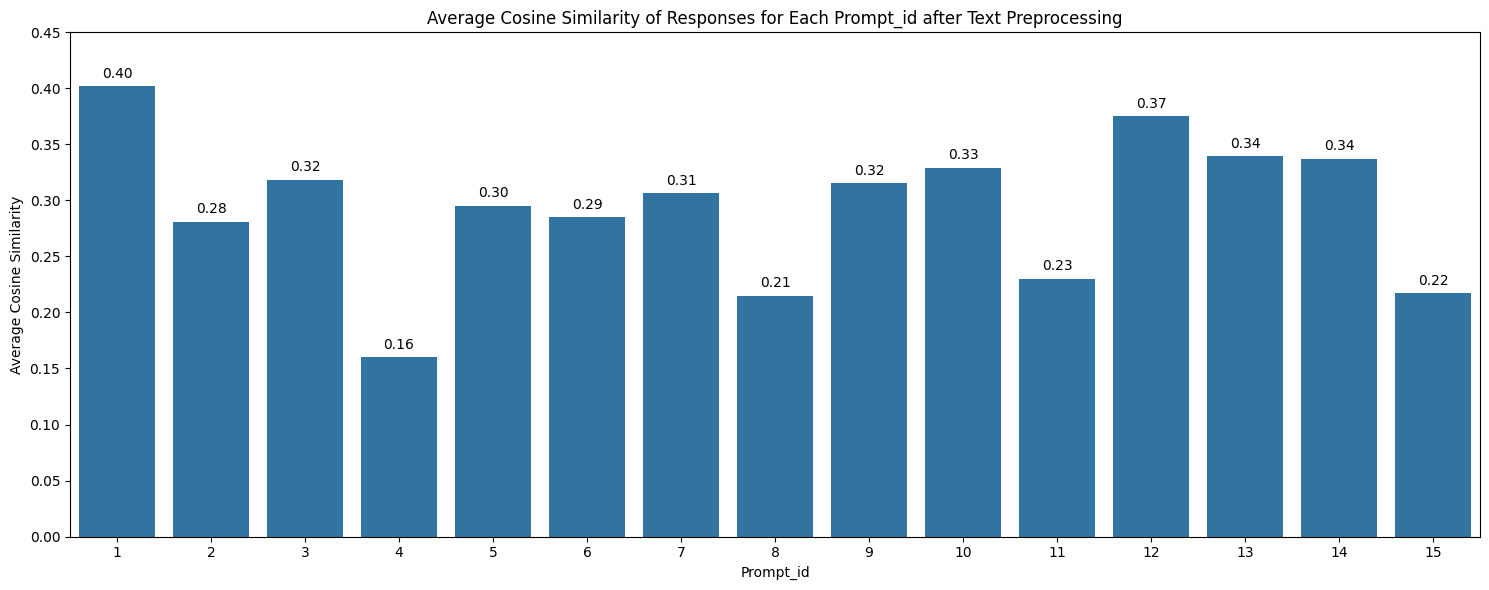

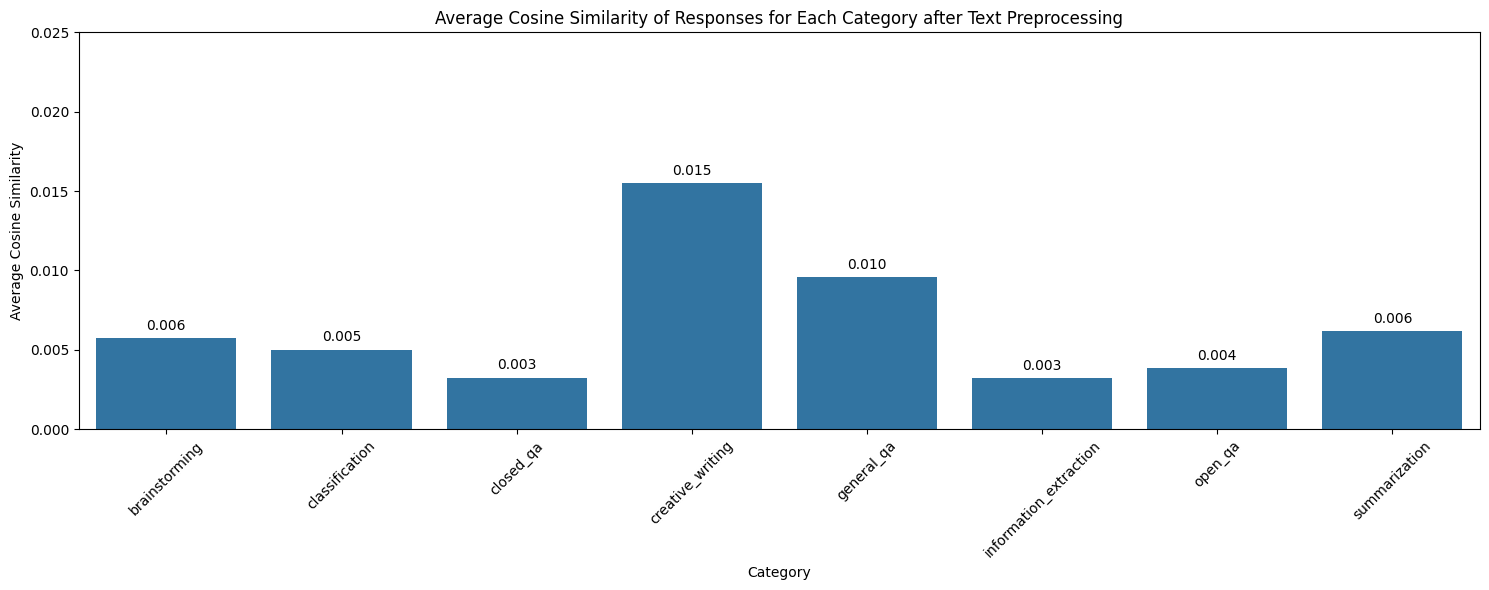

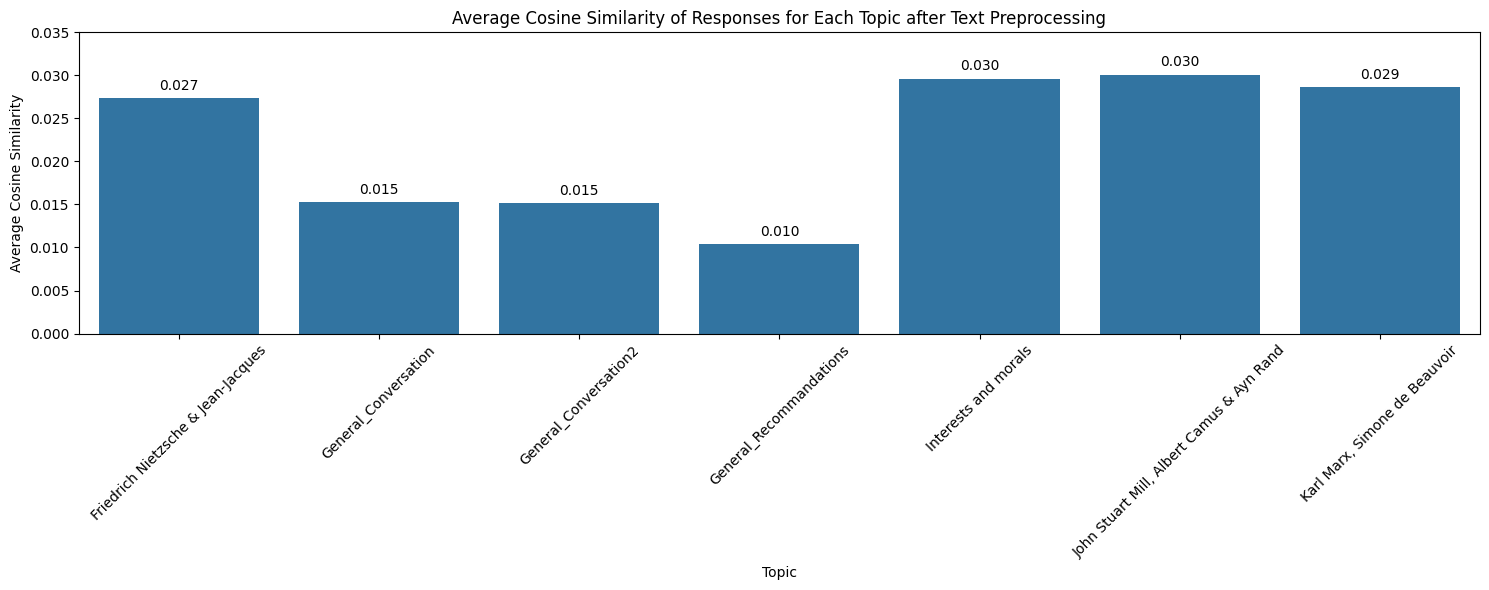

In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def process_dataset(df, id_column, text_column, y_max, precision):
    def calculate_cosine_similarity(df, text_column):
        vectorizer = TfidfVectorizer().fit_transform(df[text_column])
        vectors = vectorizer.toarray()
        cosine_sim_matrix = cosine_similarity(vectors)
        return cosine_sim_matrix

    prompt_groups = df.groupby(id_column)
    cosine_similarities = {}

    for prompt, group in prompt_groups:
        if len(group) > 1:
            cosine_sim_matrix = calculate_cosine_similarity(group, text_column)
            avg_cosine_sim = np.mean([cosine_sim_matrix[i, j] for i in range(len(cosine_sim_matrix)) for j in range(i+1, len(cosine_sim_matrix))])
            cosine_similarities[prompt] = avg_cosine_sim

    cosine_similarities_df = pd.DataFrame(list(cosine_similarities.items()), columns=[id_column, 'average_cosine_similarity'])

    def extract_features(df, text_column):
        df['sentiment'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
        return df

    df = extract_features(df, text_column)

    sentiment_std = prompt_groups['sentiment'].std().reset_index().rename(columns={'sentiment': 'sentiment_std'})

    consistency_df = cosine_similarities_df.merge(sentiment_std, on=id_column)
    
    if id_column == 'prompt_id':
        cosine_similarities_df[id_column] = pd.to_numeric(cosine_similarities_df[id_column], errors='coerce')

    cosine_similarities_df = cosine_similarities_df.sort_values(by=id_column)

    plt.figure(figsize=(15, 6))
    ax = sns.barplot(data=cosine_similarities_df, x=id_column, y='average_cosine_similarity', order=cosine_similarities_df[id_column])
    plt.title(f'Average Cosine Similarity of Responses for Each {id_column.capitalize()} after Text Preprocessing')
    plt.xlabel(id_column.capitalize())
    plt.ylabel('Average Cosine Similarity')
    plt.ylim(0, y_max)  # Dynamic y-axis limit
    plt.xticks(rotation=0 if id_column == 'prompt_id' else 45)  # Adjust rotation conditionally
    
    for p in ax.patches:
        ax.annotate(format(p.get_height(), f'.{precision}f'),  # Dynamic precision
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    plt.tight_layout()
    plt.show()

# Process each dataset with different precisions
process_dataset(EssaysClean, 'prompt_id', 'response', 0.45, 2)
process_dataset(DollyClean, 'category', 'response', 0.025, 3)
process_dataset(PnRClean, 'topic', 'response', 0.035, 3)